> # **Tarea 1: Análisis Exploratorio de Datos - Pokémon**
> #### **AST332-1 - 2025S2**
>
> Luciano Laroze, Cristián Núñez.
>
> *Universidad Técnica Federico Santa María, San Joaquín, Chile.*
>
> Nuestro repositorio de GitHub puede encontrarse en los siguientes usuarios
>
> C. Núñez [@ccanunez](https://github.com/ccanunez/Machine-Learning-2025-2.git, 'Reposotirio de C. Núñez')
>
> L. Laroze [@LuziVGC](https://github.com/LuziVGC, 'Reposotirio de L. Laroze')
>
> **Objetivo** : familiarizarse con el dataset, identificar patrones o anomalías y obtener una comprensión general de los datos para futuras aplicaciones de machine learning.

> # **Descripción y carga de datos**
>
> Se eligió el set de datos correspondiente al arreglo CSV de Pokémon.
>
> A continuación se cargan librerías para el uso (`numpy`) y manejo (`pandas`) de datos, así como la visualización (`matplotlib` y `seaborn`) de ellos.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [5]:
# Global style settings for better quality plots
plt.rcParams.update({
    "figure.dpi": 300,         # DPI for high-quality export
    "savefig.dpi": 300,        # DPI when saving figures
    "figure.figsize": (6, 4),  # A good balance: not too big, not too small
    "axes.labelsize": 12,      # Axis label font size
    "axes.titlesize": 14,      # Title font size
    "xtick.labelsize": 10,     # X-tick label size
    "ytick.labelsize": 10,     # Y-tick label size
    "lines.linewidth": 1.5,    # Slightly thicker lines
    "lines.markersize": 6,     # Marker size
    "legend.fontsize": 10,     # Legend font size
    "grid.alpha": 0.3,         # Softer grid
    "axes.grid": True,         # Grid on by default
})

In [8]:
# Lectura de datos en formato DataFrame
data = pd.read_csv('pokemon.csv')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [11]:
# Visualización de las primeras 5 líneas del DataFrame
data.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [19]:
# Descripción estadística del set de datos
df = data.copy()
describe = df.describe()
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


***The following cell was generated using openAI***

> **Reason**: L. Laroze is a Pokémon Master (*someone who really knows how to play*) but C. Núñez is not. Actually, C. Núñez does not know anything at all of Pokémon. In order to understand the data without learning how to play we ask openAI to give us a complete summary of the different types of classes/columns that is presented. We also looked up the other Series/DataFrames like Disney+ and this kind of approach was similar to asking openAI what is the rating of metascore, imdb_rating, imdb_score, etc. Keeping in mind L. Laroze is more than a veteran in this matter of fact, we can modify the response of openAI if necessary given the talent of the Master.

> **Prompt**: Given the following panda Data Frame of python output cell (*I gave the first 5 rows of the cell output and the data.describe() parameters*), tell me the range and description of the columns and rows. What is good and bad? How do I classify the scores? What's the min value and max value of each column?

---

Perfect — now we can rewrite the analysis using the **actual `data.describe()` output** you just provided.

---

# 📊 Pokémon DataFrame Summary

Your dataset has **801 Pokémon entries (rows)** and at least **34 numeric columns** (stats, effectiveness multipliers, height, weight, etc.). Below is a breakdown of ranges, classification, and what “good” or “bad” means for each type of column.

---

## 🔹 **Type Effectiveness (`against_*` columns)**

* **Range:** `0.0 → 4.0`
* **Meaning:** Multiplier applied to incoming damage of that type.

  * `0` → **Immune** (best case).
  * `0.25–0.5` → **Resistant** (takes reduced damage).
  * `1` → **Neutral** (normal damage).
  * `2–4` → **Weakness** (takes more damage, bad).
* **Min/Max (from your data):**

  * Min values: 0.0 (e.g. Normal immune to Ghost).
  * Max values: 4.0 (quadruple weakness, e.g. Grass/Flying vs Ice).

👉 **Good**: lower values (<1).
👉 **Bad**: higher values (>1).

---

## 🔹 **Base Stats**

(Values used in Pokémon battles; higher = stronger)

* **`hp` (Hit Points)**

  * Range: `1 → 255`
  * Good: ≥ 100 = bulky, survivable.
  * Bad: ≤ 50 = frail.

> * **`attack` (Attack)**
>
>  * Range: `5 → 185`
>  * Good: ≥ 110 = strong physical attacker.
>  * Bad: ≤ 50 = weak.

> * **`defense` (Defense)**
>
>  * Range: `5 → 230`
>  * Good: ≥ 110 = physical wall.
>  * Bad: ≤ 50 = weak.

* **`sp_attack` (Special Attack)**

  * Range: `10 → 194`
  * Good: ≥ 110 = strong special attacker.
  * Bad: ≤ 50 = weak.

* **`sp_defense` (Special Defense)**

  * Range: `20 → 230`
  * Good: ≥ 110 = special wall.
  * Bad: ≤ 50 = fragile.

* **`speed`**

  * Range: `5 → 180`
  * Good: ≥ 100 = very fast.
  * Bad: ≤ 50 = very slow.

---

## 🔹 **Physical Traits**

* **`height_m`**

  * Range: `0.1 → 14.5 m`
  * Informational only; matters for flavor or some moves (e.g. Low Kick).

* **`weight_kg`**

  * Range: `0.1 → 999.9 kg`
  * Heavier Pokémon benefit from moves like Heavy Slam but are vulnerable to Low Kick.

---

## 🔹 **Demographics**

* **`percentage_male`**

  * Range: `0 → 100`
  * 0 = all female/genderless, 100 = all male.
  * Neutral — not good/bad, just species trait.

* **`generation`**

  * Range: `1 → 7`
  * Indicates introduction era. Not about strength.

* **`pokedex_number`**

  * Range: `1 → 801`
  * Pure identifier.

---

## 🔹 **Legendary Status**

* **`is_legendary`**

  * Values: `0` (non-legendary), `1` (legendary).
  * Legendary Pokémon generally have higher stats (base stat totals often >600).

---

# ✅ **Summary Table**

| Column Group      | Range (min–max) | Good / Bad Meaning                      |
| ----------------- | --------------- | --------------------------------------- |
| `against_*`       | 0.0 → 4.0       | <1 = good (resist), >1 = bad (weakness) |
| `hp`              | 1 → 255         | High = bulky, low = frail               |
| `sp_attack`       | 10 → 194        | High = strong attacker                  |
| `sp_defense`      | 20 → 230        | High = durable vs specials              |
| `speed`           | 5 → 180         | High = moves first                      |
| `height_m`        | 0.1 → 14.5      | Informational                           |
| `weight_kg`       | 0.1 → 999.9     | Contextual                              |
| `percentage_male` | 0 → 100         | Neutral descriptor                      |
| `generation`      | 1 → 7           | Contextual                              |
| `pokedex_number`  | 1 → 801         | Identifier only                         |
| `is_legendary`    | 0 / 1           | 1 = Legendary Pokémon                   |

---

***This is the end of the cell generated using openAI***
>
> Some descriptions of the columns where not completely described by openAI, so we added them manually e.g., attack and defense stats.

> # **Limpieza de datos**
>
> Identificación de valores no definidos o faltantes
> - Aquellos valores tipo NaN indican la etiqueta *Not A Number* por lo que es un valor que se desconoce o no está definido.
> - Por medio de la operación **data.info()** es posible obtener información relevante y necesaria para identificar valores tipo NaN:
> - Cabe mencionar que no todos los pokemones poseen un tipo 2, por lo que los valores NaN en esta columna no son un problema.

In [15]:
# Descripción numérica del set de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

|index |  parameter       |           number non-null |    type    |
|----|------------------|-------------------------------|------------|
| 27 |  height_m        |           781 non-null        |    float64 |
| 31 |  percentage_male |    703 non-null               |    float64 |
| 37 |  type2           |              417 non-null     |    object  |
| 38 |  weight_kg       |          781 non-null         |    float64 |

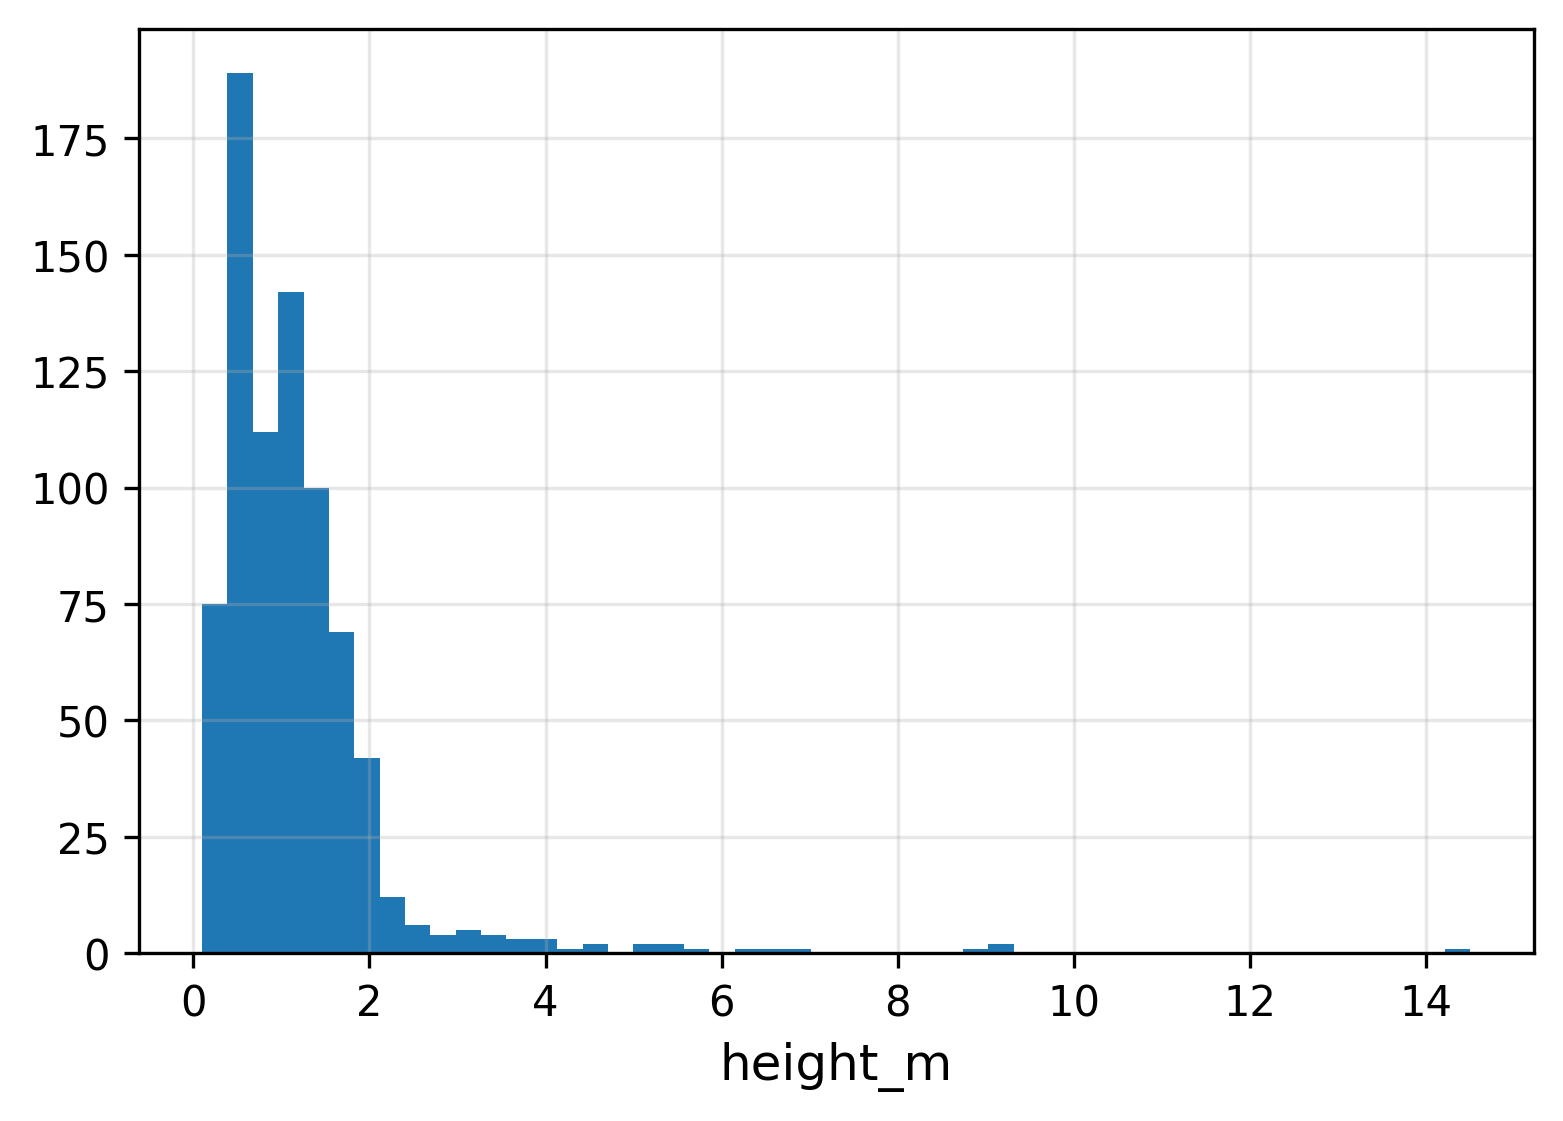

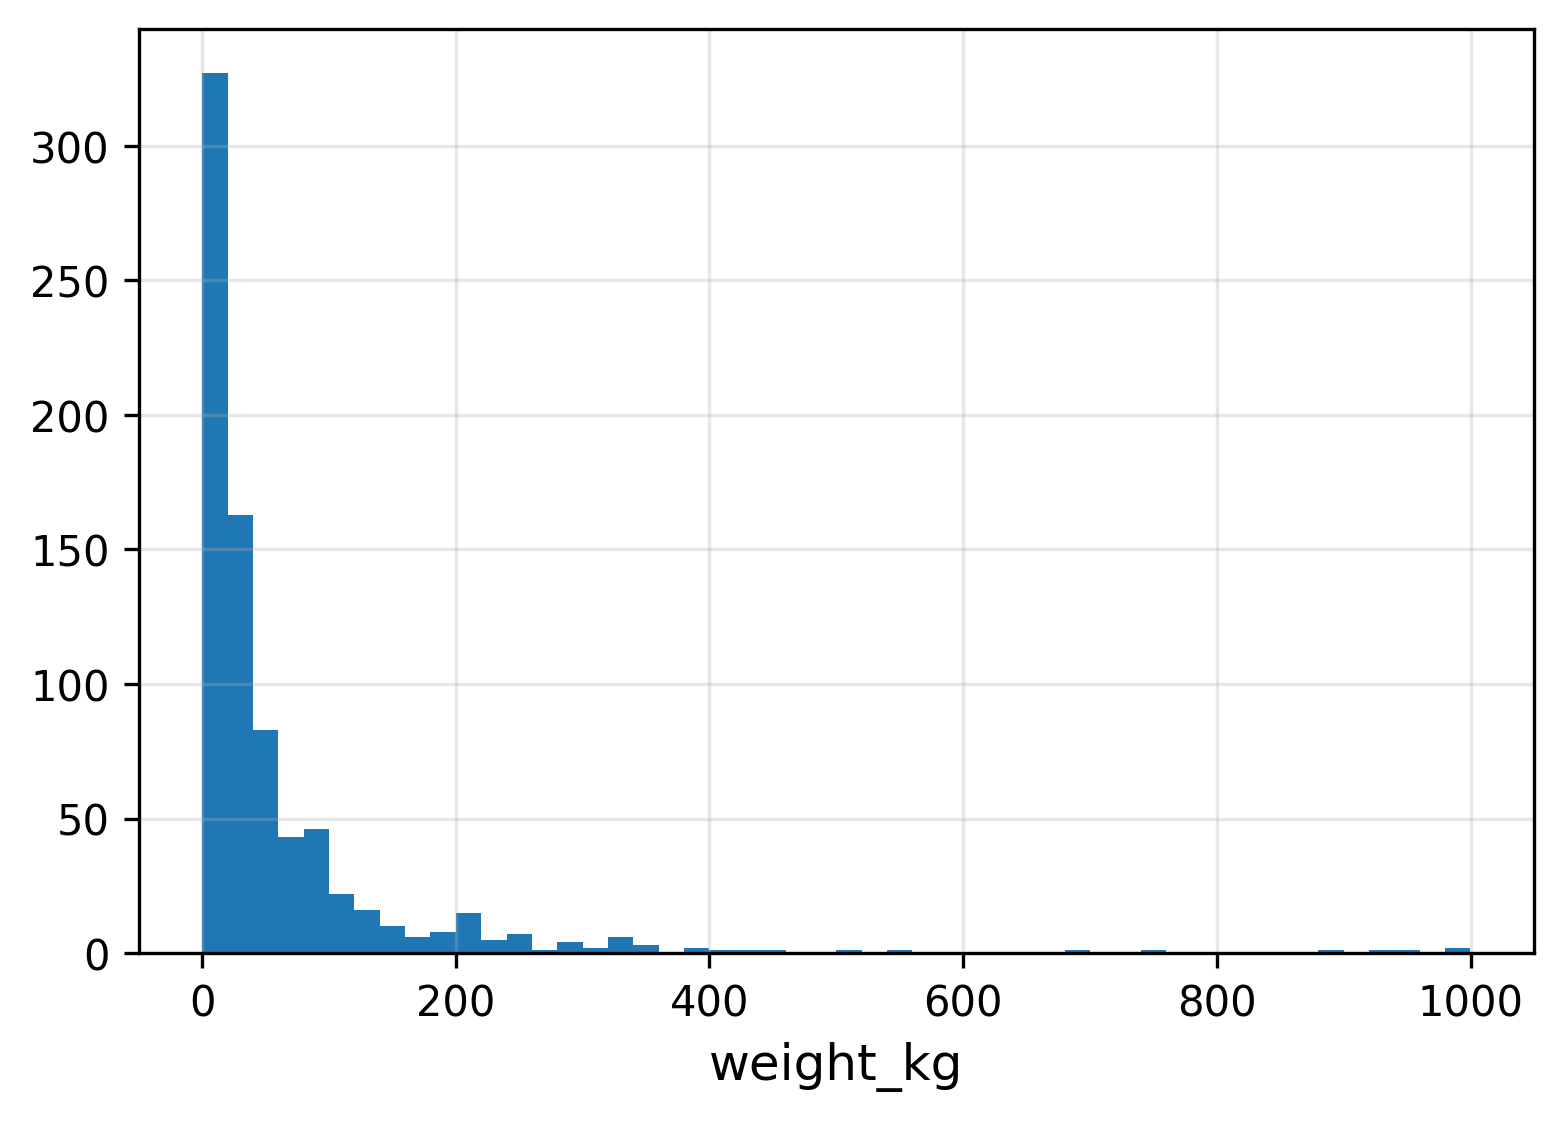

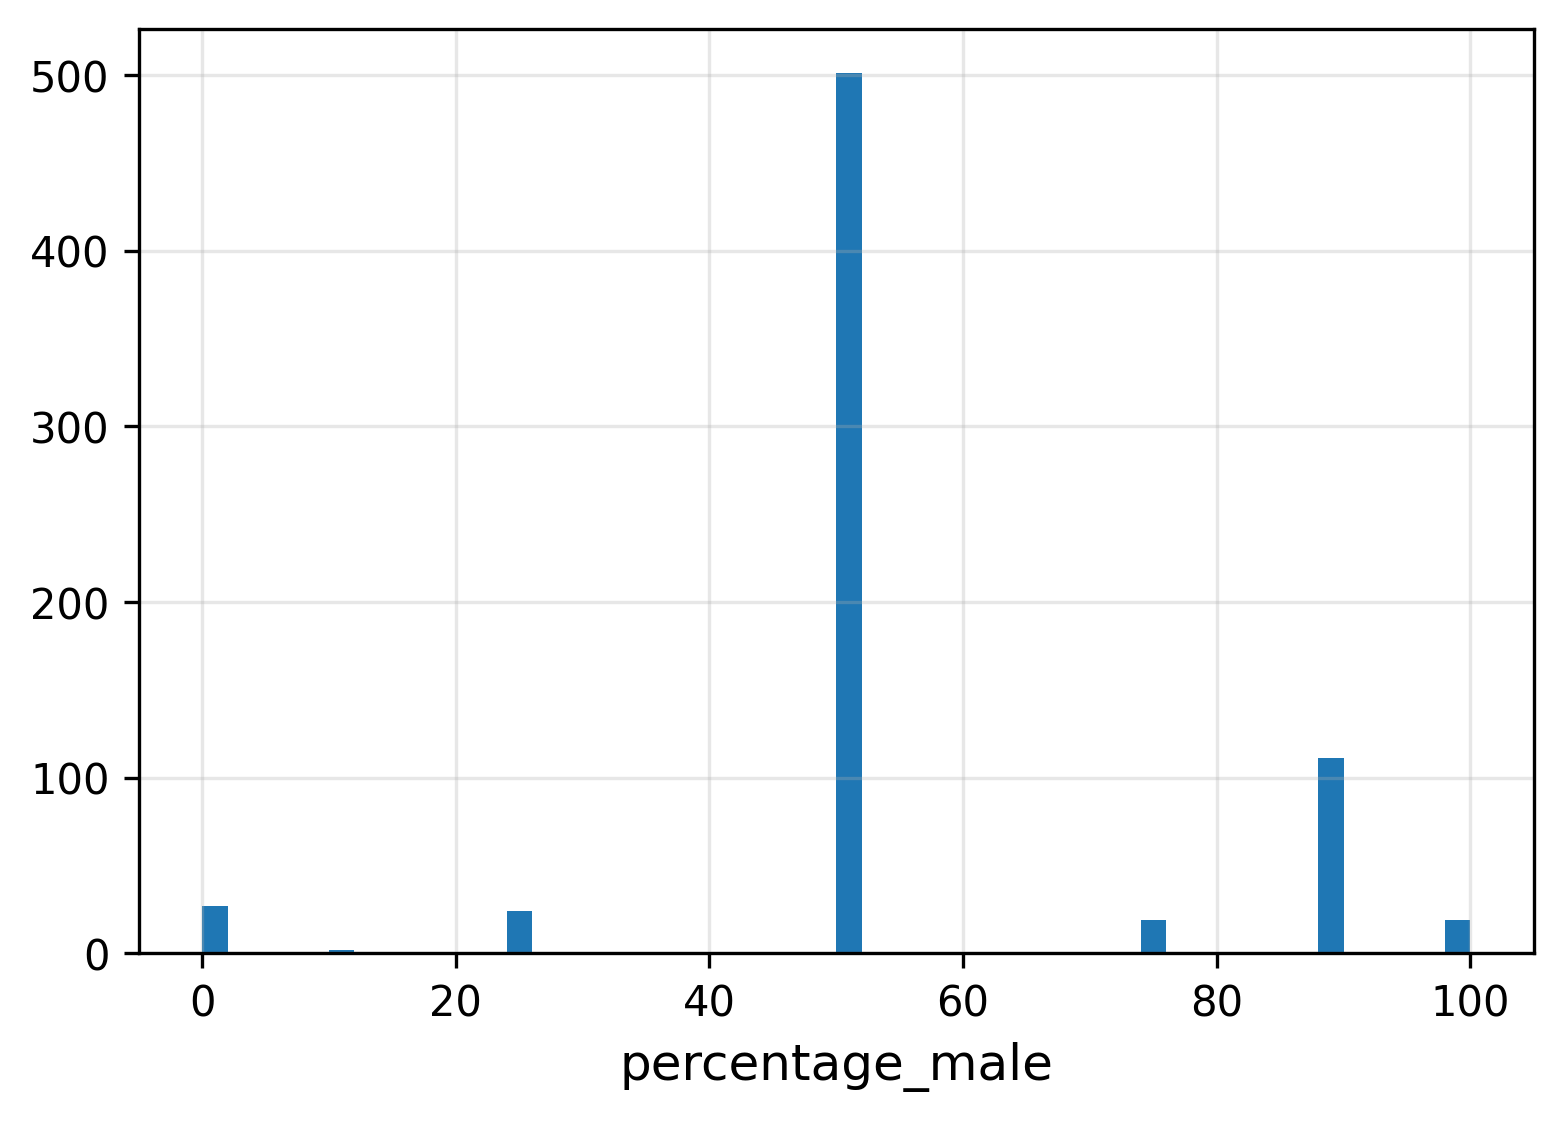

In [18]:
plt.hist(data['height_m'], bins=50)
plt.xlabel('height_m')
plt.show()
plt.hist(data['weight_kg'], bins=50)
plt.xlabel('weight_kg')
plt.show()
plt.hist(data['percentage_male'], bins=50)
plt.xlabel('percentage_male')
plt.show()

> ## **Explicación de valores NaN:**
>
> * height_m:
>   * 20 valores NaN. 
>   * Debido a la presencia de outliers, los valores NaN serán reemplazados por la mediana de los datos
>
> * weight_kg:
>   * 20 valores NaN. 
>   * Según la misma lógica, estos valores también serán reemplazados por la mediana de los datos
>
> * percentage_male: 
>   * 98 valores NaN.
>   * No se reemplazaran porque no todos los pokémon tienen género
>
> * type2:
>   * 384 valores NaN. 
>   * No es necesario reemplazarlos porque no todos los pokémon tienen segundo tipo
>
> En la siguiente línea reemplazamos los valores NaN mencionados

In [121]:
data['height_m'].fillna(data['height_m'].median(), inplace=True)
data['weight_kg'].fillna(data['weight_kg'].median(), inplace=True)

> ## **Filas o columnas duplicadas**
>
> Afortunadamente observamos que no contamos con filas ni columnas duplicadas

In [24]:
data[data.duplicated(keep=False)]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary


> # **Análisis estadístico**
>
> Para la visualización de datos según un Análisis Exploratorio de Datos (EDA) se utilizará la librería `seaborn` junto al apoyo de `matplotlib`. Según estas librerías contamos con el método `catplot` que permite visualizar datos categóricos y `displot` que permite visualizar datos numéricos. Además, se utilizará el método `plot` de `pandas` y el método `hist` de `matplotlib` para ayudar a comprender la relevancia y diferencia entre sets de datos. 
>
> * Para algunos elementos nos daremos cuenta que es posible analizar y visualizar de manera similar o análoga el mismos set de datos empleando histograma u otro medio de visualización gráfica.
> * El criterio de visulización se basa en la cantidad de datos que se desea visualizar y la forma en que se desea comprender los datos.

> ## Análisis de variables categóricas
> En esta sección se analizarán mediante distintos gráficos las variables categóricas del set de datos.

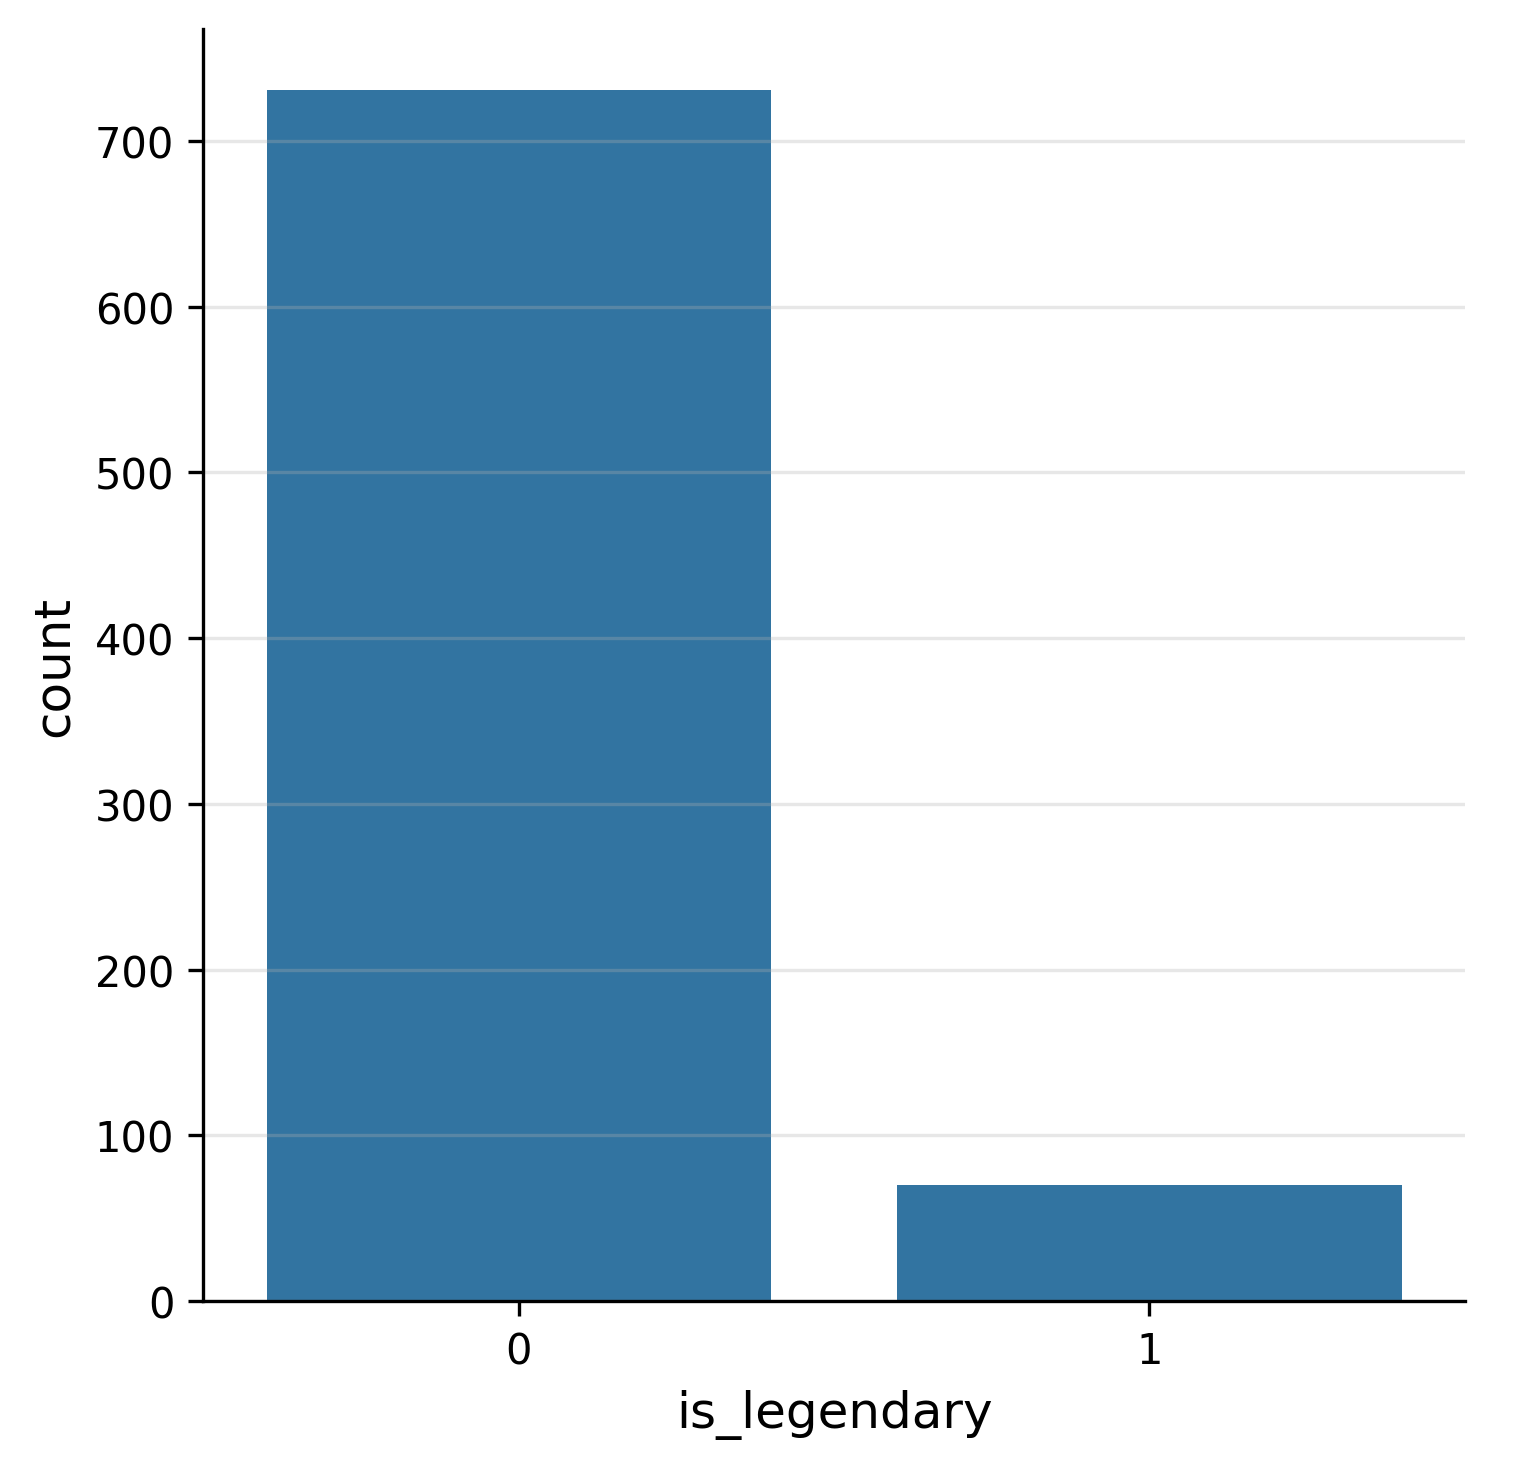

In [27]:
sns.catplot(data=data, x='is_legendary', kind='count')

> * Observamos que la mayoría de los pokemones no son legendarios, por lo que se tiene una distribución desbalanceada de datos.
> * Es posible representar estos datos como un histograma de dos bins o bien dentro de un gráfico de torta.

In [30]:
# Data for 1
legendary = list(filter(lambda x : x // 1 == 1, list(data['is_legendary'])))
print(f'el número de pokémon legendarios es {len(legendary)}')

# Data for 0
legendario = data['is_legendary']
print(f'el número de pokémon normales es {len(list(legendario))-len(legendary)}')

el número de pokémon legendarios es 70
el número de pokémon normales es 731


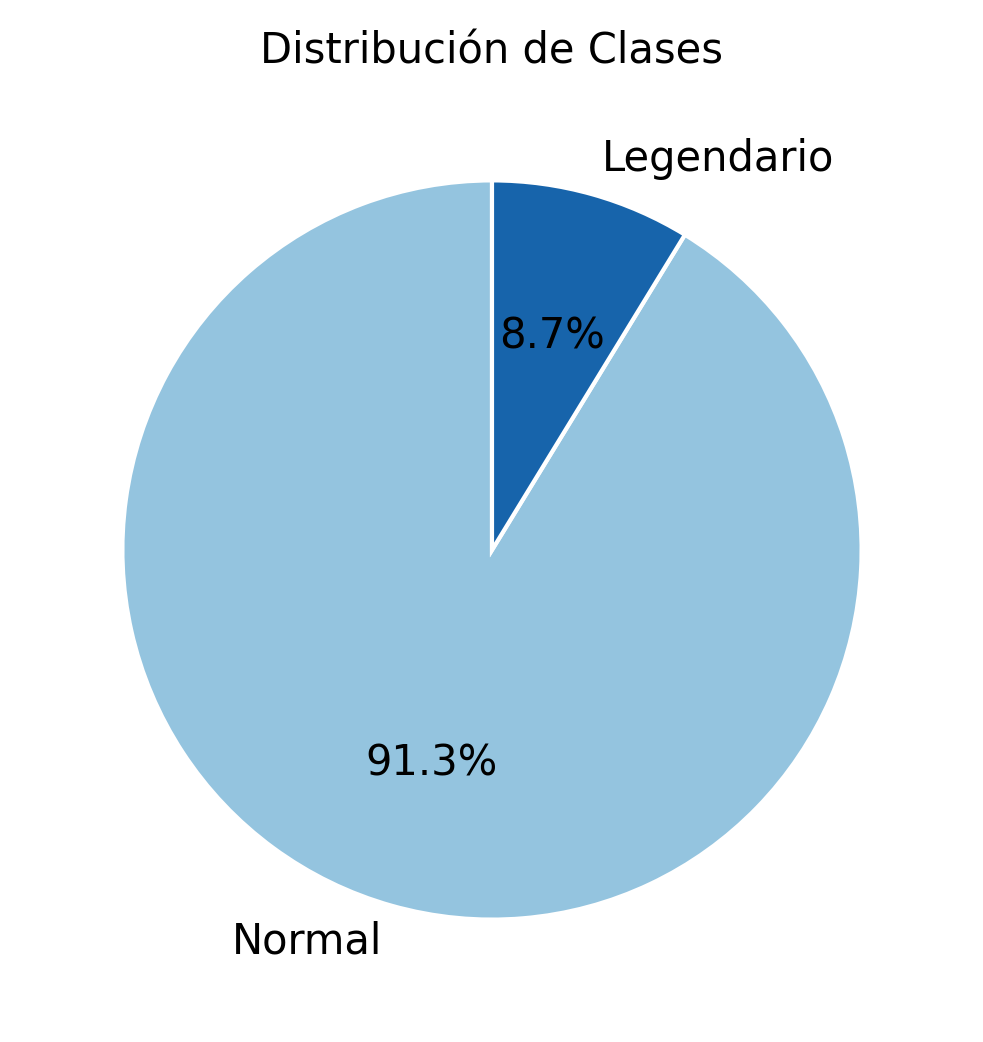

In [33]:
# Data: 70 ones, 731 zeros -> two categories
Leg = len(legendary)
notLeg = len(list(legendario))-len(legendary)
x = [notLeg, Leg]
labels = ["Normal", "Legendario"]
colors = plt.get_cmap("Blues")(np.linspace(0.4, 0.8, len(x)))

# Plot
fig, ax = plt.subplots()
ax.pie(
    x,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",             # show percentages
    startangle=90,                 # start from the top
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

ax.set_title("Distribución de Clases", fontsize=10)
plt.show()


> * Con esto, podemos ver y discriminar de manera porcentual que la mayoría de los pokémon son normales y no legendarios. 
>
> Veamos como se distribuyen estos pokémon según su tipo principal.

> Podemos observar que la mayoría de los Pokémon legendarios pertenecen al tipo “Psíquico”. A pesar de esta tendencia en los datos, no es posible generar un modelo de aprendizaje automático que prediga si un Pokémon es legendario o no, debido a que la mayoría de los Pokémon no lo son. Sin embargo, un modelo de aprendizaje automático podría determinar que un Pokémon de tipo Lucha o Veneno no será legendario.
>
> En el gráfico hay otra caracterísitca que se puede observar, y es la poca cantidad de pokémon de tipo flying comparado al resto de tipos. Recordemos que los pokemon tienen el "type1" pero también pueden tener type2, veamos si en este gráfico podemos obtener información relevante.

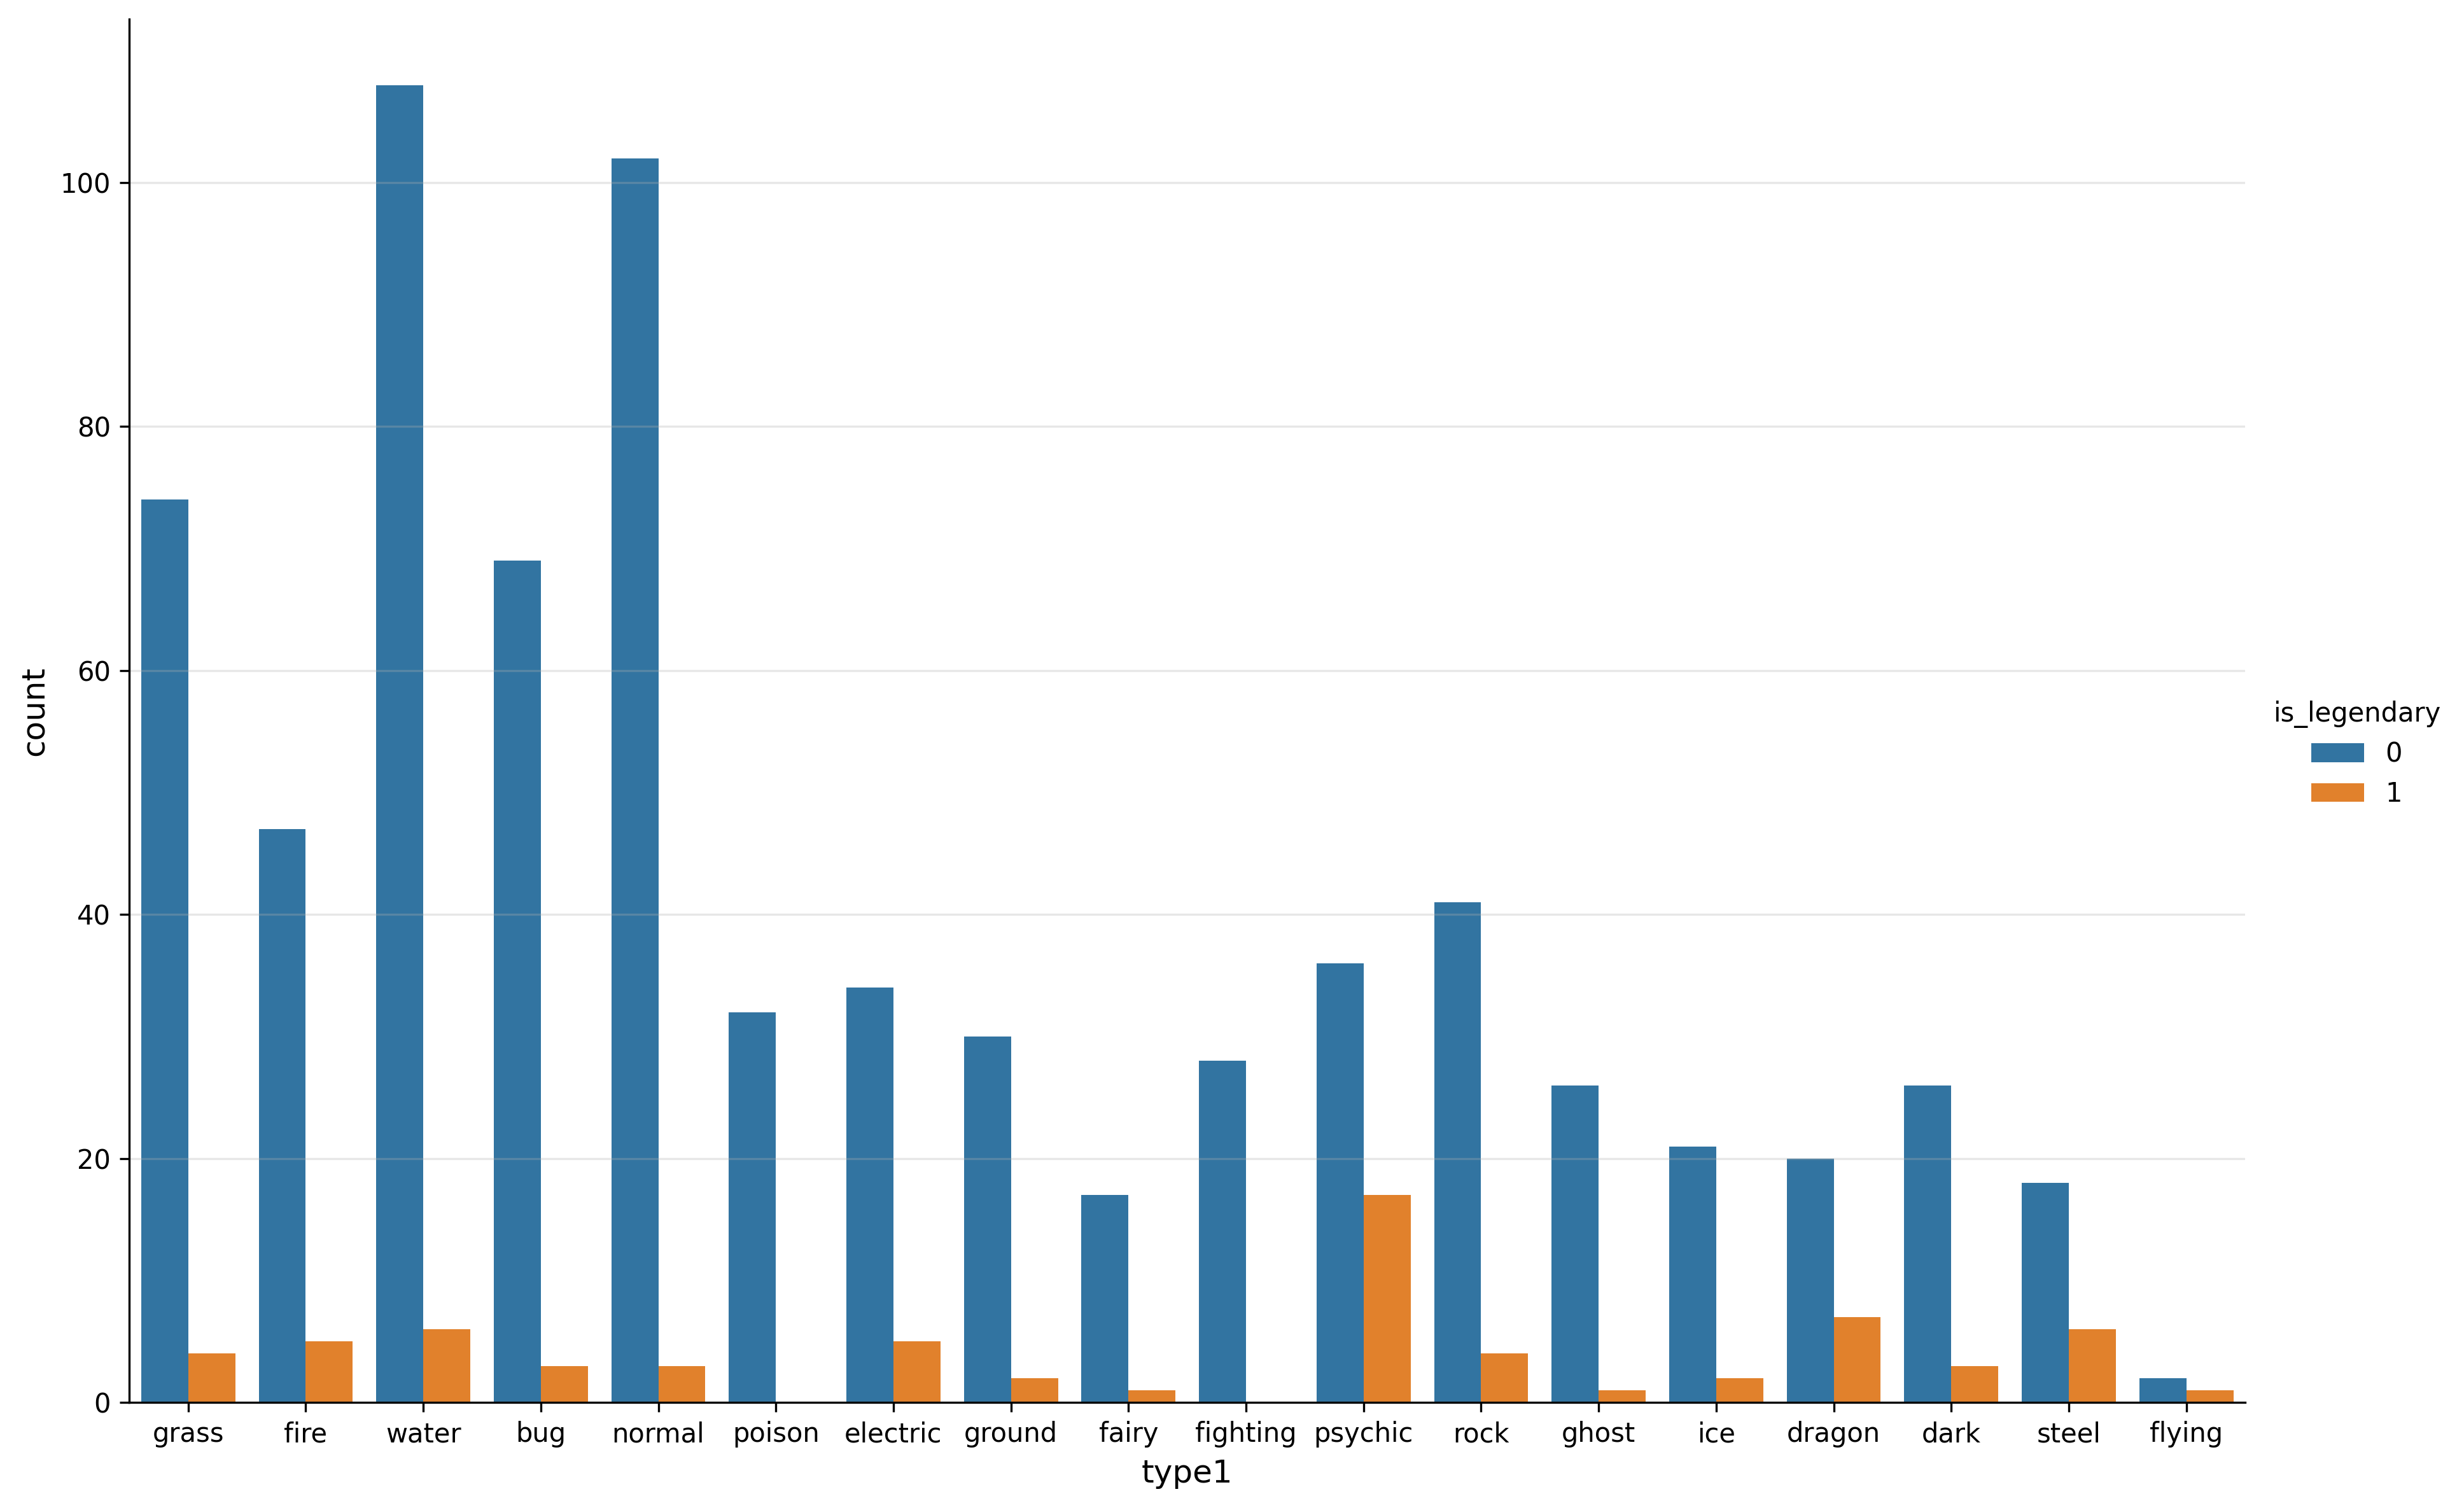

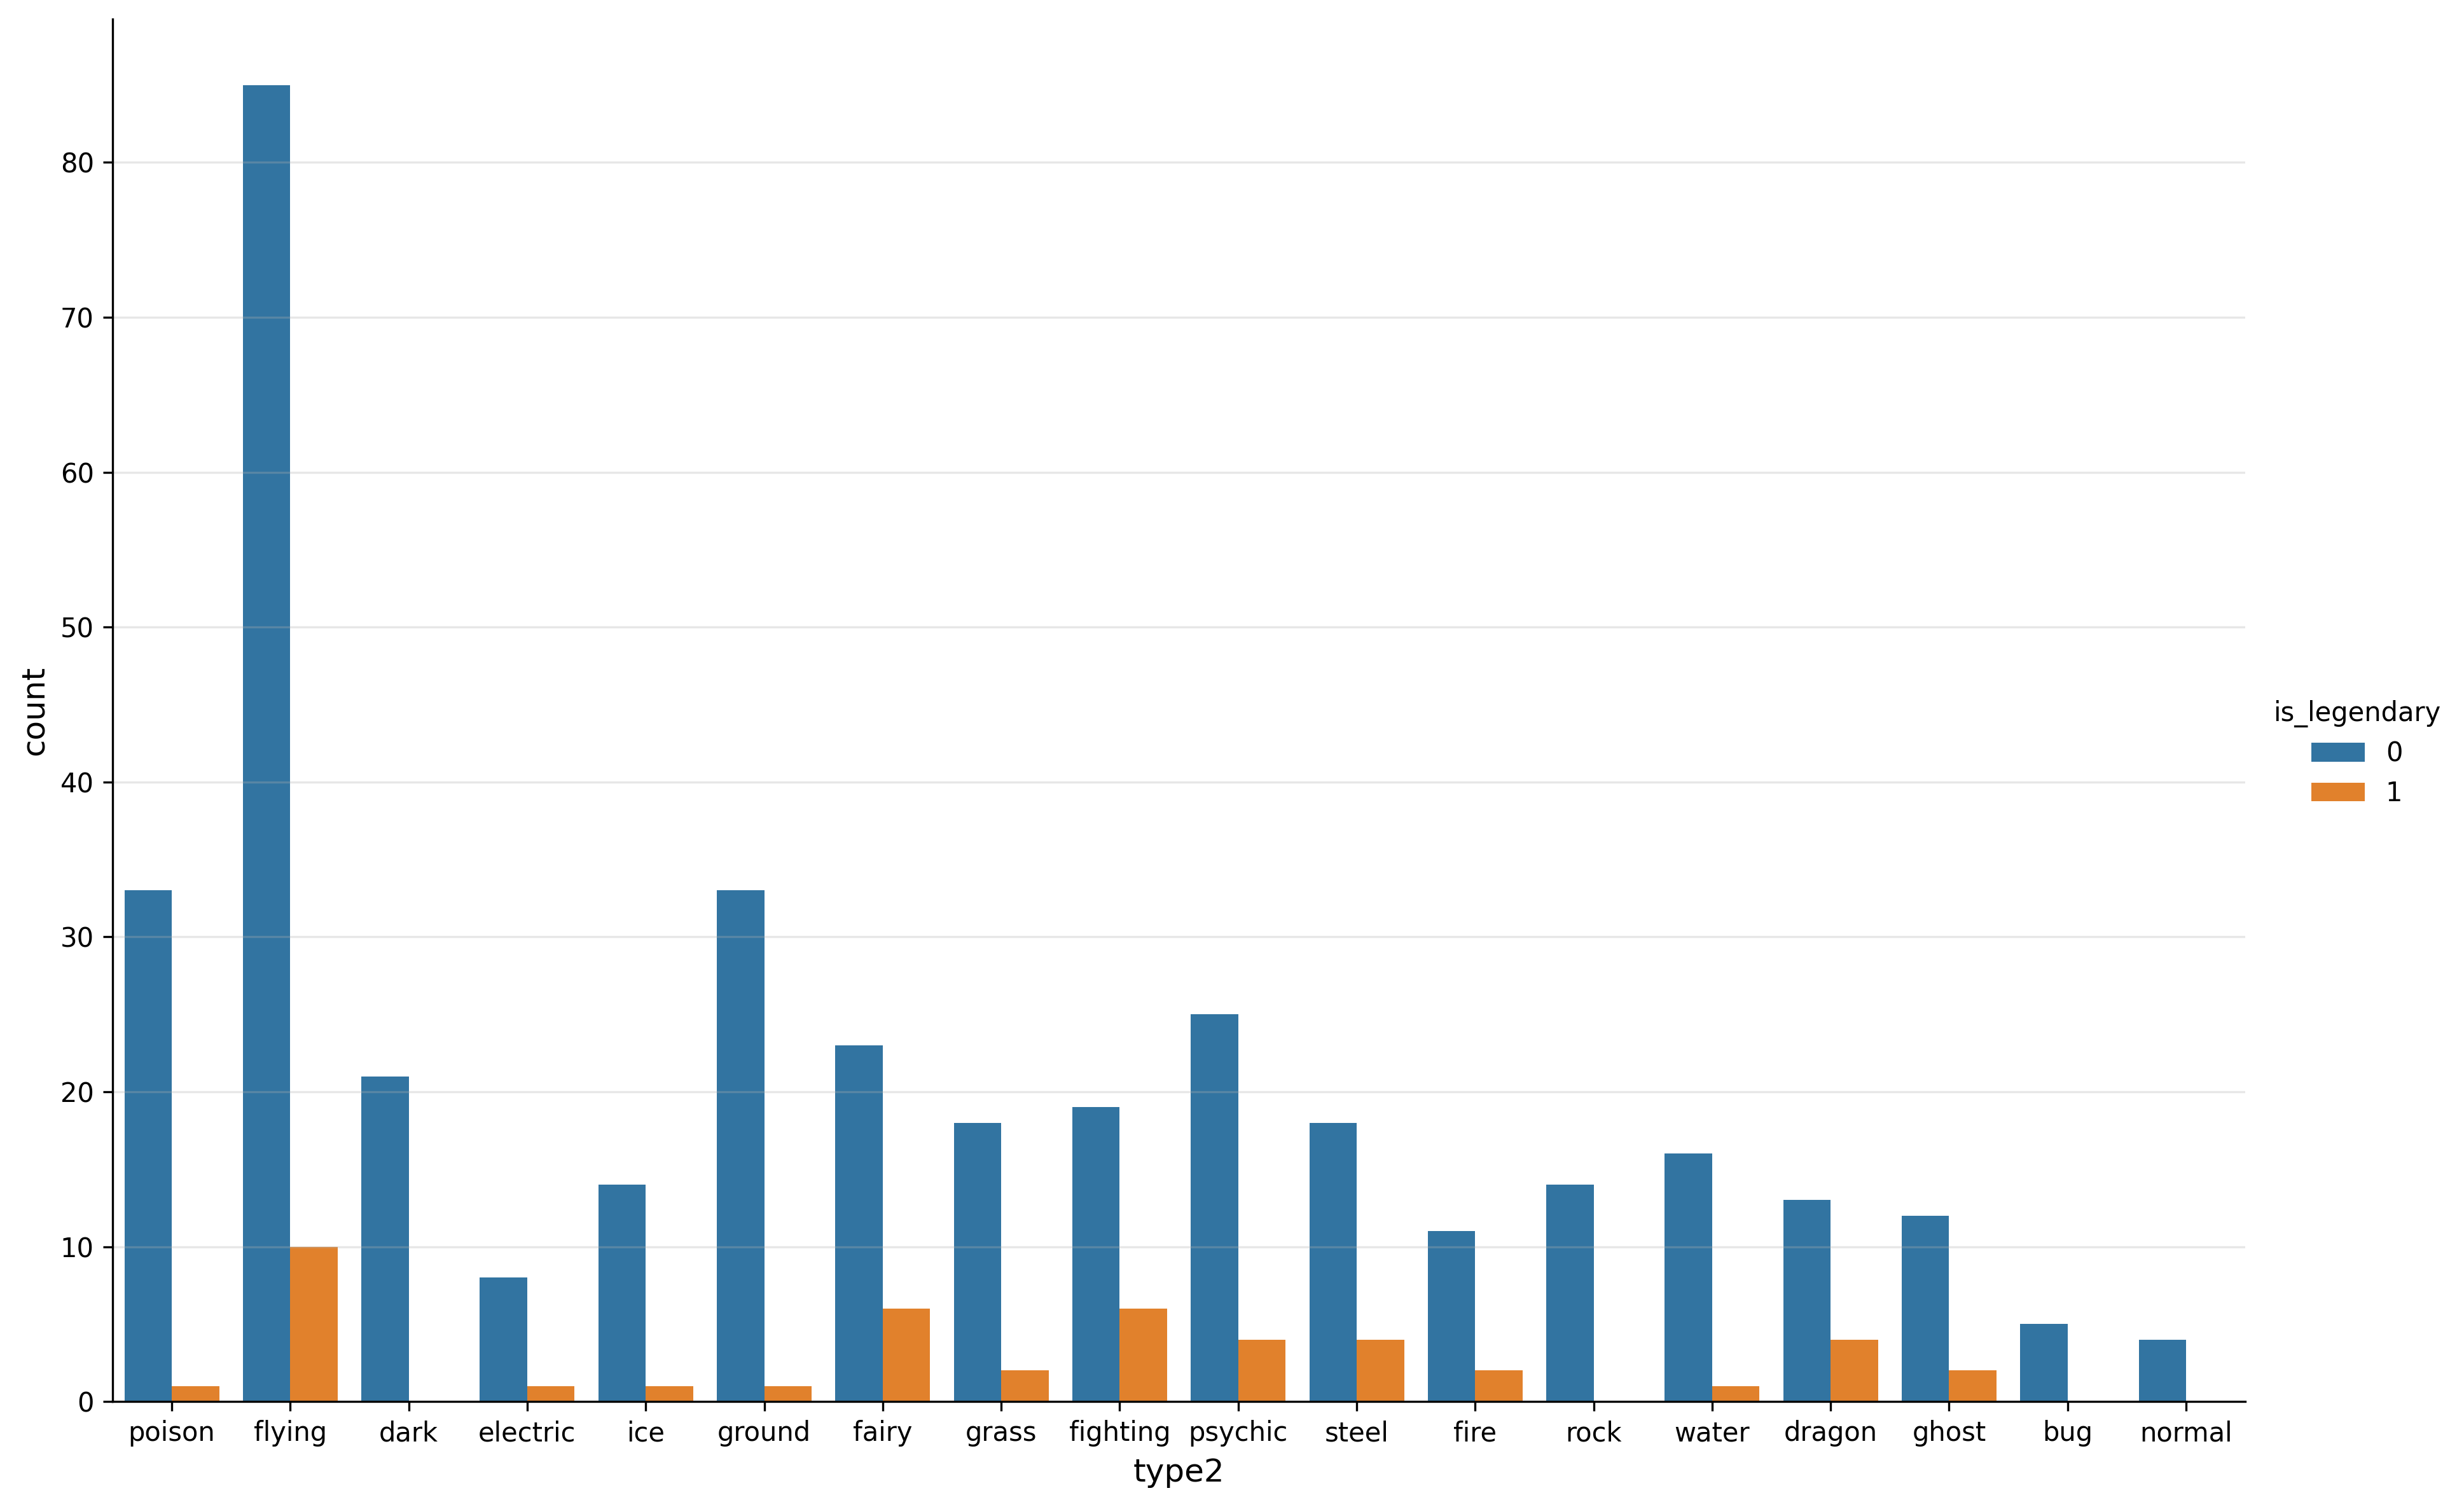

In [115]:
sns.catplot(data=data, x='type1', kind='count', height=8, aspect=1.5, hue = "is_legendary")
plt.show()

sns.catplot(data=data, x='type2', kind='count', height=8, aspect=1.5, hue = "is_legendary")
plt.show()

> * Con este último plot se encontró que la mayoría de pokémon que presentan el tipo volador lo hacen en su caracterísitca de type2 en vez de type1. 
> * Esto se puede deber a un simple capricho de los desarrolladores del juego que condiciona a la hora de estudiar los tipos más recurrentes en los pokémon. 
> * Para ver cual es el tipo más usual, debemos hacer una suma directa de ambas características referentes a los tipos.

['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric', 'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice', 'dragon', 'dark', 'steel', 'flying']
[98, 65, 131, 77, 109, 66, 48, 66, 47, 53, 82, 59, 41, 38, 44, 50, 46, 98]


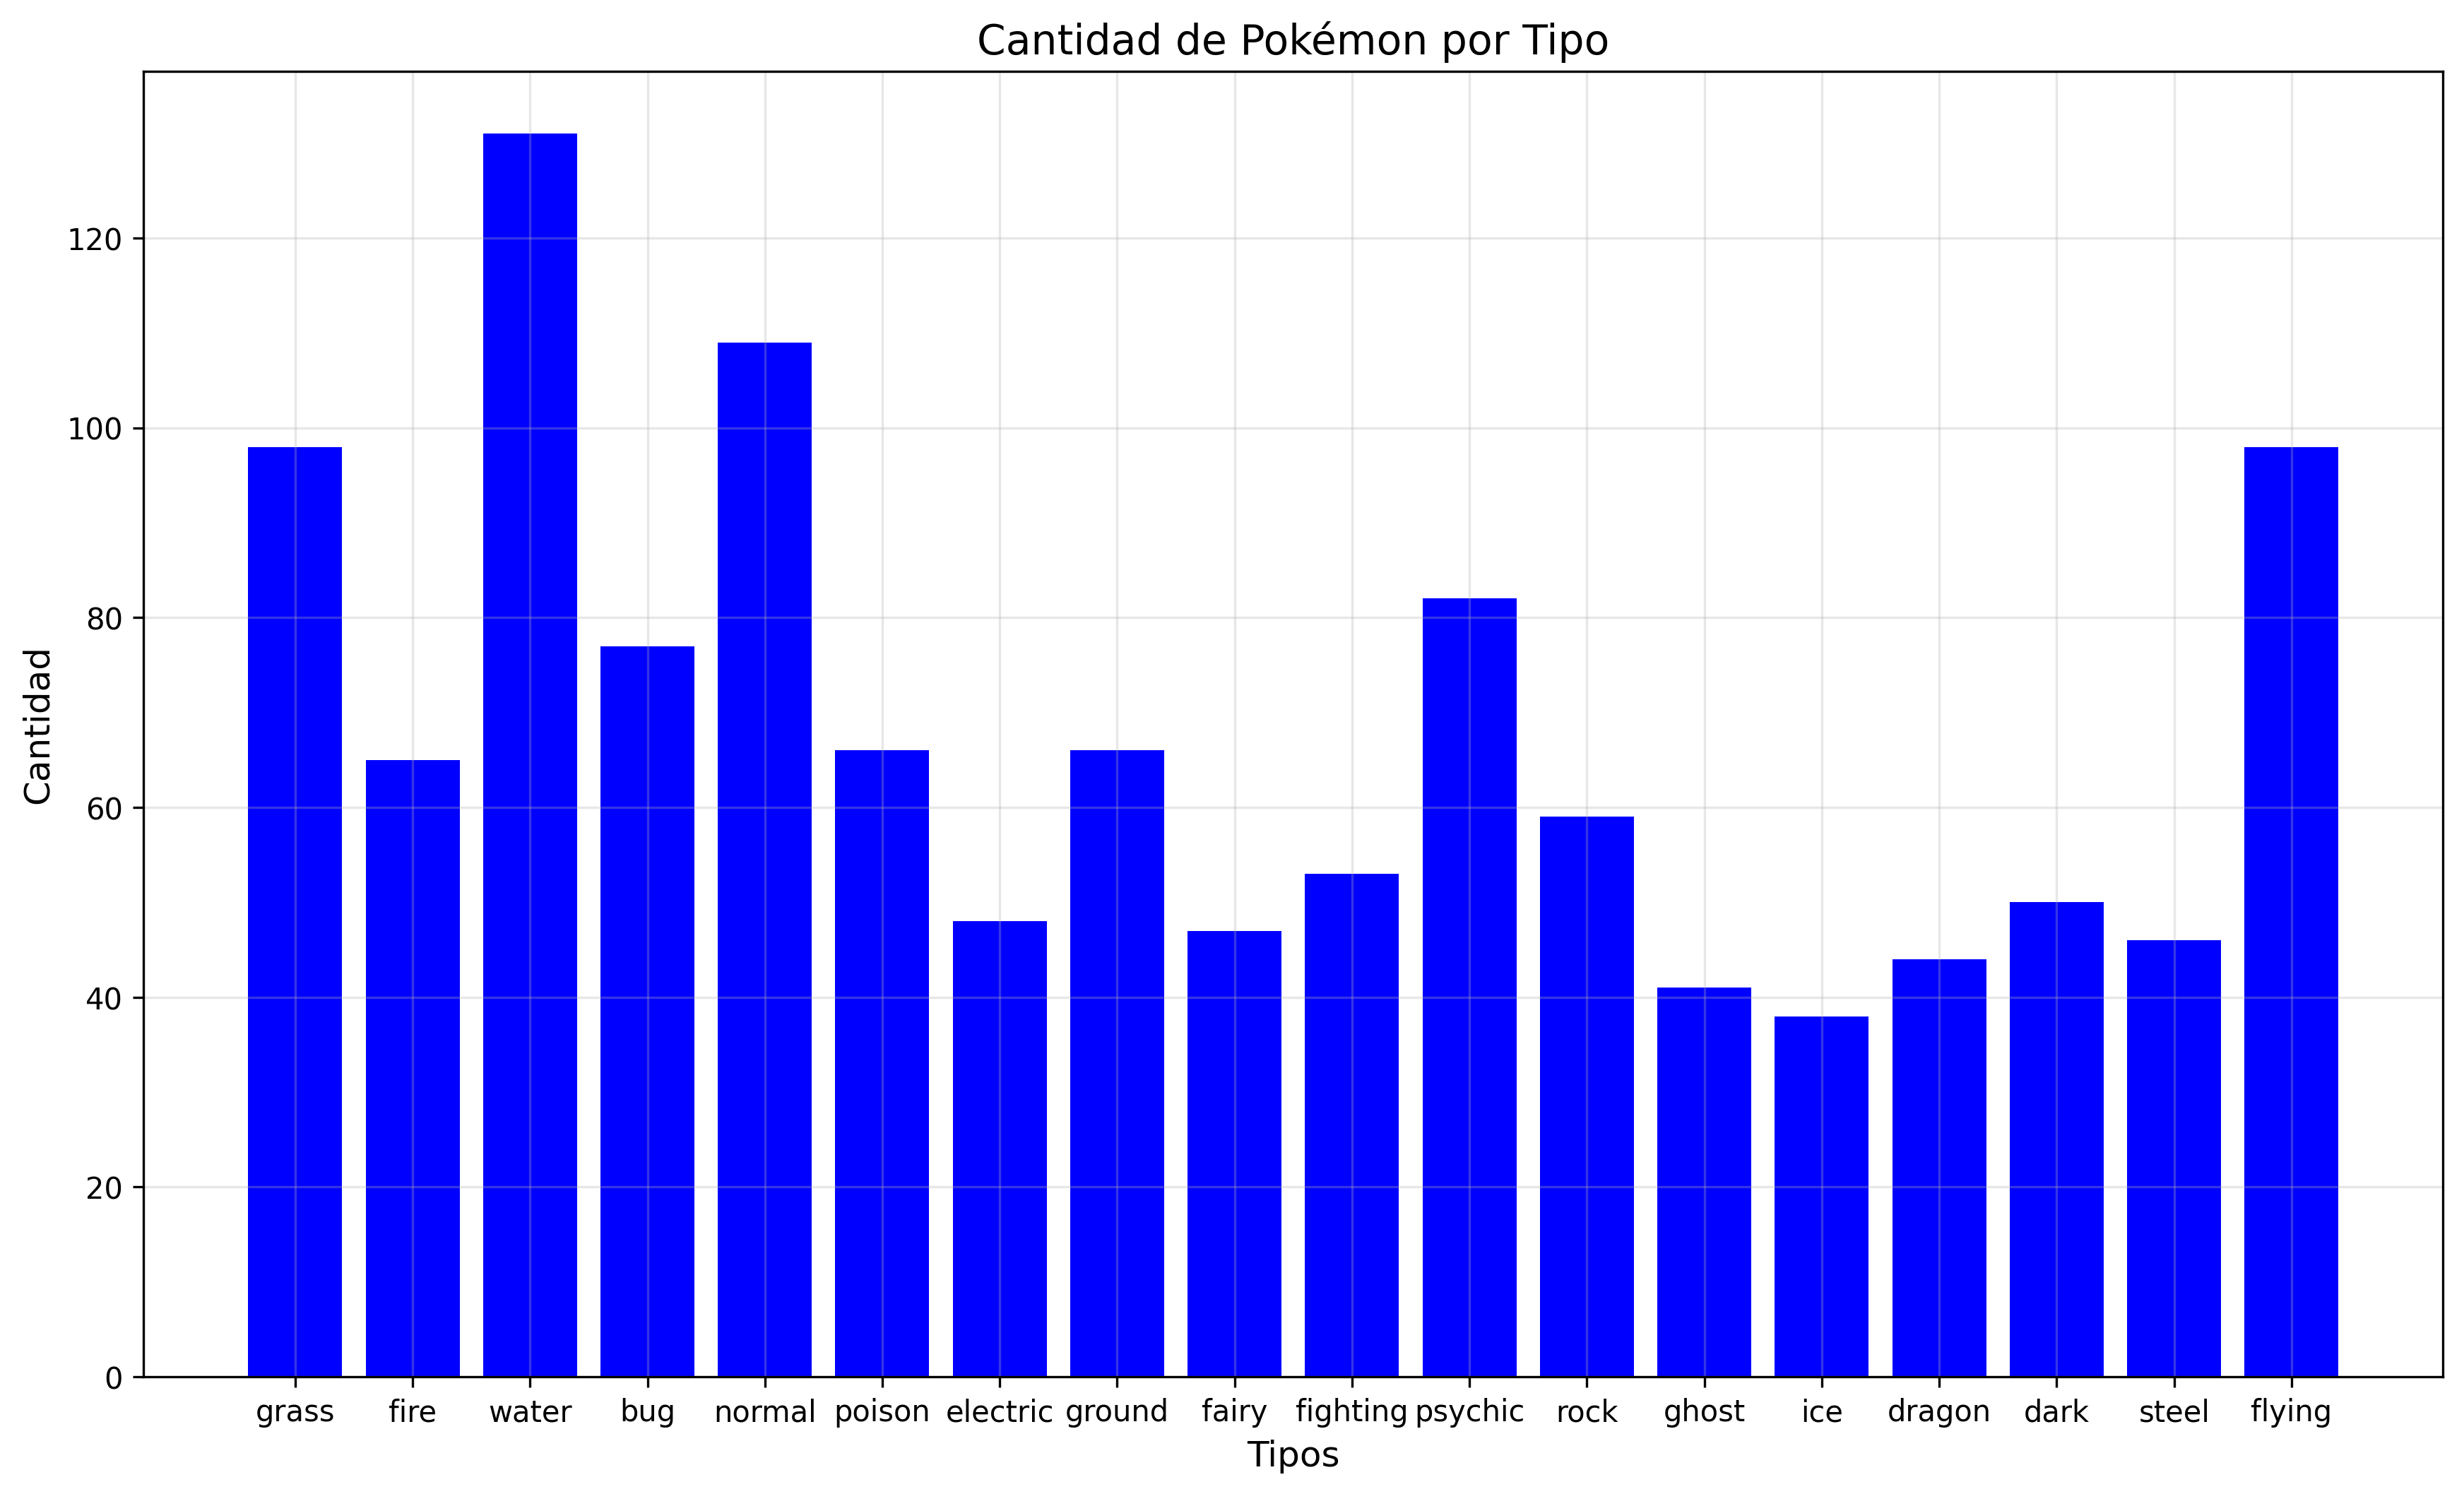

In [40]:
tipos = []
cont = []
for a in data["type1"]:
    if a not in tipos:
        tipos.append(a)
        cont.append(1)
    else:
        cont[tipos.index(a)] += 1
tip2 = data["type2"]
for b in tip2:
    if type(b) == str:
        if b not in tipos:
            tipos.append(b)
            cont.append(1)
        else:
            cont[tipos.index(b)] += 1
print(tipos)
print(cont)
plt.figure(figsize = (14,8))
plt.bar(tipos, cont, color='blue')
plt.xlabel('Tipos')
plt.ylabel('Cantidad')
plt.title('Cantidad de Pokémon por Tipo')
plt.show()

> * Con esto finalmente podemos ver que tipo de pokemon es más común, lo que puede ser relevante para un futuro modelo de machine learning utilizando varibles categóricas.

> Otra pregunta que puede surgir es: ¿Hay pokémon que sean siempre machos o siempre hembra?
> Para responder esto, analizaremos la variable percentage_male

In [43]:
def poke_sex(sex):
    if sex < 50:
        return 'primarly female'
    elif sex > 50:
        return 'primarly male'
    else:
        return 'no predilection'

data['percentage_male'] = data.apply(lambda x: poke_sex(x['percentage_male']), axis=1)

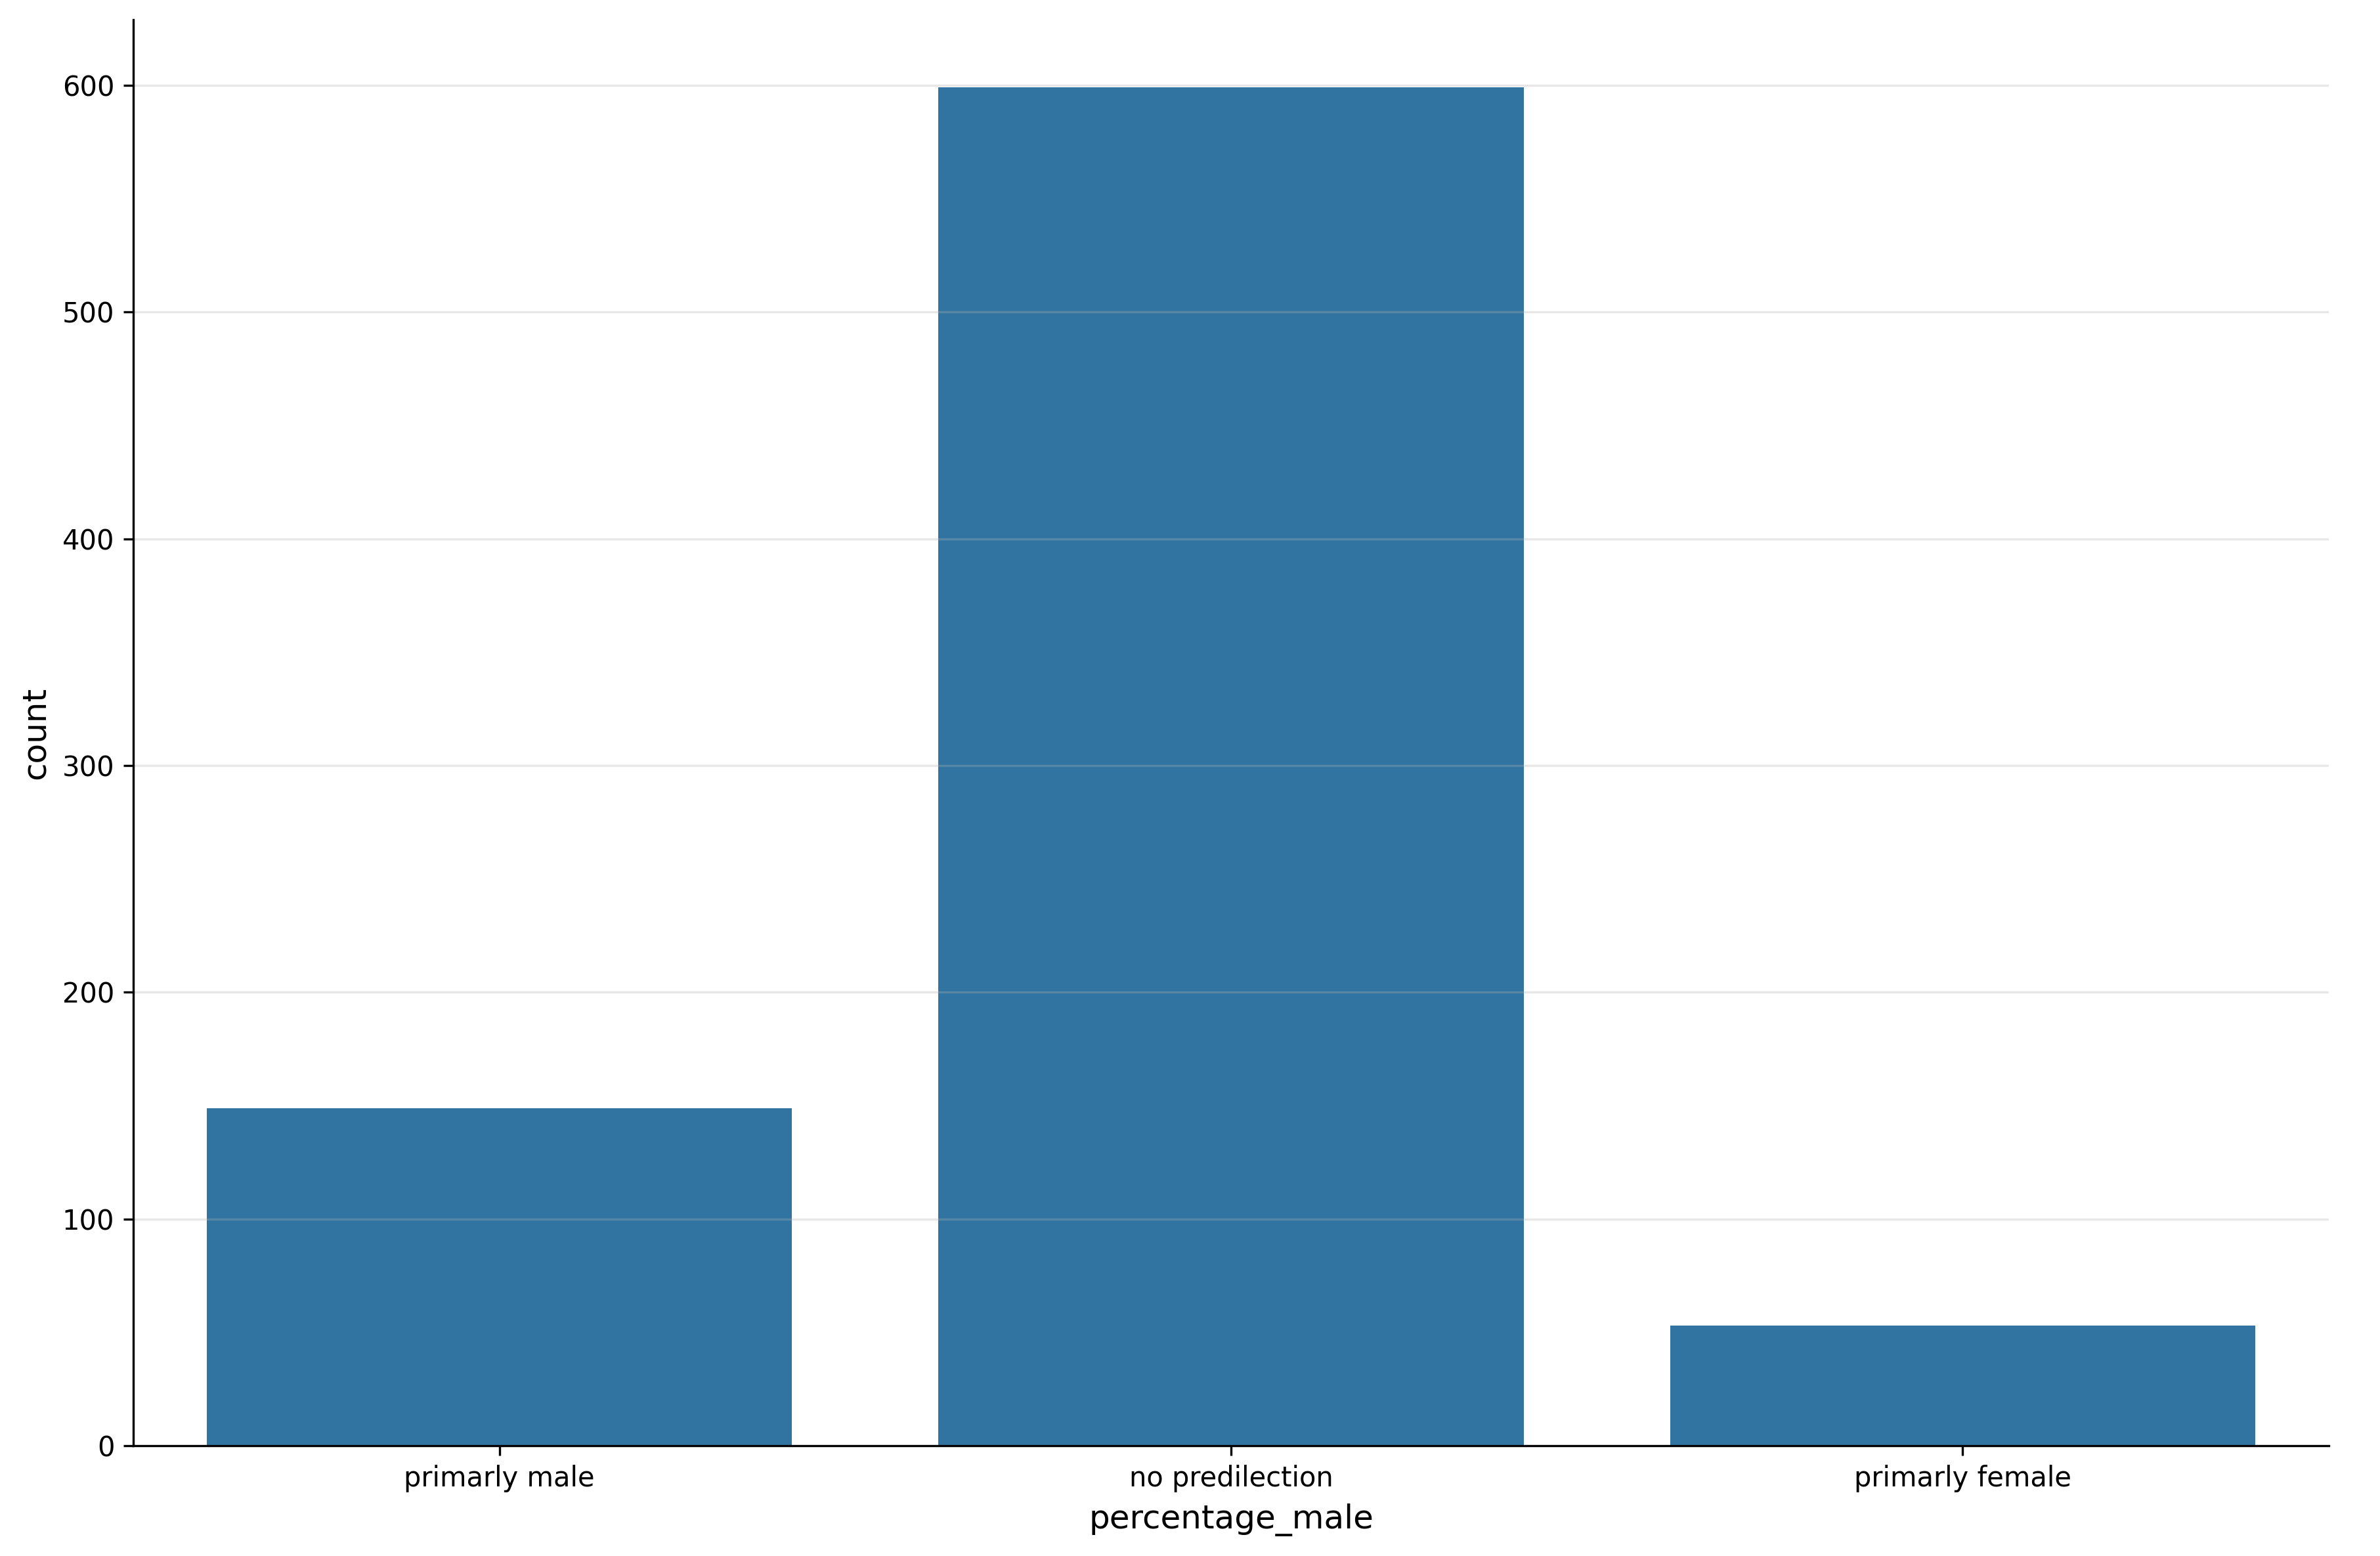

In [46]:
sns.catplot(data=data, x='percentage_male', kind='count', height=8, aspect=1.5)
plt.show()

> Aquí podemos observar como la mayoría de los pokémon no tienen predilección de género, sin embargo, hay algunos pokémon que son mayormente machos o hembras. Creemos que esto debe ser por algo de carácter estadístico y no por azar.

> ## Análisis de variables no categóricas
> En esta sección se analizarán mediante histogramas y otras visualizaciones las variables no categóricas del set de datos.

<AxesSubplot: title={'center': 'Vida base'}, ylabel='Frequency'>

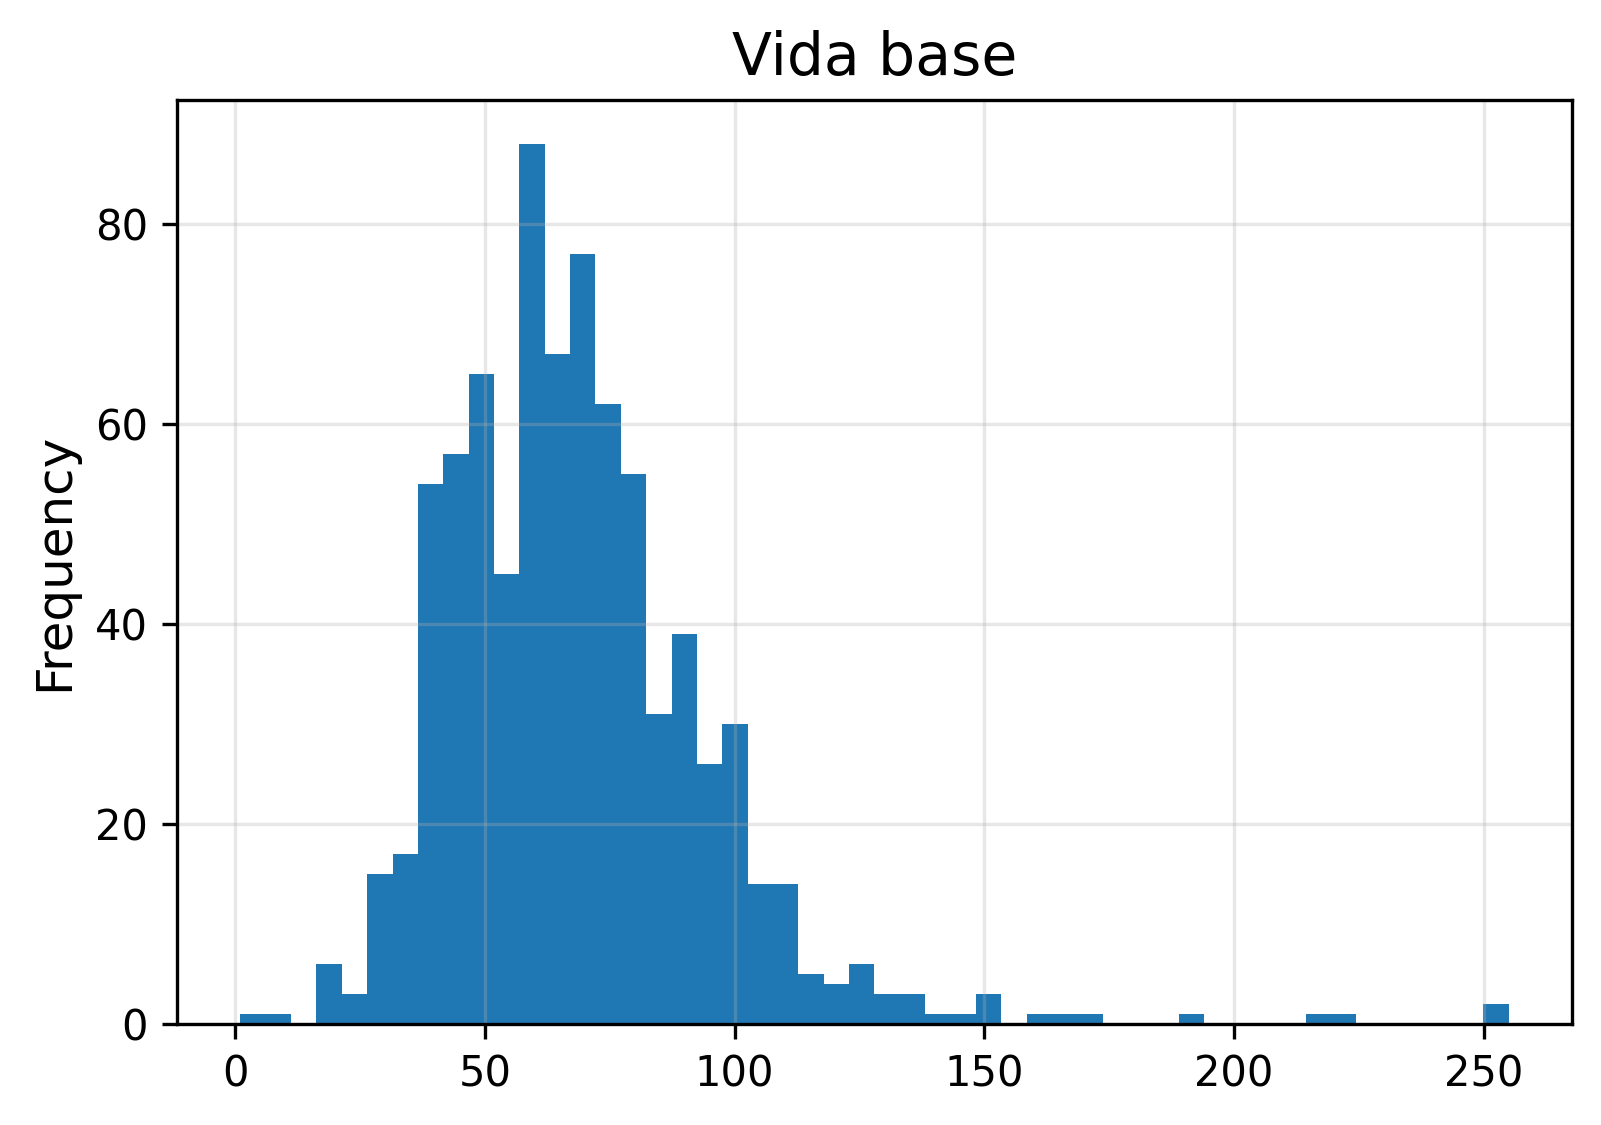

In [49]:
data['hp'].plot(title='Vida base', kind='hist', bins=50)

In [52]:
round(data['hp'].mean(), 2) # calculo de la media de la vida base de los pokémon

68.96

> * En algunos casos es posible identificar outliers en los datos, por lo que se debe tener cuidado al momento de realizar análisis estadísticos.
> * En este caso, se observa que la vida base de los pokémon se distribuye de manera similar a una distribución normal, con una media de 69.3 puntos de vida base.
> * Es más fácil identificar outliers dentro de un digrama de caja y bigote pues se puede identificar el rango intercuartílico y los valores atípicos.
> * Vamos a realizar diagramas de caja y bigote para las estadísticas base de los pokémon.

68.96 65.0


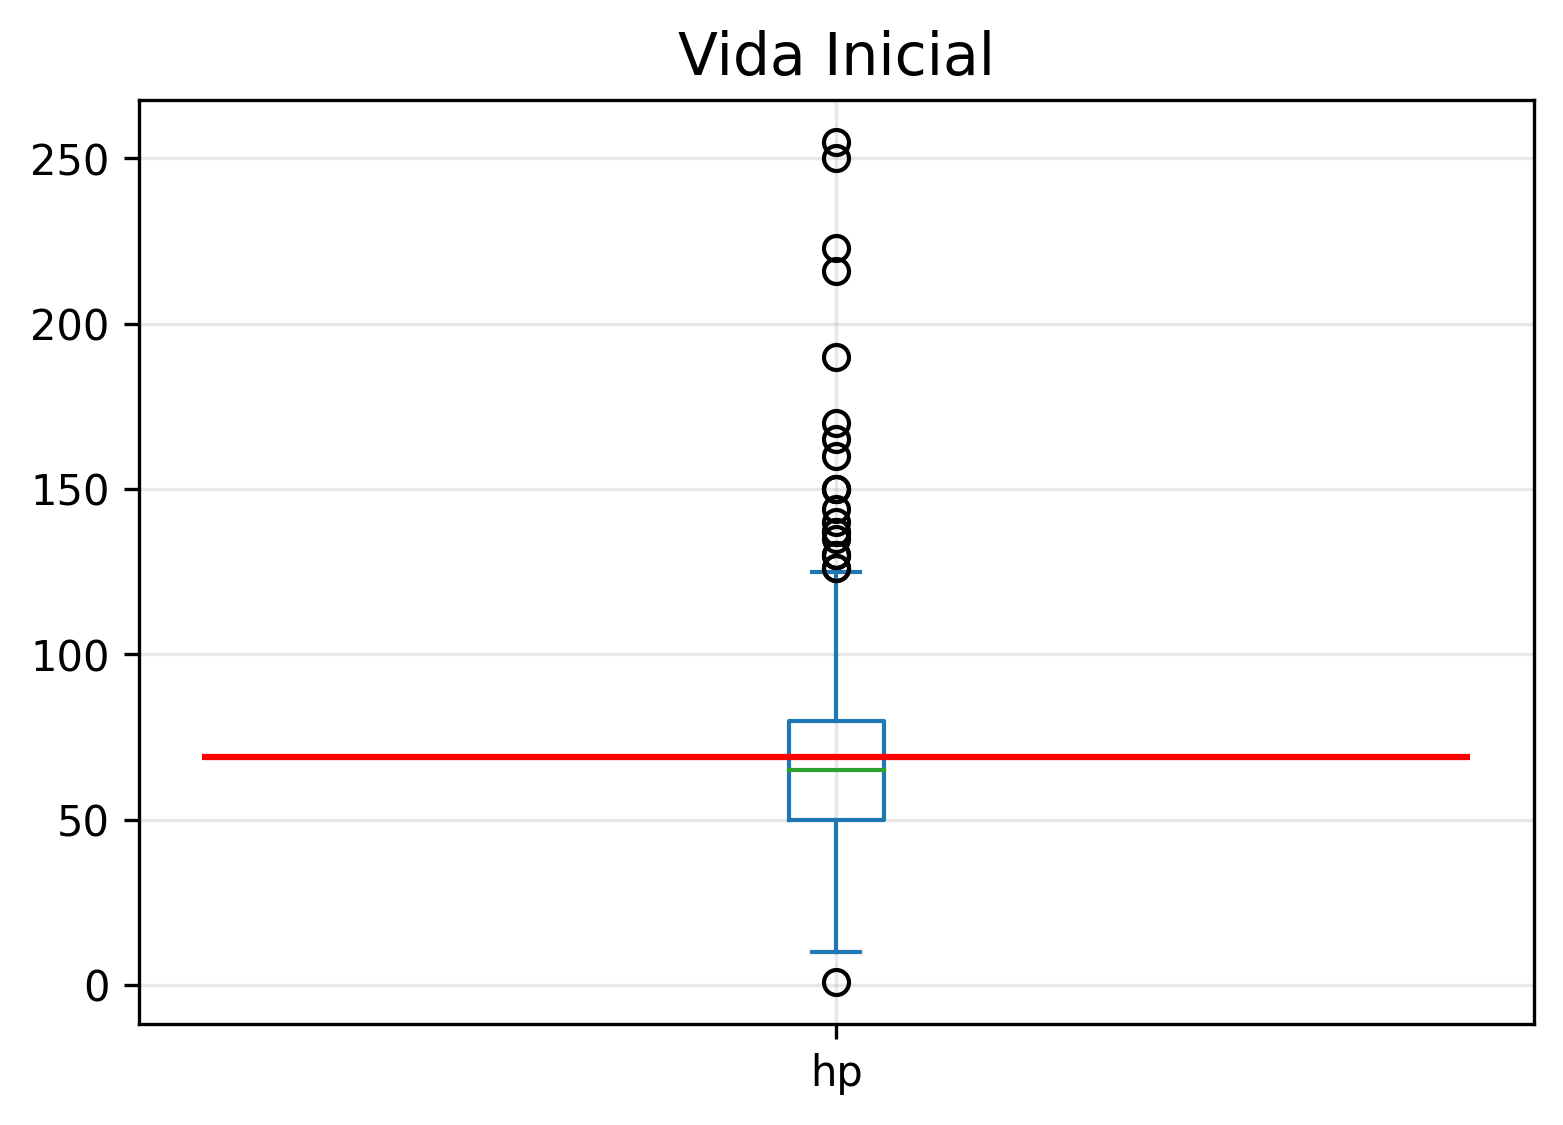

In [91]:
print(data['hp'].mean().round(2), data['hp'].median())
data['hp'].plot(title='Vida Inicial', kind='box')
plt.hlines(y=data['hp'].mean(), xmin=0, xmax=2, color='red')
plt.show()

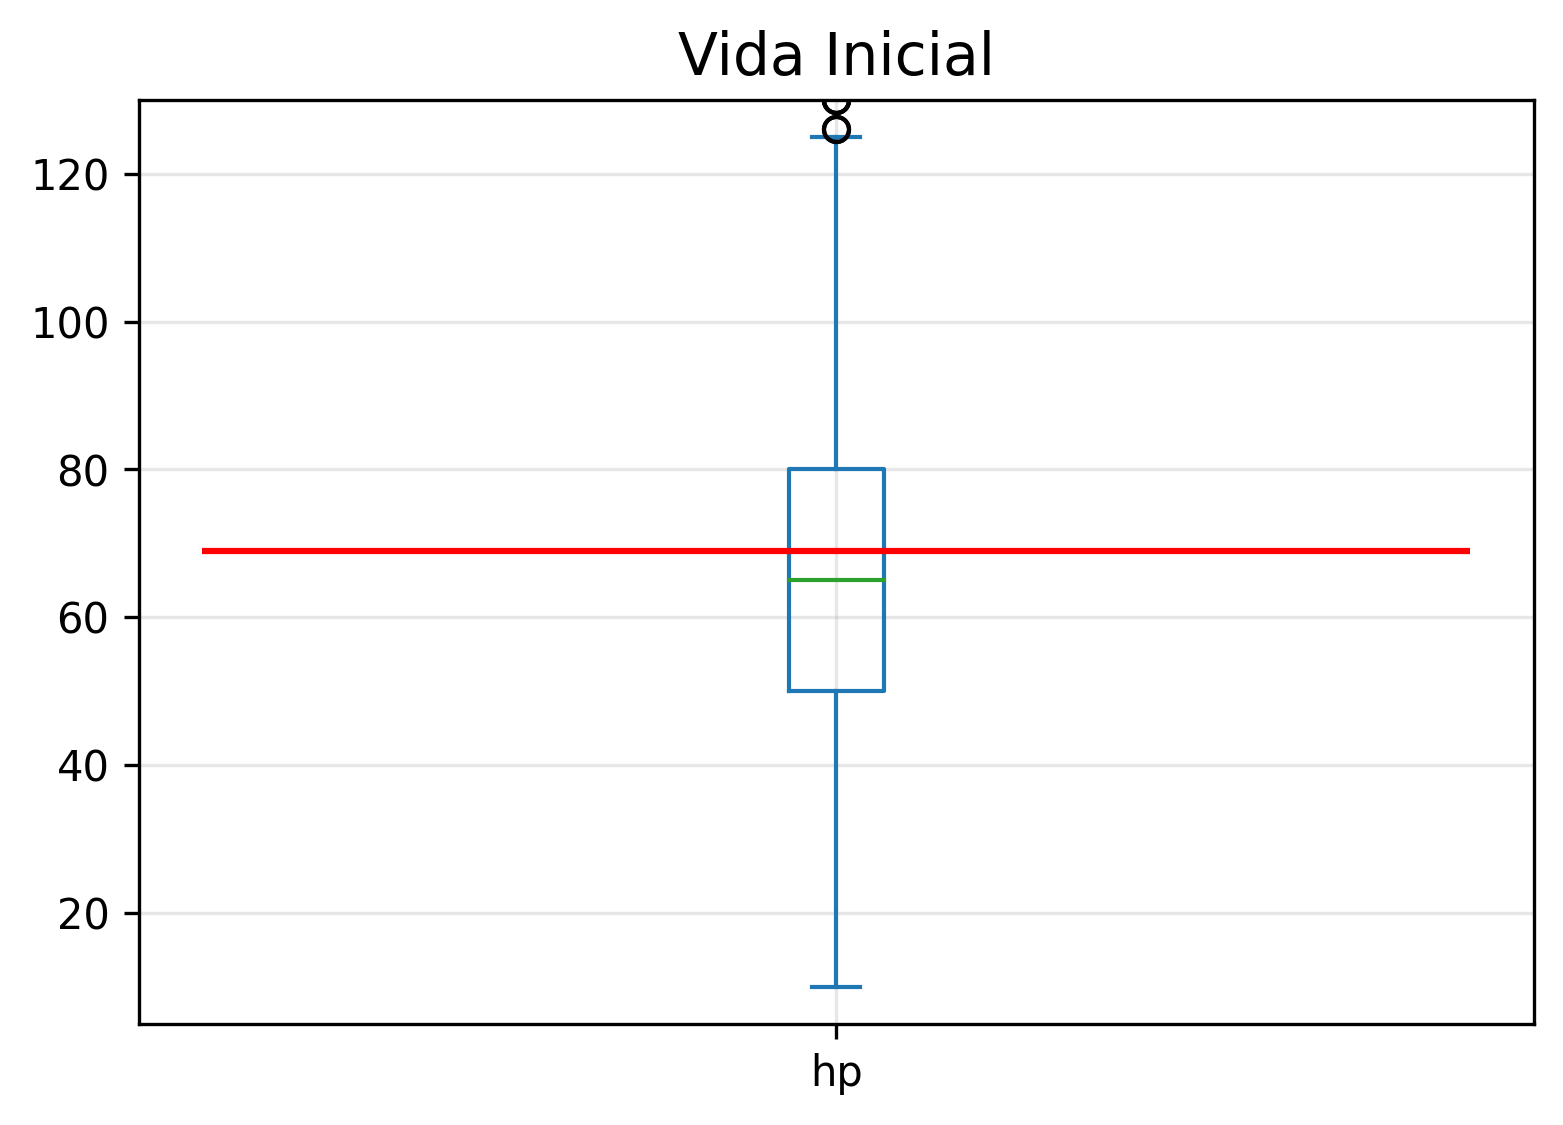

In [58]:
#data['hp'].plot(title='Vida Inicial', kind='box')
data['hp'].plot(title='Vida Inicial', kind='box', ylim=(5,130))
plt.hlines(y=data['hp'].mean(), xmin=0, xmax=2, color='red')
plt.show()

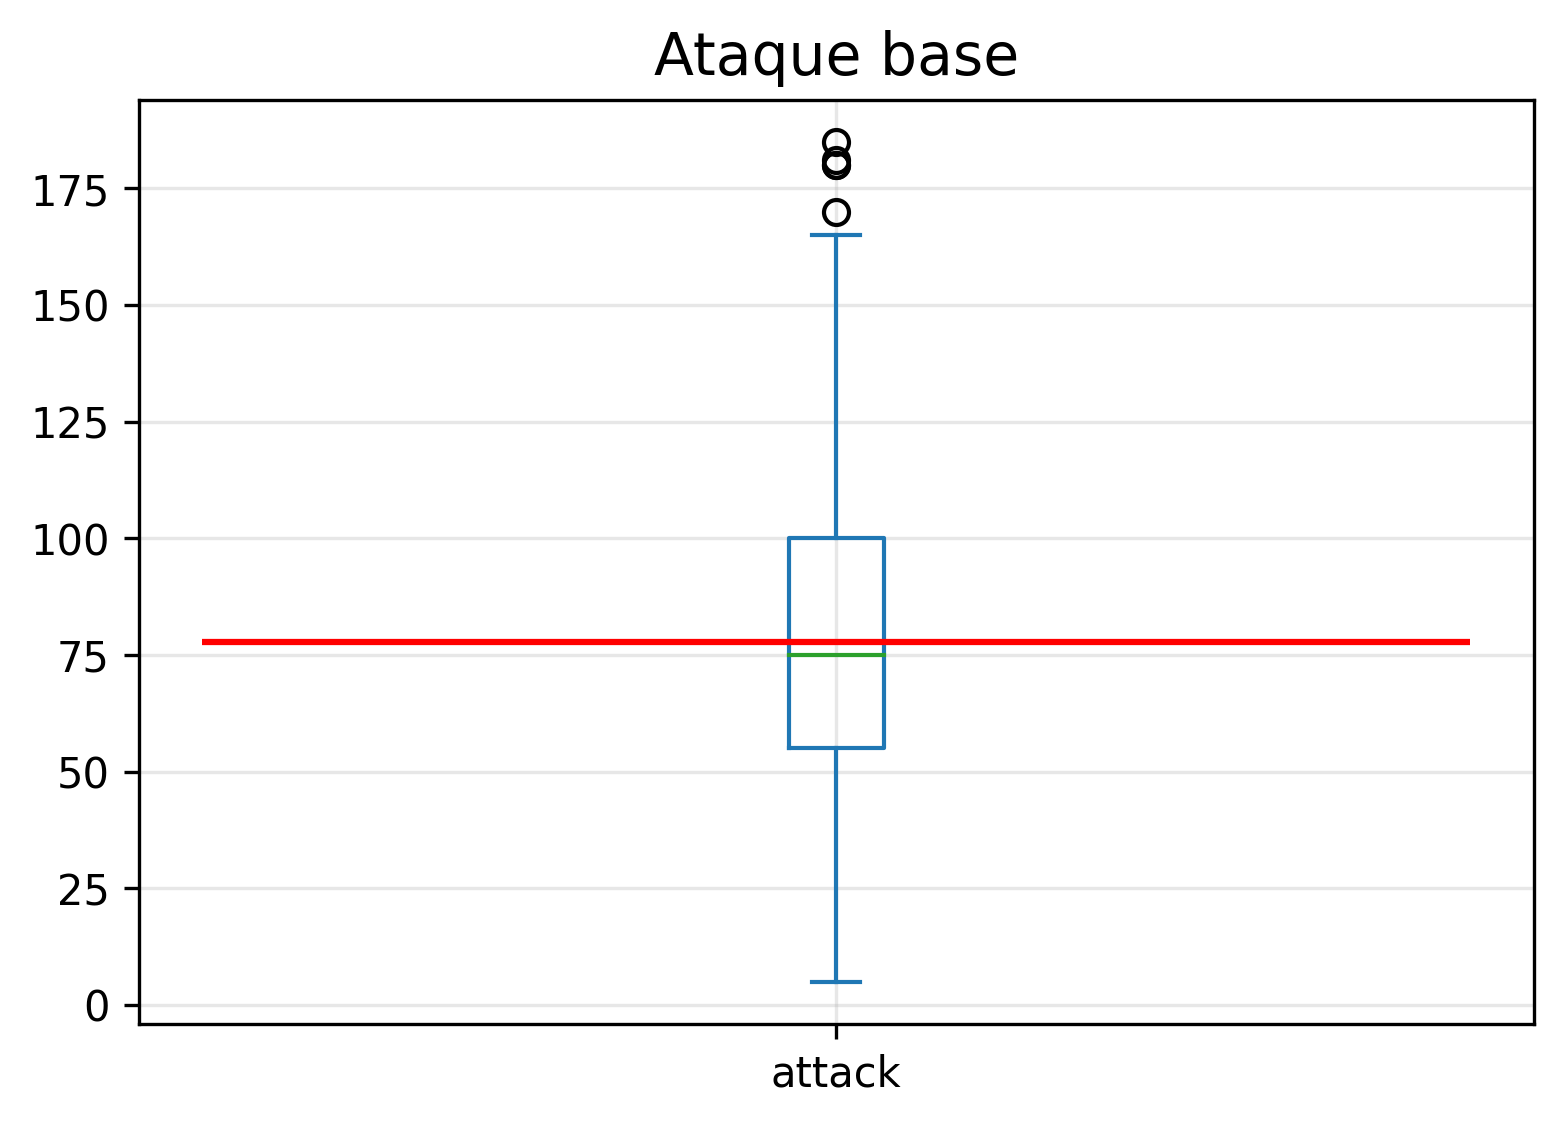

el promedio de ataque es 77.86 y la mediana es 75.0


In [109]:
data['attack'].plot(title='Ataque base', kind='box')
plt.hlines(y=data['attack'].mean(), xmin=0, xmax=2, color='red')
#data['hp'].plot(title='Vida Inicial', kind='box', ylim=(5,130))
plt.show()
print("el promedio de ataque es", round(data['attack'].mean(), 2), "y la mediana es", data['attack'].median())

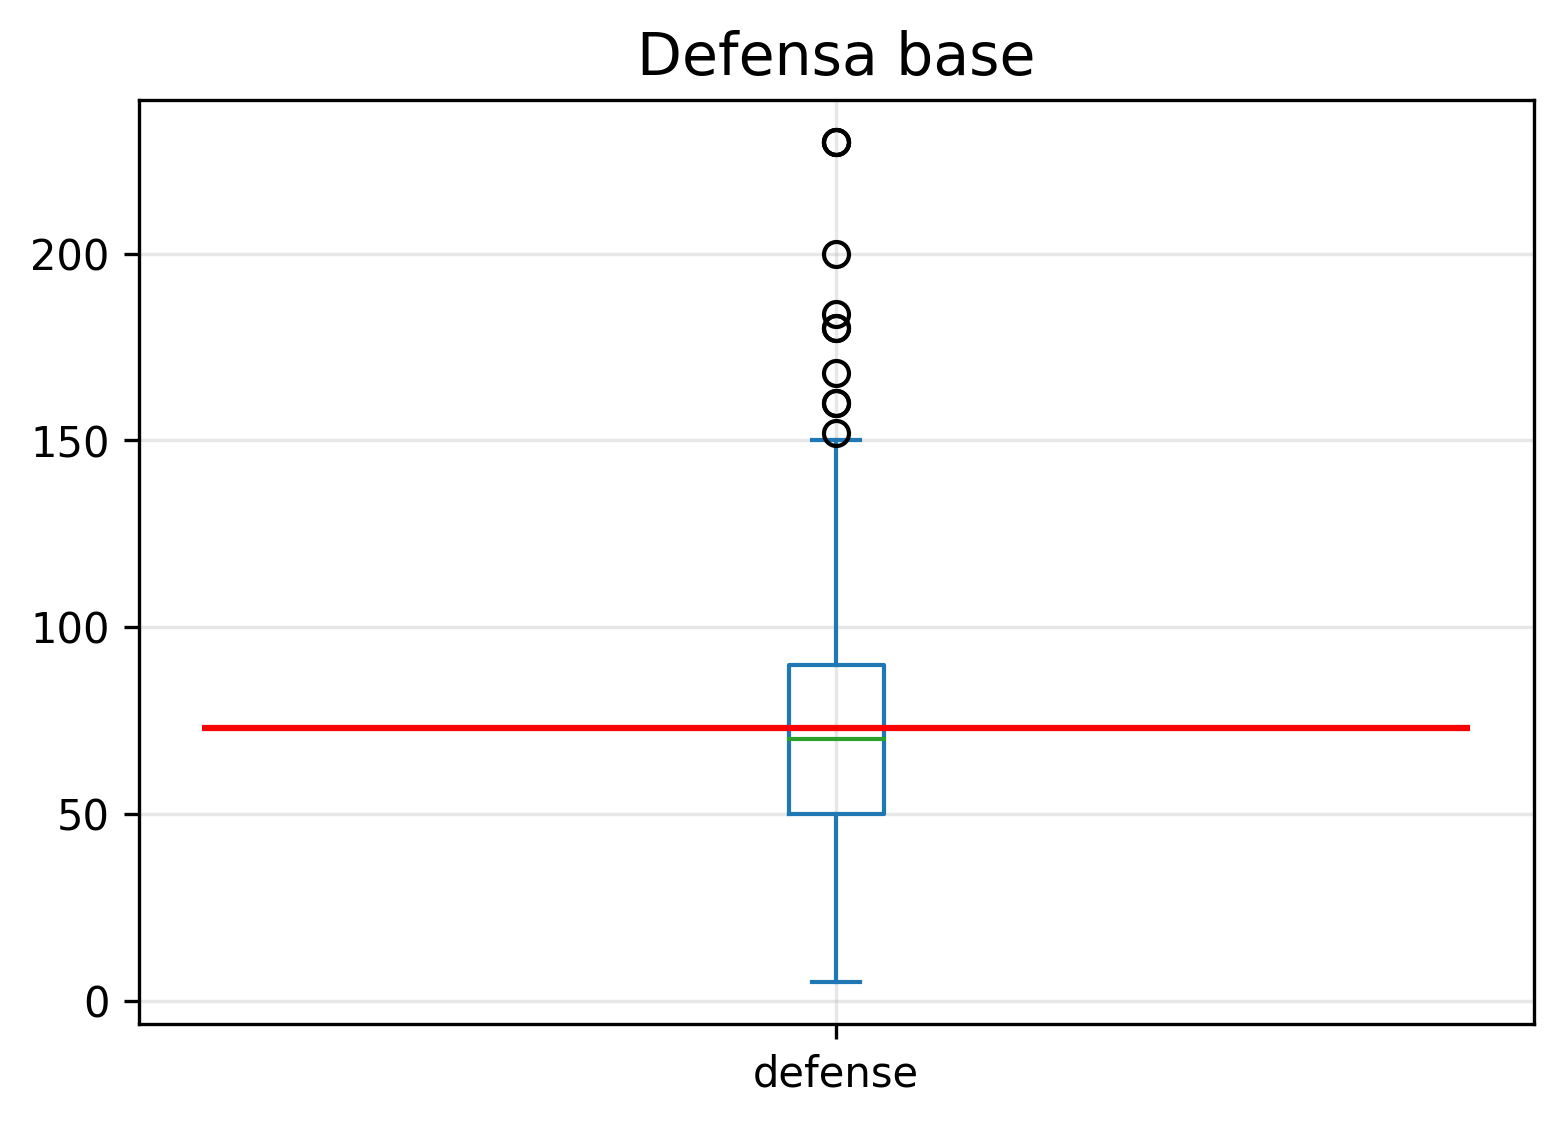

el promedio de defensa es 73.01 y la mediana es 70.0


In [112]:
data['defense'].plot(title='Defensa base', kind='box')
plt.hlines(y=data['defense'].mean(), xmin=0, xmax=2, color='red')
#data['hp'].plot(title='Defensa Base', kind='box', ylim=(5,130))
plt.show()
print("el promedio de defensa es", data['defense'].mean().round(2), "y la mediana es", data['defense'].median())


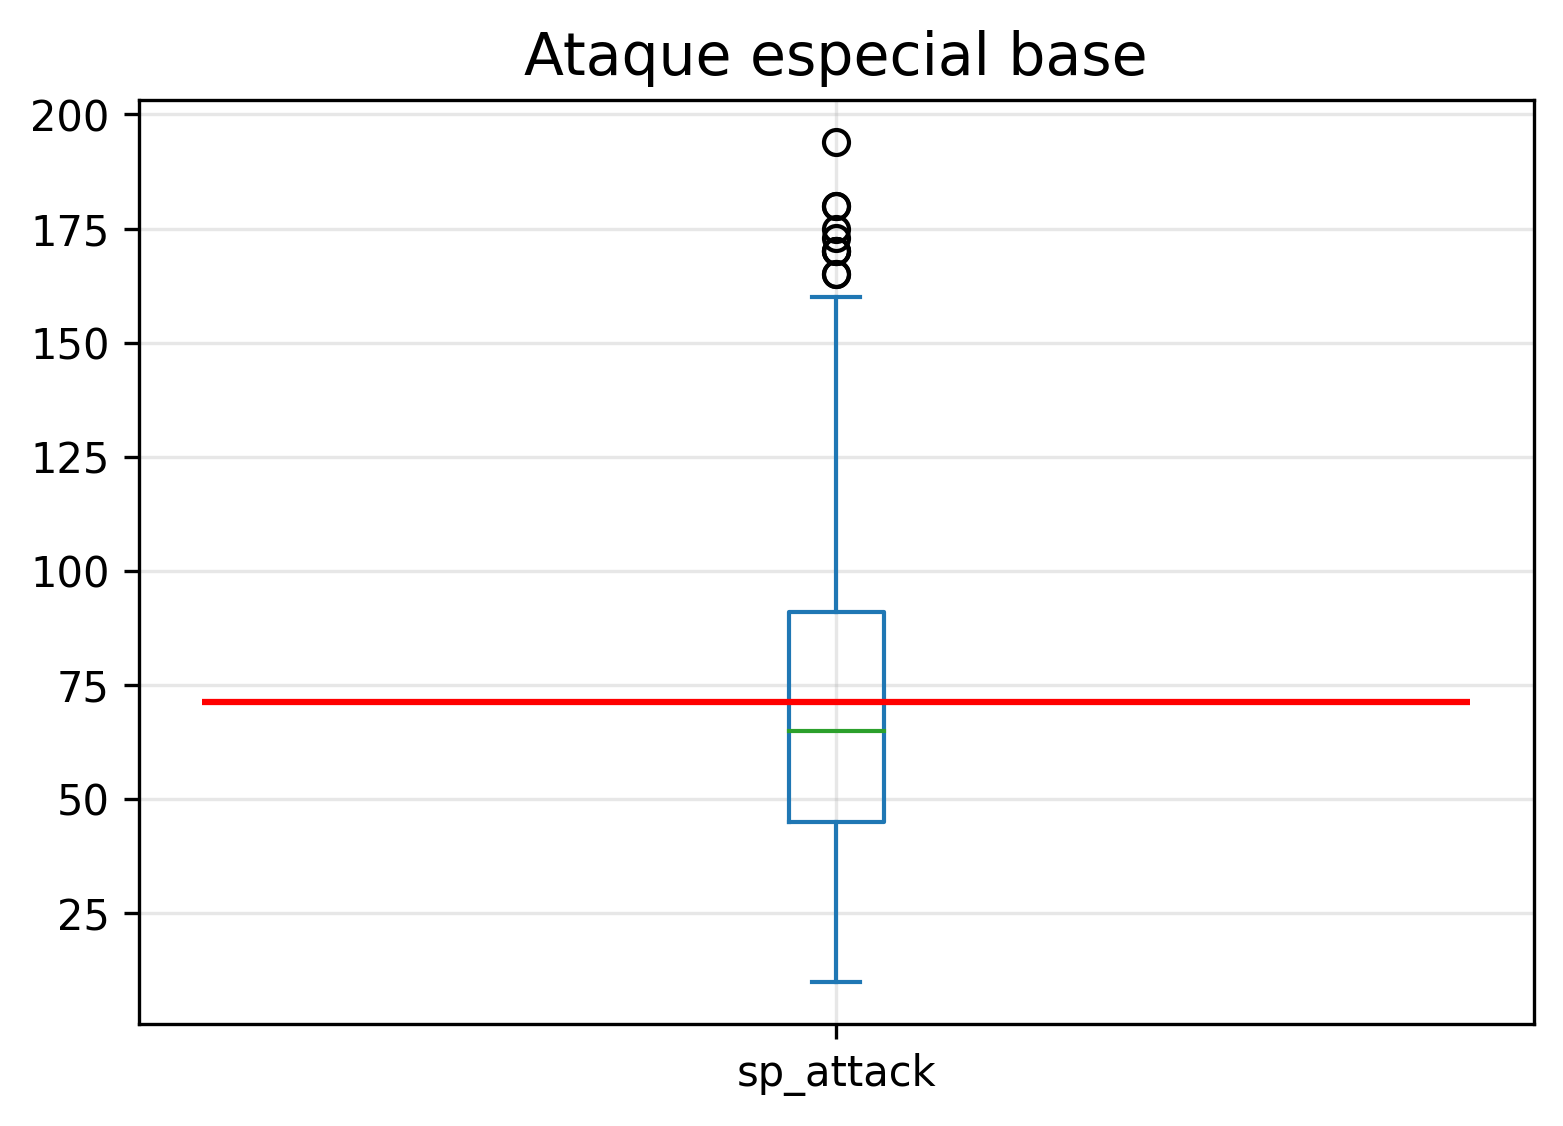

el promedio de ataque especial es 71.31 y la mediana es 65.0


In [103]:
data['sp_attack'].plot(title='Ataque especial base', kind='box')
plt.hlines(y=data['sp_attack'].mean(), xmin=0, xmax=2, color='red')
#data['hp'].plot(title='Vida Inicial', kind='box', ylim=(5,130))
plt.show()
print("el promedio de ataque especial es", data['sp_attack'].mean().round(2), "y la mediana es", data['sp_attack'].median())


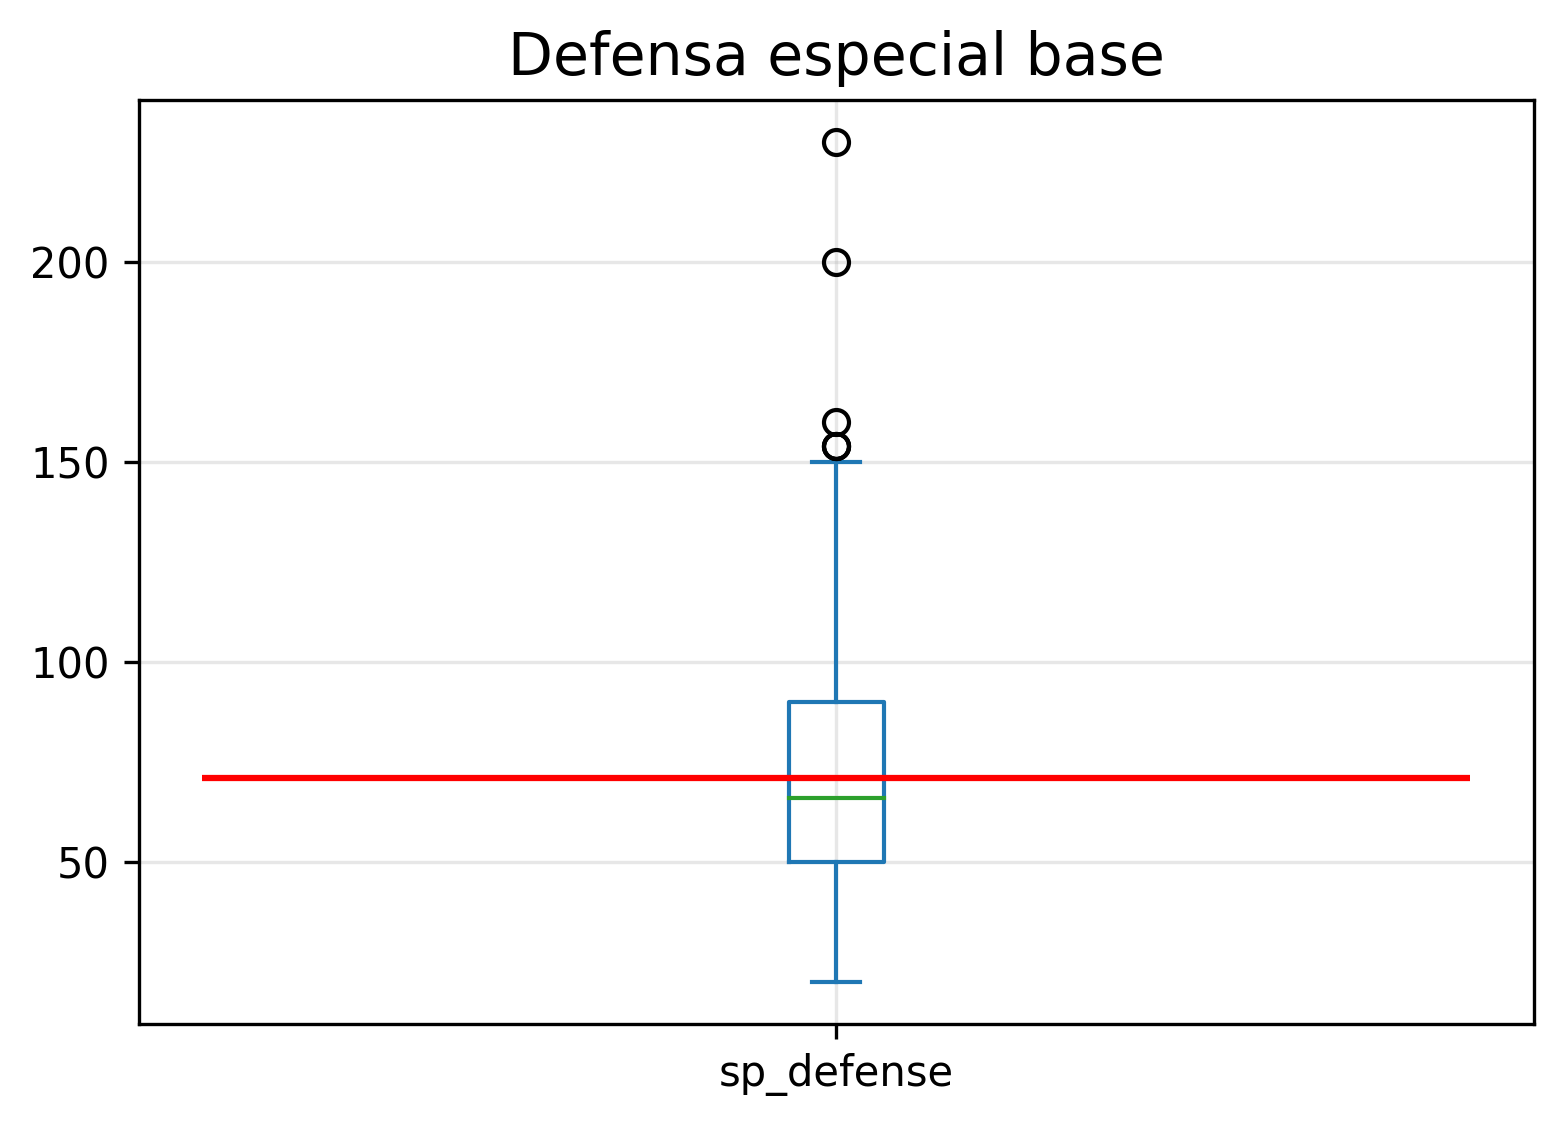

el promedio de defensa especial es 70.91 y la mediana es 66.0


In [97]:
data['sp_defense'].plot(title='Defensa especial base', kind='box')
plt.hlines(y=data['sp_defense'].mean(), xmin=0, xmax=2, color='red')
#data['hp'].plot(title='Vida Inicial', kind='box', ylim=(5,130))
plt.show()
print("el promedio de defensa especial es", data['sp_defense'].mean().round(2), "y la mediana es", data['sp_defense'].median())

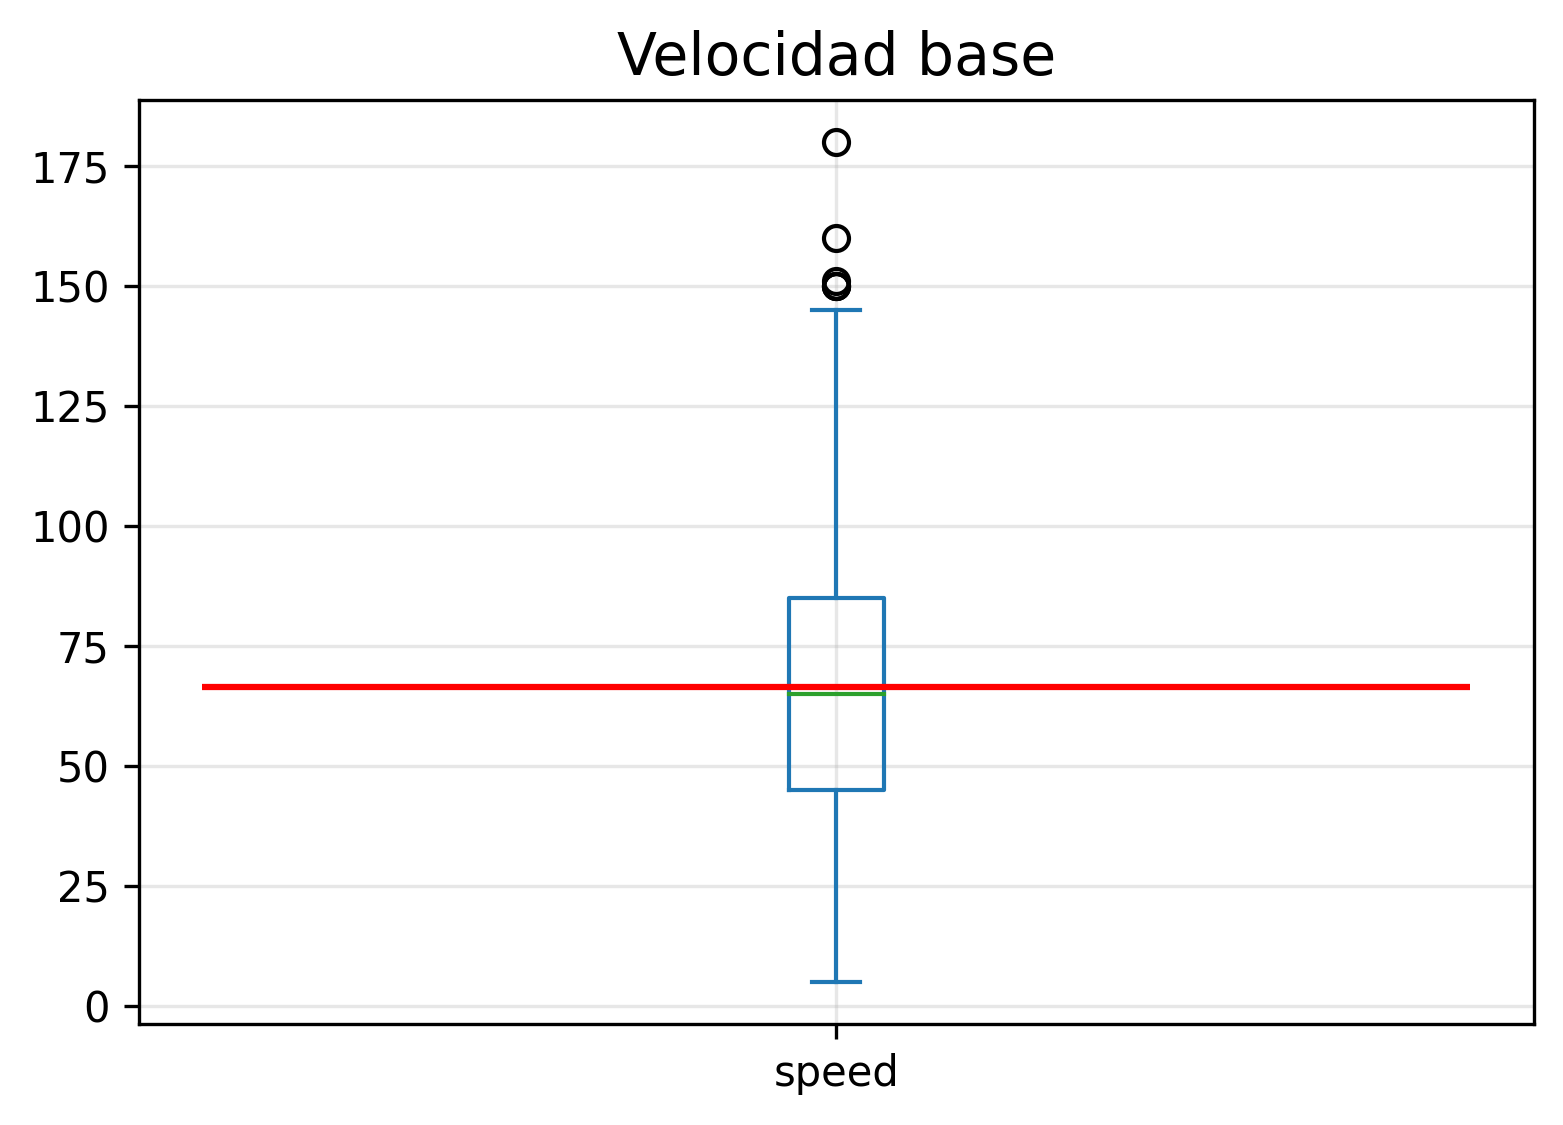

el promedio de velocidades es 66.33 y la mediana es 65.0


In [94]:
data['speed'].plot(title='Velocidad base', kind='box')
plt.hlines(y=data['speed'].mean(), xmin=0, xmax=2, color='red')
#data['hp'].plot(title='Vida Inicial', kind='box', ylim=(5,130))
plt.show()
print("el promedio de velocidades es", data['speed'].mean().round(2), "y la mediana es", data['speed'].median())

> * En los diagramas anteriores podemos notar como todas las estadísitcas tienen outliers presentes.
> * Estos outliers generalmente se encuentran en las estadísticas más altas, lo que se ve reflejado en la diferencia entre la mediana y el promedio de los datos, donde la mediana siempre es menor que el promedio.
> * Este comportamiento implica que si hubiesemos teníamos datos faltantes los deberíamos reemplazar por la mediana de los datos y no por la media.
> * Por último, podemos notar que el comportamiento estatístico de las diferentes estadísticas es similar, y para observar esto mejor, hacemos un gráfico de densidad de probabilidad de estas.

(0.0, 200.0)

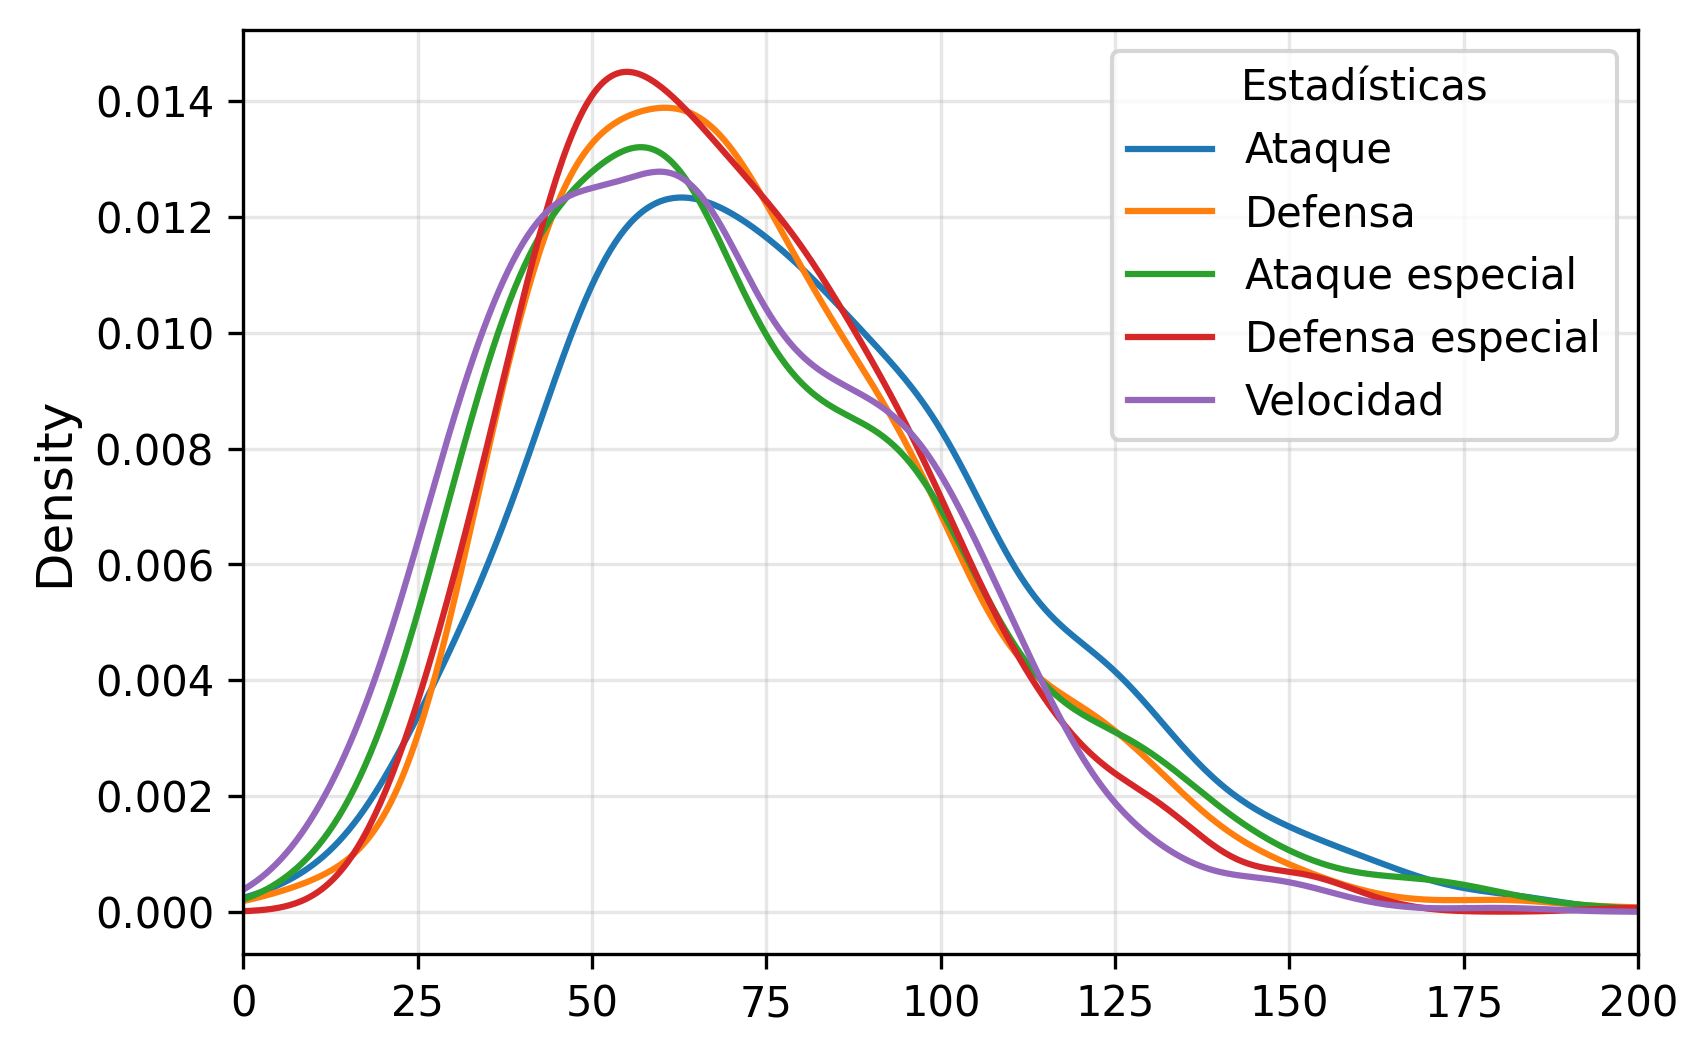

In [70]:
data['attack'].plot(kind='density', label='Ataque')
data['defense'].plot(kind='density', label='Defensa')
data['sp_attack'].plot(kind='density', label='Ataque especial')
data['sp_defense'].plot(kind='density', label='Defensa especial')
data['speed'].plot(kind='density', label='Velocidad')
plt.legend(title='Estadísticas')
plt.xlim(0,200)

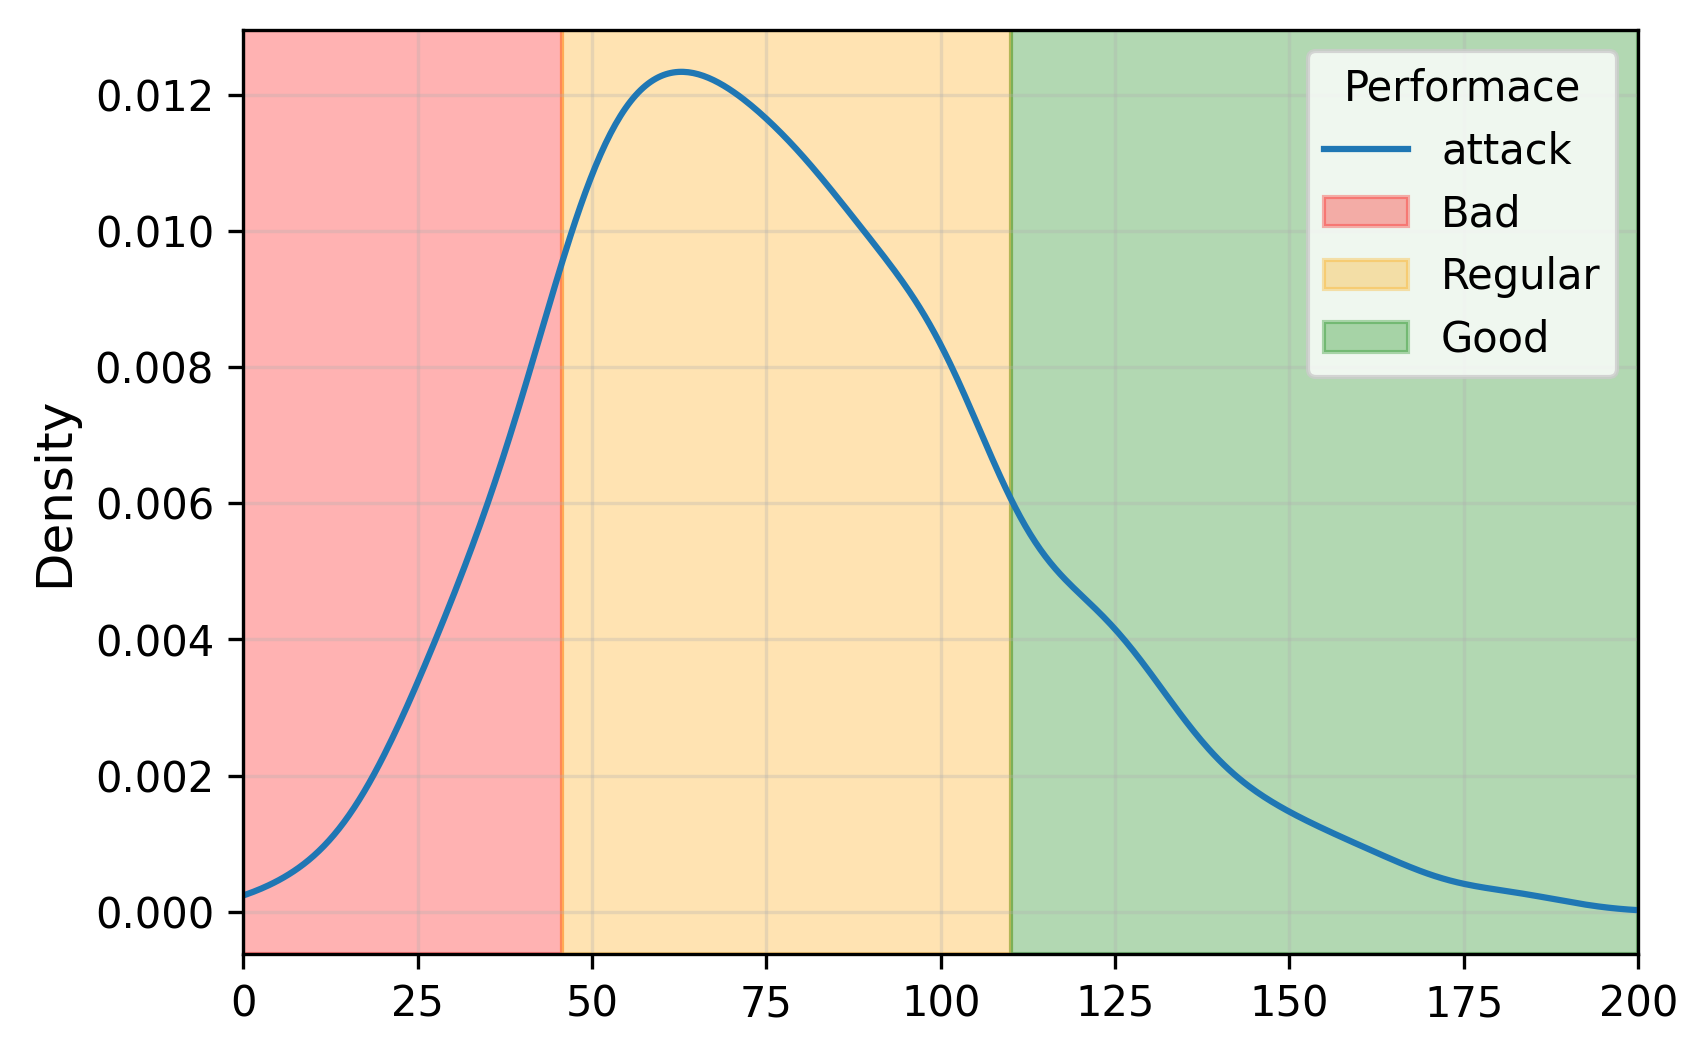

In [154]:
attack_mean = data['attack'].mean()
attack_std = data['attack'].std()
data['attack'].plot(kind='density')
plt.axvspan(0, attack_mean-attack_std, alpha=0.3, color='red', label='Bad')
plt.axvspan(attack_mean-attack_std, attack_mean+attack_std, alpha=0.3, color='orange', label='Regular')
plt.axvspan(attack_mean+attack_std, 200, alpha=0.3, color='green', label='Good')
plt.xlim(0,200)
plt.legend(title='Performace')

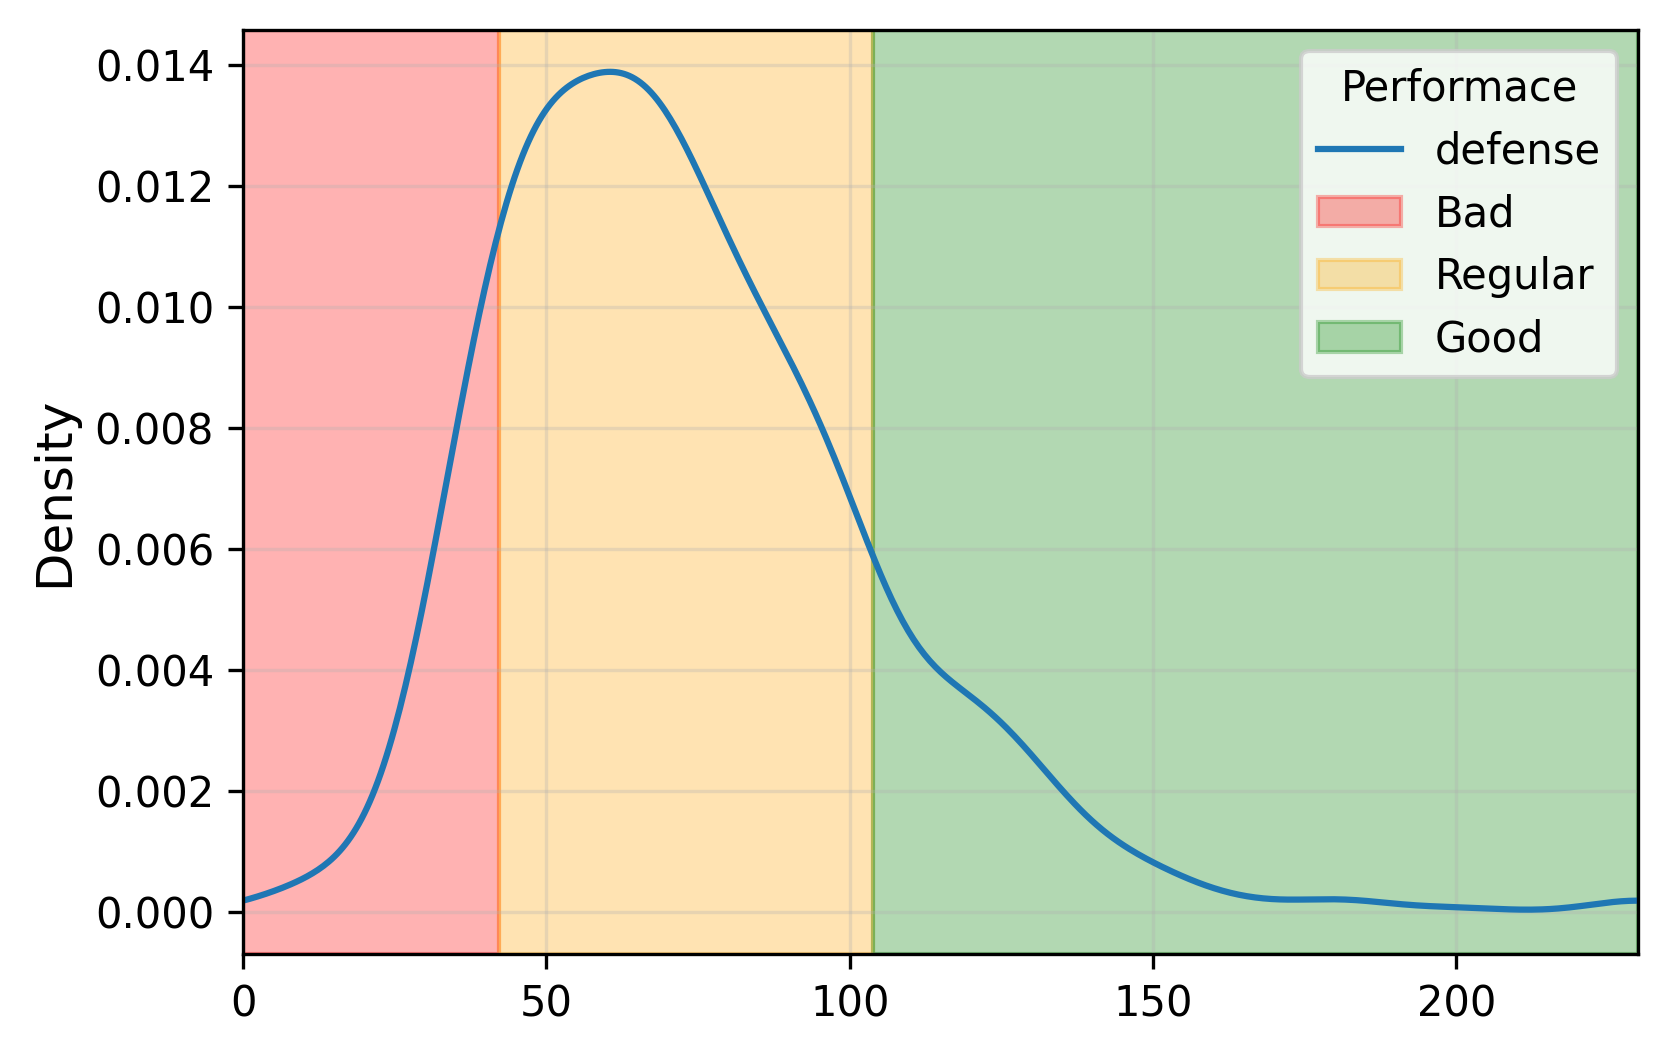

In [157]:
defense_mean = data['defense'].mean()
defense_std = data['defense'].std()
data['defense'].plot(kind='density')
plt.axvspan(0, defense_mean-defense_std, alpha=0.3, color='red', label='Bad')
plt.axvspan(defense_mean-defense_std, defense_mean+defense_std, alpha=0.3, color='orange', label='Regular')
plt.axvspan(defense_mean+defense_std, 230, alpha=0.3, color='green', label='Good')
plt.xlim(0,230)
plt.legend(title='Performace')

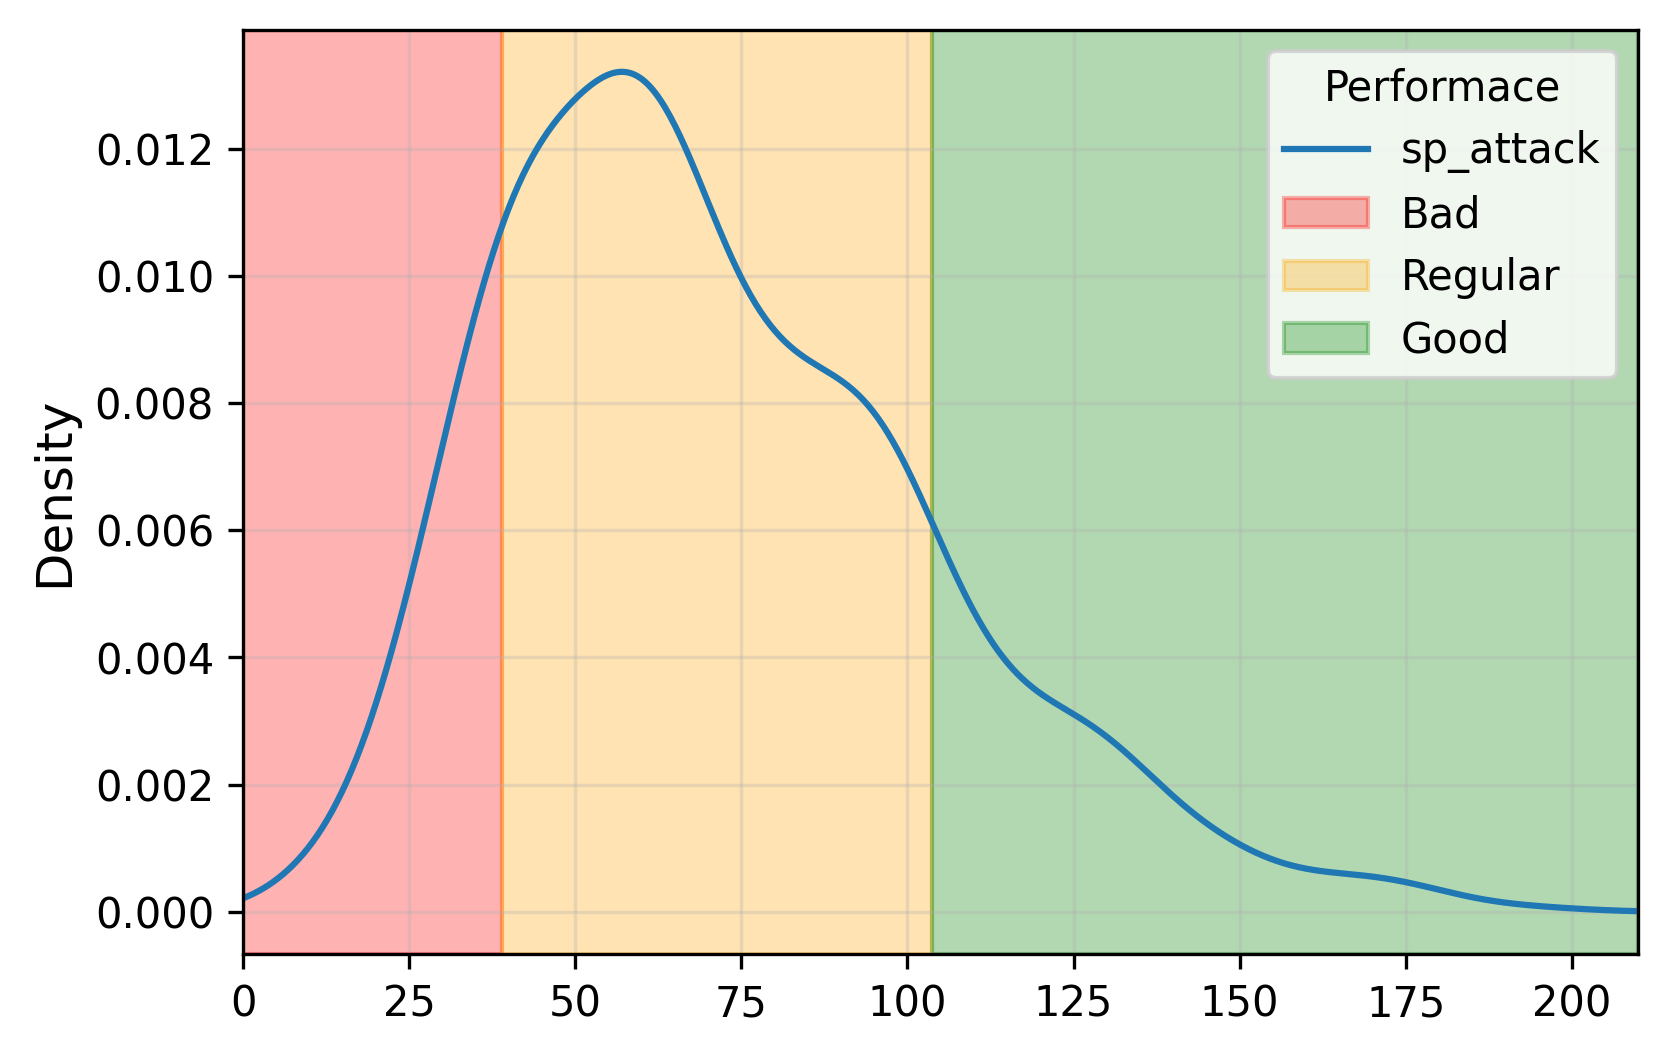

In [148]:
sp_attack_mean = data['sp_attack'].mean()
sp_attack_std = data['sp_attack'].std()
data['sp_attack'].plot(kind='density')
plt.axvspan(0, sp_attack_mean-sp_attack_std, alpha=0.3, color='red', label='Bad')
plt.axvspan(sp_attack_mean-sp_attack_std, sp_attack_mean+sp_attack_std, alpha=0.3, color='orange', label='Regular')
plt.axvspan(sp_attack_mean+sp_attack_std, 210, alpha=0.3, color='green', label='Good')
plt.xlim(0,210)
plt.legend(title='Performace')

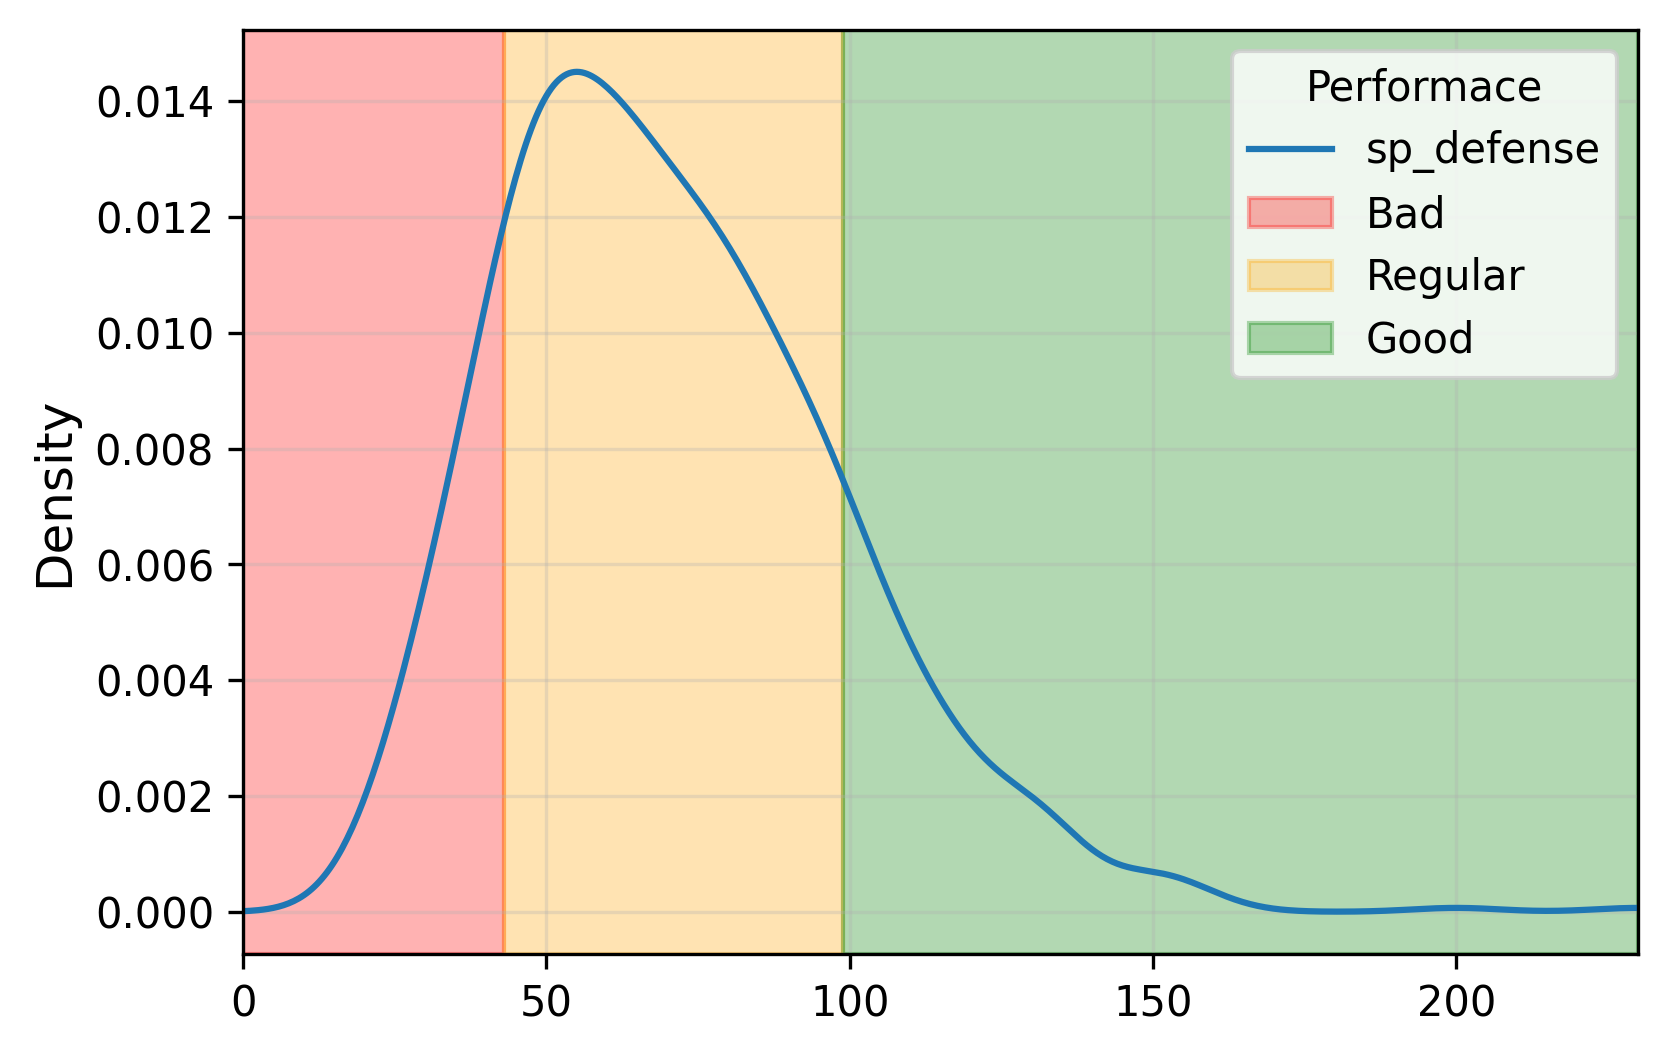

In [151]:
sp_defense_mean = data['sp_defense'].mean()
sp_defense_std = data['sp_defense'].std()
data['sp_defense'].plot(kind='density')
plt.axvspan(0, sp_defense_mean-sp_defense_std, alpha=0.3, color='red', label='Bad')
plt.axvspan(sp_defense_mean-sp_defense_std, sp_defense_mean+sp_defense_std, alpha=0.3, color='orange', label='Regular')
plt.axvspan(sp_defense_mean+sp_defense_std, 230, alpha=0.3, color='green', label='Good')
plt.xlim(0,230)
plt.legend(title='Performace')

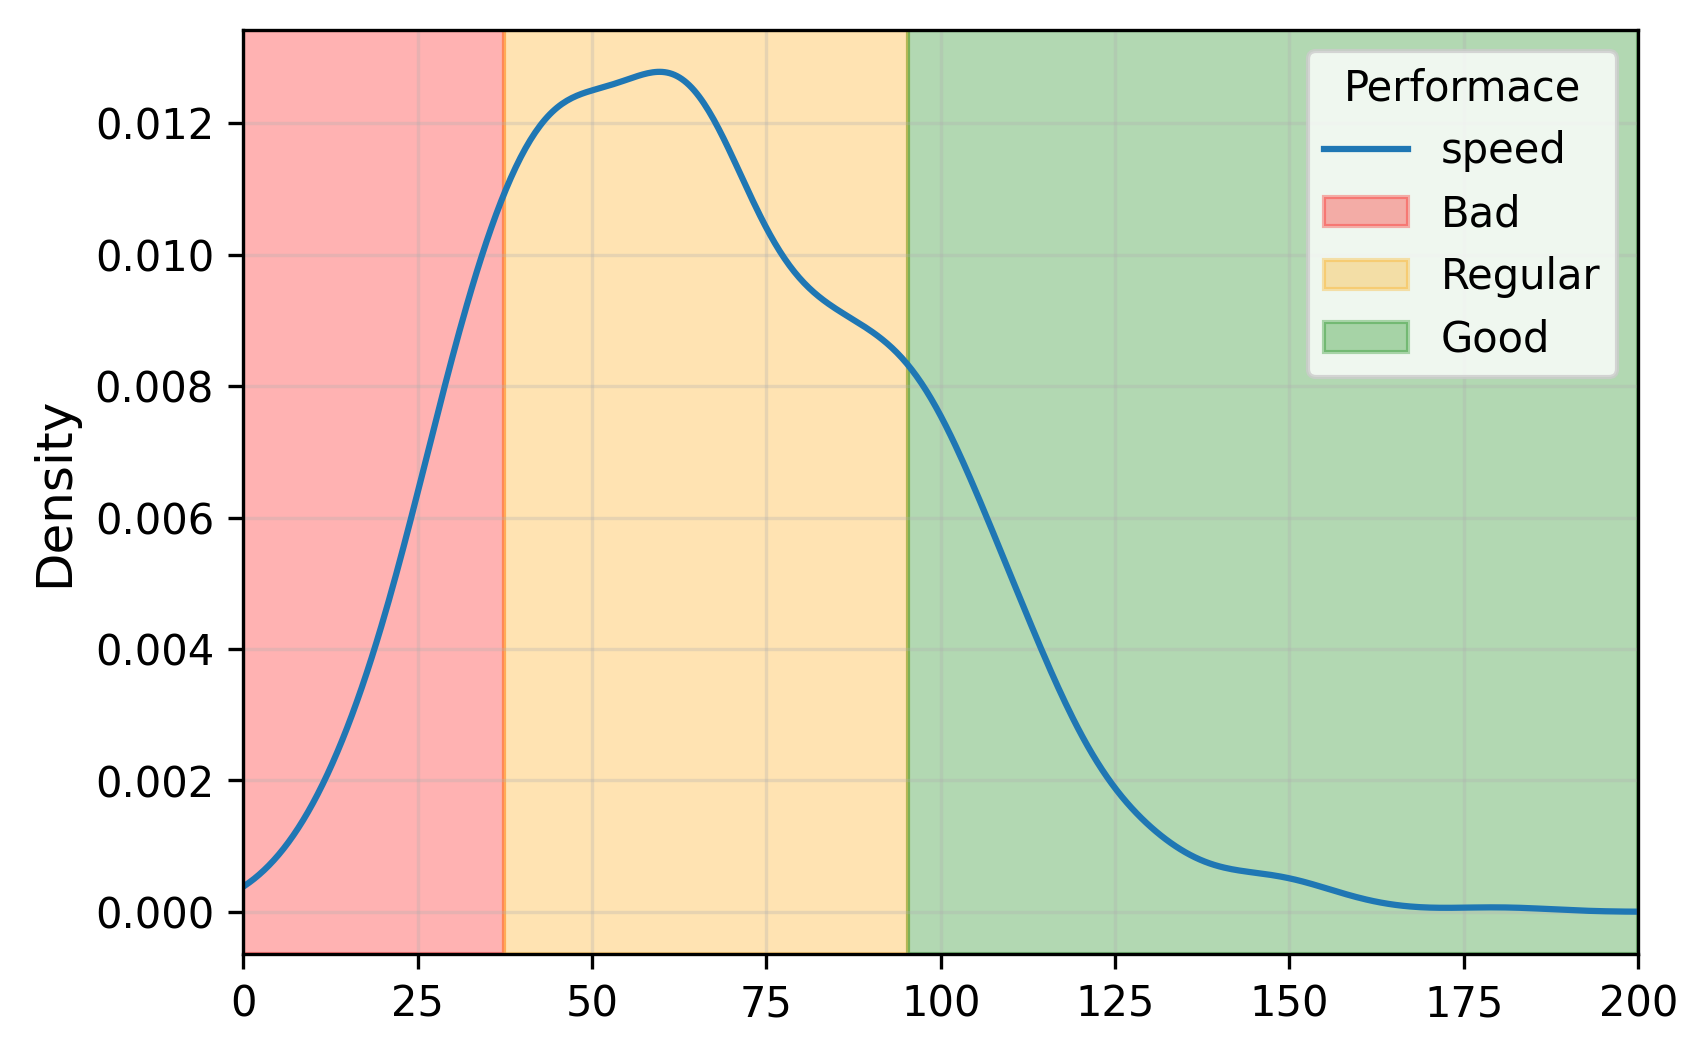

In [124]:
speed_mean = data['speed'].mean()
speed_std = data['speed'].std()
data['speed'].plot(kind='density')
plt.axvspan(0, speed_mean-speed_std, alpha=0.3, color='red', label='Bad')
plt.axvspan(speed_mean-speed_std, speed_mean+speed_std, alpha=0.3, color='orange', label='Regular')
plt.axvspan(speed_mean+speed_std, 200, alpha=0.3, color='green', label='Good')
plt.xlim(0,200)
plt.legend(title='Performace')


> * Es importante mencionar que no se realizó un ajuste de curva exhaustivo para determinar la distribución de los datos, por lo que se debe tener cuidado al interpretar los resultados.
> * Para mejorar el rango estadístico el cual se considera "bueno", "malo" o "regular" sería factible poder realizar un ajuste de curva Voight, Lorenztiano o bien Gausseano para determinar una desviación estándar real de los datos.
> * El criterio empleado en este gráfico fue el uso de la desviación estándar de los datos, donde se considera que los datos que se encuentran a una desviación estándar de la media son "regulares", los que se encuentran a dos desviaciones estándar de la media son "buenos" y los que se encuentran a más de dos desviaciones estándar de la media son "malos".
>
> ## **Ajuste de curva Gausseano**
>
> *This code was generated using openAI*

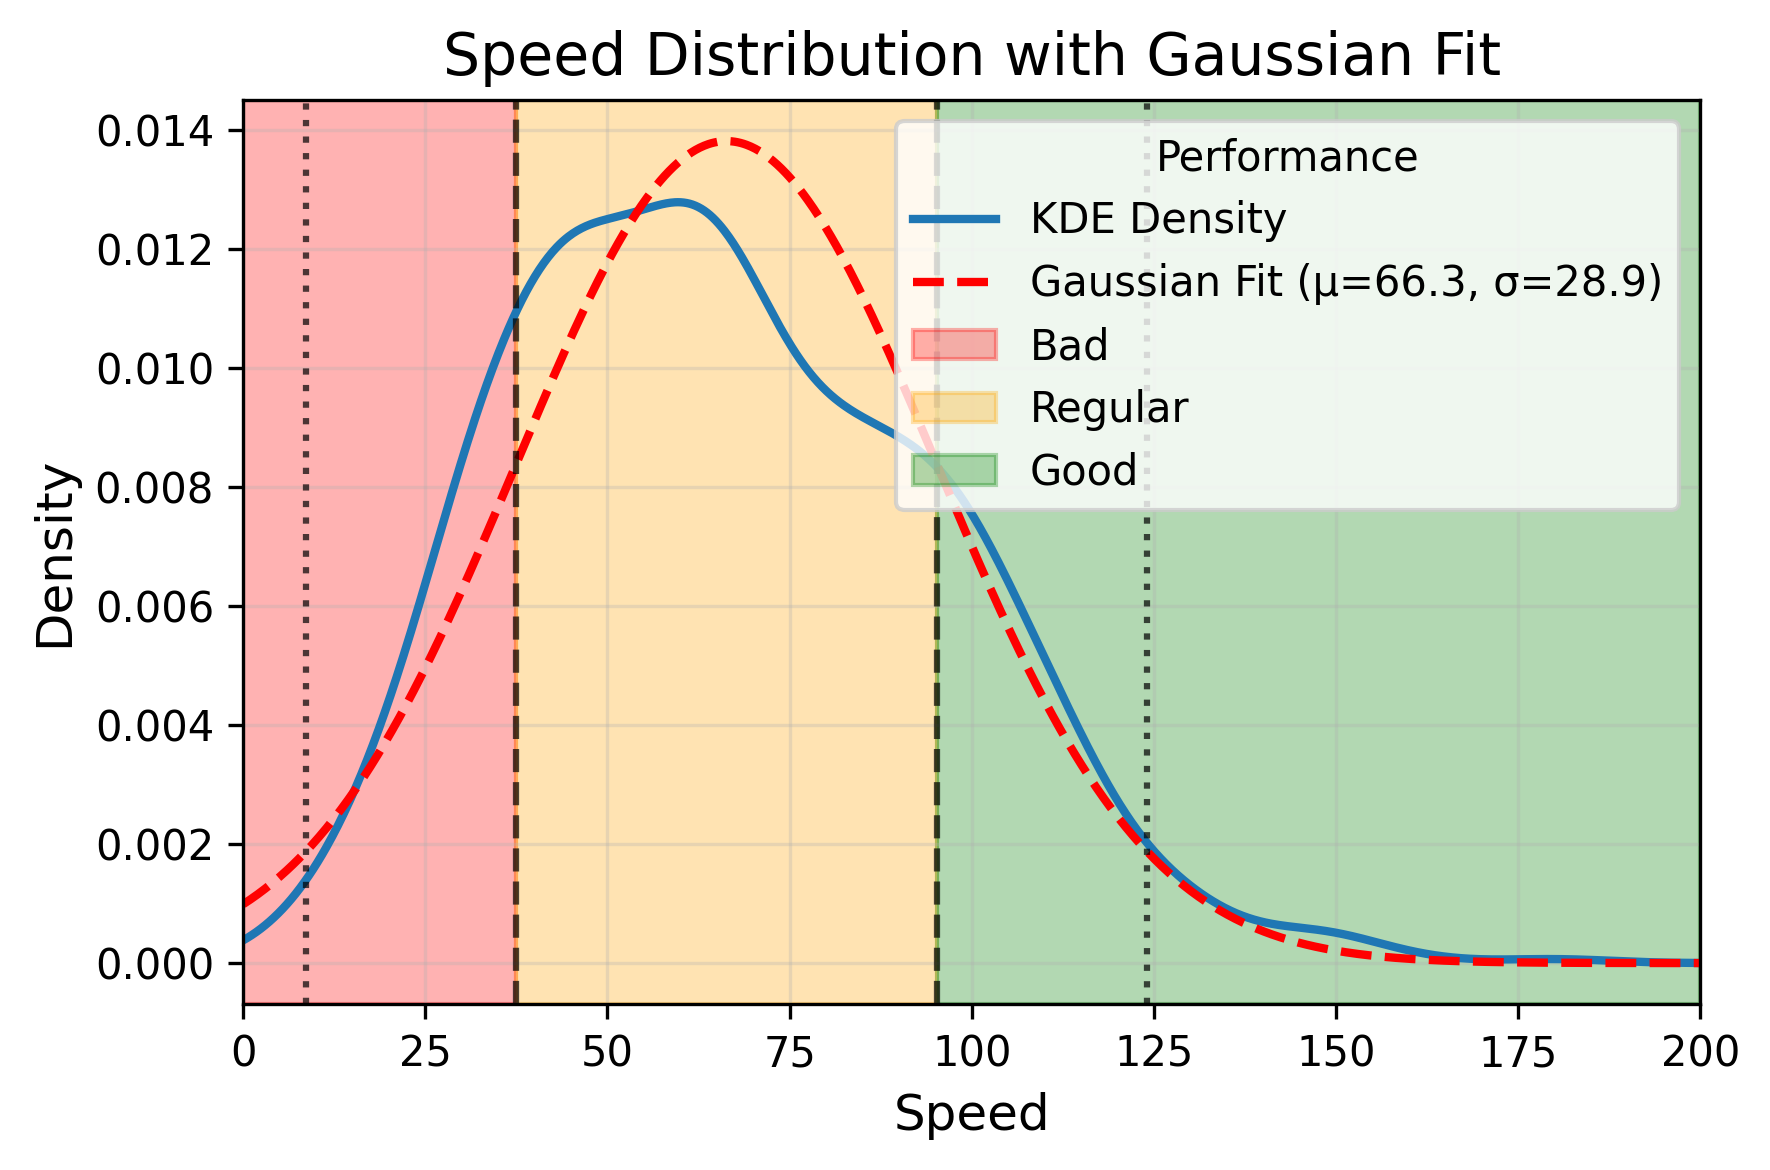

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

s = data['speed'].dropna().to_numpy()

# Fit Gaussian (mean, std)
mu, sigma = norm.fit(s)

# Build density curves
kde = gaussian_kde(s)
x = np.linspace(0, 200, 1000)

# --- Plot ---
fig, ax = plt.subplots(figsize=(6,4))

# KDE (empirical density)
ax.plot(x, kde(x), lw=2, label='KDE Density')

# Gaussian PDF (fit)
ax.plot(x, norm.pdf(x, mu, sigma), 'r--', lw=2, label=f'Gaussian Fit (μ={mu:.1f}, σ={sigma:.1f})')

# Shaded regions (same as before)
ax.axvspan(0, mu - sigma, alpha=0.3, color='red', label='Bad')
ax.axvspan(mu - sigma, mu + sigma, alpha=0.3, color='orange', label='Regular')
ax.axvspan(mu + sigma, 200, alpha=0.3, color='green', label='Good')

# Vertical lines for ±1σ and ±2σ
for k, style in zip([1, 2], ['--', ':']):
    ax.axvline(mu - k*sigma, color='black', linestyle=style, alpha=0.7)
    ax.axvline(mu + k*sigma, color='black', linestyle=style, alpha=0.7)

ax.set_xlim(0, 200)
ax.set_xlabel('Speed')
ax.set_ylabel('Density')
ax.set_title('Speed Distribution with Gaussian Fit')
ax.legend(title='Performance')
plt.tight_layout()
plt.show()



*This following cell was generated using openAI*

**Reason**: We had a problem understanding why the std of the fit was the same as the std of the data. We asked openAI to explain why this was happening.

Good catch 👌 — this happens because of **what you mean by “fit.”**

---

## 🔎 Why they match

When you do this:

```python
from scipy.stats import norm
mu, sigma = norm.fit(data)
```

* `norm.fit` uses **Maximum Likelihood Estimation (MLE)** to estimate the Gaussian parameters.
* For a *true normal distribution*, the MLE for the mean ($\mu$) is the **sample mean**, and the MLE for the standard deviation ($\sigma$) is **almost** the sample standard deviation.

So:

* **Mean**: exactly equal to the sample mean.
* **Standard deviation**:

  * The usual *pandas* `data.std()` uses the **unbiased estimator** (divides by $n-1$).
  * `norm.fit` (MLE) uses the **biased estimator** (divides by $n$).

For large samples, the difference is tiny, so they look “the same.”

---

## ⚖️ The math

* Sample mean:

  $$
  \hat{\mu} = \frac{1}{n}\sum_{i=1}^n x_i
  $$

* Sample variance (unbiased, what `pandas.std()` does):

  $$
  s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \hat{\mu})^2
  $$

* MLE variance (used in `norm.fit`):

  $$
  \sigma^2_{MLE} = \frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu})^2
  $$

The difference is only the denominator ($n$ vs $n-1$).

---

## 🛠️ How to check in Python

```python
import numpy as np
from scipy.stats import norm

s = data['speed'].dropna().to_numpy()

# Pandas/NumPy std (unbiased, denominator = n-1)
print("Sample std (unbiased):", np.std(s, ddof=1))

# Population std (biased, denominator = n)
print("Sample std (MLE form):", np.std(s, ddof=0))

# Fit with scipy
mu_fit, sigma_fit = norm.fit(s)
print("Sigma from norm.fit:", sigma_fit)
```

You’ll see:

* `np.std(s, ddof=0)` ≈ `sigma_fit`
* `np.std(s, ddof=1)` is slightly larger

---

✅ **So in short:**
The Gaussian “fit” and the raw data std match because the MLE estimate of σ is basically the same as the dataset’s standard deviation (with denominator $n$). The fit isn’t doing anything fancier — it just reproduces the sample statistics.

---

👉 Do you want me to also explain what happens if your data **isn’t Gaussian** (skewed or heavy-tailed) — i.e. how the “fit σ” can then differ significantly from the raw sample std?


In [184]:
import numpy as np
from scipy.stats import norm

s = data['speed'].dropna().to_numpy()

# Pandas/NumPy std (unbiased, denominator = n-1)
print("Sample std (unbiased):", np.std(s, ddof=1))

# Population std (biased, denominator = n)
print("Sample std (MLE form):", np.std(s, ddof=0))

# Fit with scipy
mu_fit, sigma_fit = norm.fit(s)
print("Sigma from norm.fit:", sigma_fit)


Sample std (unbiased): 28.907661875463354
Sample std (MLE form): 28.889611507249757
Sigma from norm.fit: 28.889611507249757


> ## **Comentarios acerca del ajuste Gaussiano**
>
> * El ajuste Gaussiano es una herramienta útil para determinar la distribución de los datos y poder comparar la(s) diferencias que existe con la estimación inicial propuesta: utilizar la desviación estándar de la muestra para determinar qué regiones de la población pueden ser consideradas como "buenas", "malas" o "regulares".
> * En este caso, el ajuste Gaussiano no presenta diferencias significativas con la estimación inicial propuesta, por lo que se puede concluir que la distribución de los datos es aproximadamente normal y que la discriminación tabulada es válida.
> * Este modelo ayuda a determinar la desviación estándar de la población, lo que es útil para determinar la región de "buenos" pokémon, así como futuros modelos de machine learning para las próximas generaciones de pokémon.

> ## **Análisis de la suma total de atributos**
>
> * Realizaremos un análisis de la suma total de todos los atributos de los pokémon para ver si es posible identificar algún patrón.
> * Para esto, se sumarán los atributos de cada pokémon y se graficará la suma total de los atributos vs la vida base de los pokémon.
> * Se espera que los pokémon legendarios tengan una suma total de atributos mayor a los pokémon no legendarios.

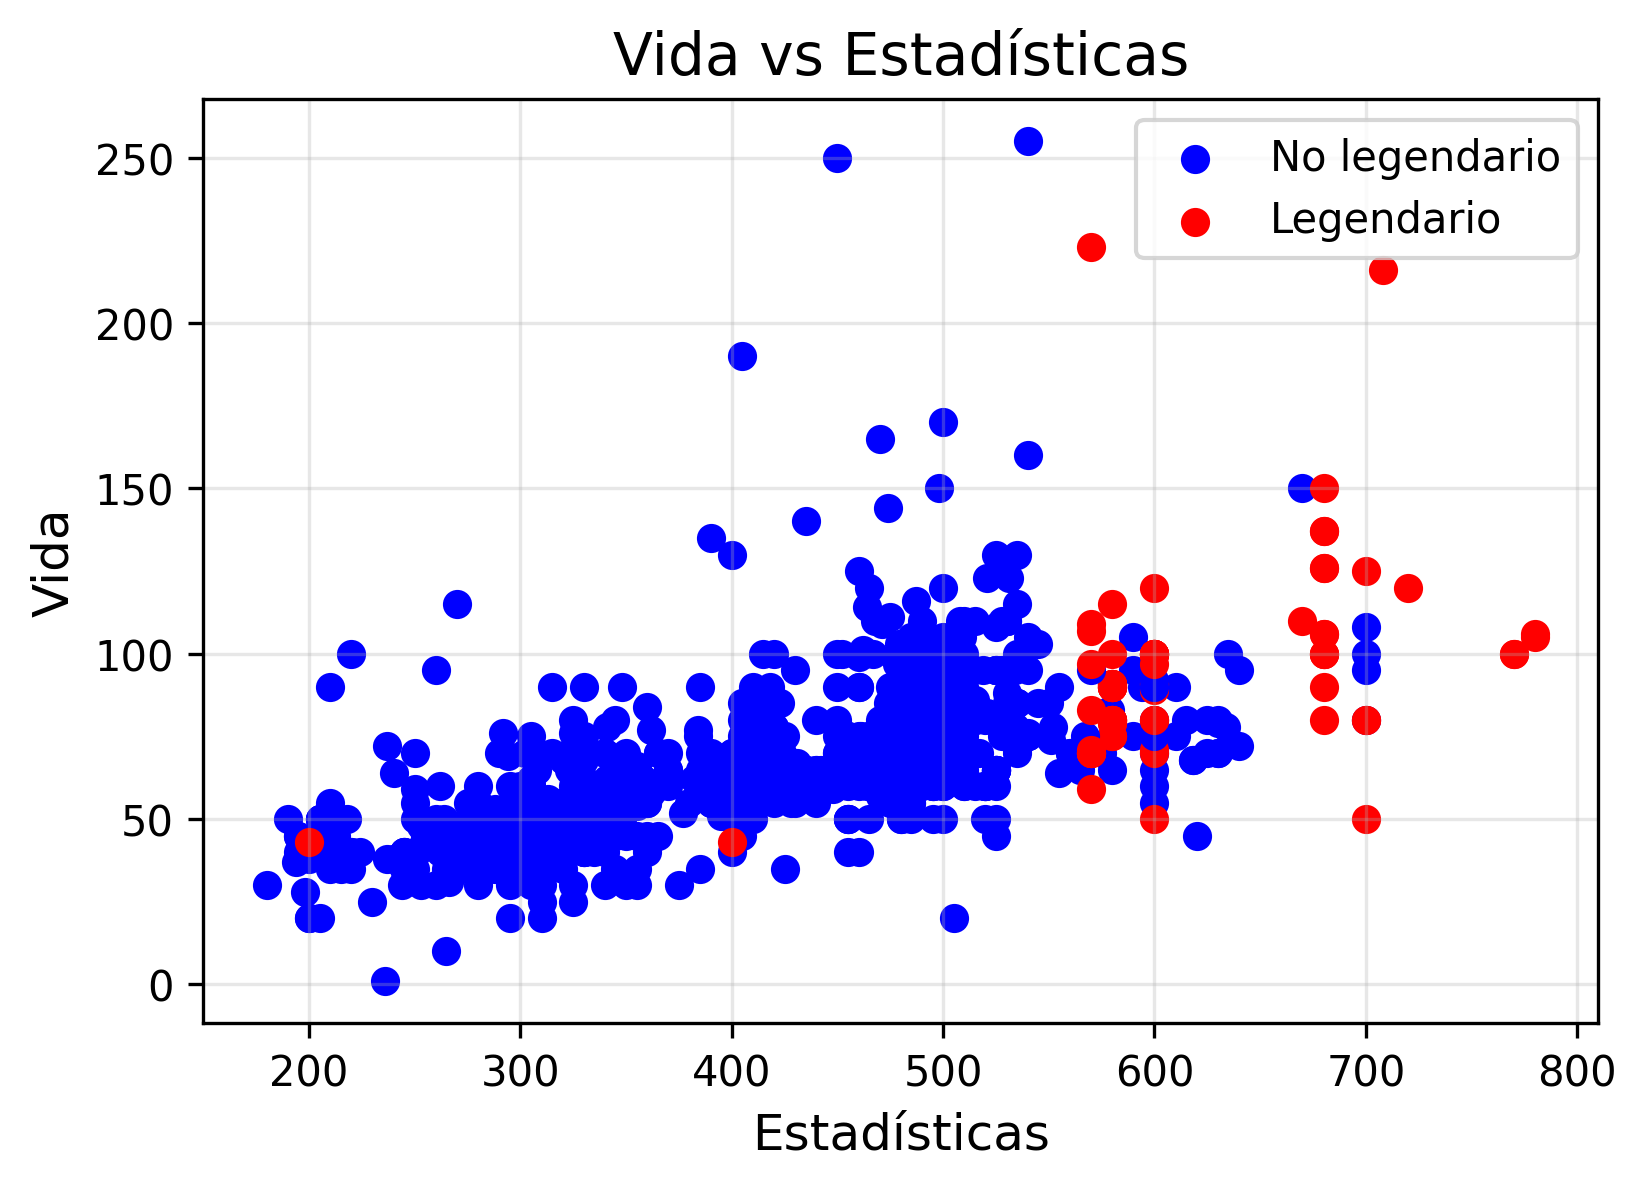

In [78]:
df = data.copy()
df['stats'] = df['hp'] + df['attack'] + df['defense'] + df['sp_attack'] + df['sp_defense'] + df['speed']

plt.xlabel('Estadísticas')
plt.ylabel('Vida')
plt.title('Vida vs Estadísticas')

c1 = True
c2 = True
for i in range(len(df)):
    if df['is_legendary'][i] == 1:
        if c1 == True:
            plt.scatter(df['stats'][i], df['hp'][i], color='red', label = "Legendario")
            c1 = False
        plt.scatter(df['stats'][i], df['hp'][i], color='red')
    else:
        if c2 == True:
            plt.scatter(df['stats'][i], df['hp'][i], color='blue', label='No legendario')
            c2 = False
        plt.scatter(df['stats'][i], df['hp'][i], color='blue')

plt.legend()
plt.show()

> * Notamos claramente que hay  una tendencia de que los pokémon legendarios tengan una suma total de atributos mayor a los pokémon no legendarios, con unos pocos outliers legendarios. Para una visualización más atractiva, hacemos un plot de densidad

> ### Visualización de datos

*This code was generated using openAI*

> **Reason**: The code was generated using openAI because it was not possible to generate the code without the use of openAI. The code was generated using the following prompt: "Generate a code that plots a kdeplot of the stats column of the df dataframe, using the is_legendary column as the hue. The x axis should be limited to the min and max values of the stats column. The plot should be a FacetGrid with an aspect of 5. The plot should be shown using plt.show()"

> * Es crucial considerar que un gráfico de densidad es una herramienta efectiva para visualizar la distribución de los datos, ya que muestra la función de densidad de probabilidad normalizada i.e., la integral de dicha función equivalente a la unidad. A diferencia de un gráfico de dispersión no se muestran los puntos en particular, sino una tendencia general de los datos.

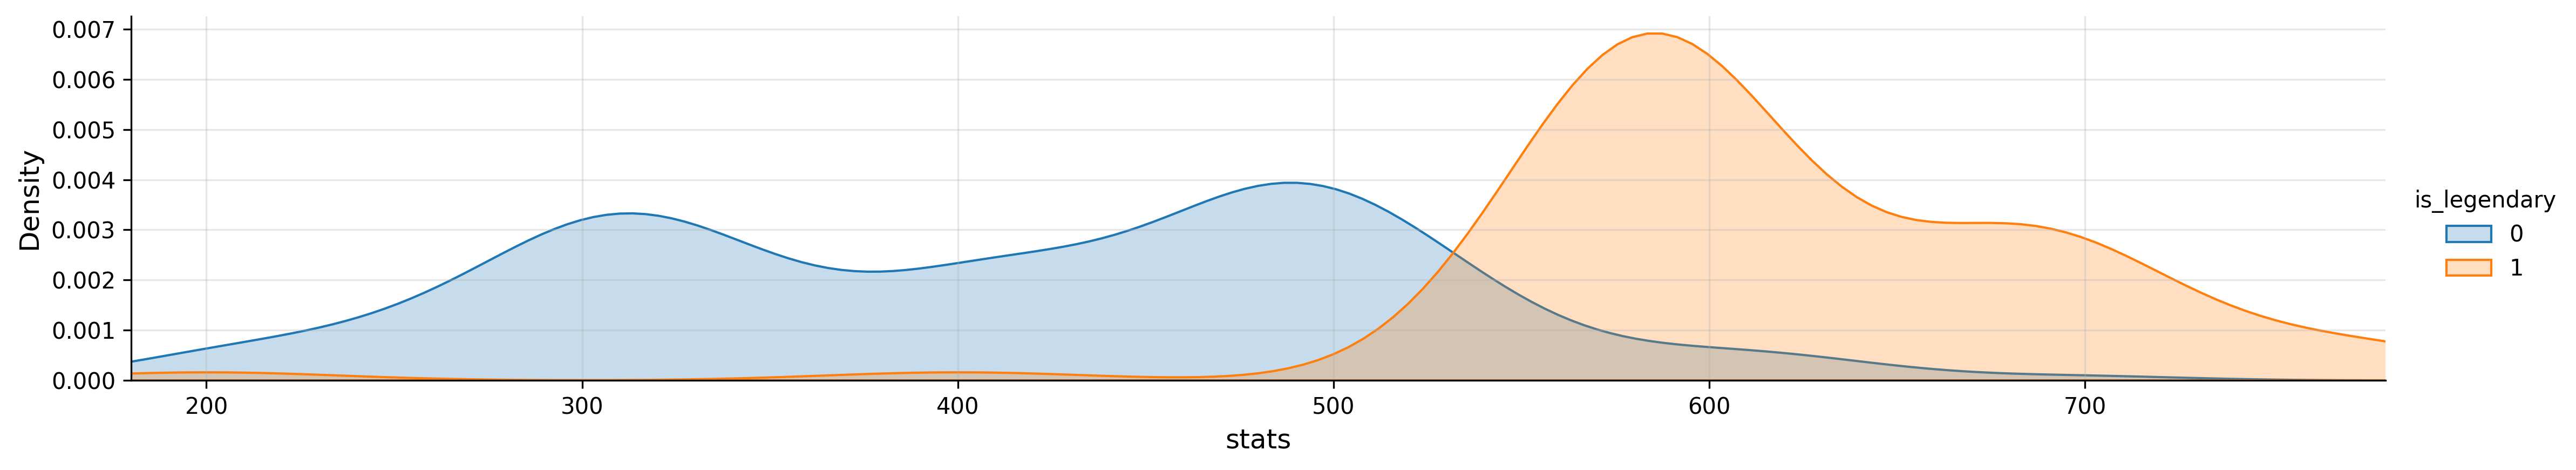

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correcting the error by using the correct column name 'stats' in the FacetGrid map function
as_fig = sns.FacetGrid(df, hue='is_legendary', aspect=5)
as_fig.map(sns.kdeplot, 'stats', fill=True)

max_value = df['stats'].max()
min_value = df['stats'].min()
as_fig.set(xlim=(min_value, max_value))
as_fig.add_legend()
plt.show()

> * Con las funciones de densidad de probabilidad se puede ver de una mejor manera la tendencia de los legendarios a tener estadísticas altas, mientras que los no legendarios presentan una distribución más uniforme.

> ### Análisis de correlación

In [132]:
# To fix the error, we need to provide another Series to calculate the correlation with.
# For example, if we want to calculate the correlation between 'stats' and 'hp':

correlation = df['stats'].corr(df['hp'])
print("Correlation between stats and hp:", correlation)

Correlation between stats and hp: 0.6206239321341407


In [218]:
corr_df = df.copy()[['attack', 'base_egg_steps', 'defense', 'experience_growth', 'hp', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'generation', 'is_legendary', 'stats']]
print(corr_df)

     attack  base_egg_steps  defense  experience_growth   hp  percentage_male  \
0        49            5120       49            1059860   45             88.1   
1        62            5120       63            1059860   60             88.1   
2       100            5120      123            1059860   80             88.1   
3        52            5120       43            1059860   39             88.1   
4        64            5120       58            1059860   58             88.1   
..      ...             ...      ...                ...  ...              ...   
796     101           30720      103            1250000   97              NaN   
797     181           30720      131            1250000   59              NaN   
798     101           30720       53            1250000  223              NaN   
799     107           30720      101            1250000   97              NaN   
800      95           30720      115            1250000   80              NaN   

     pokedex_number  sp_att

*This code was generated using openAI*

> **Reason**: The code was generated using openAI because it was not possible to generate the code without the use of openAI. The code was generated using the following prompt: "Generate a code that plots a heatmap of the correlation matrix of the corr_df dataframe. The heatmap should have a size of 15x12, the annotations should be formatted to 2 decimal places, the colormap should be 'coolwarm' and the center of the colormap should be 0. The title of the heatmap should be 'Correlation Matrix' with a font size of 14. The plot should be shown using plt.show()"

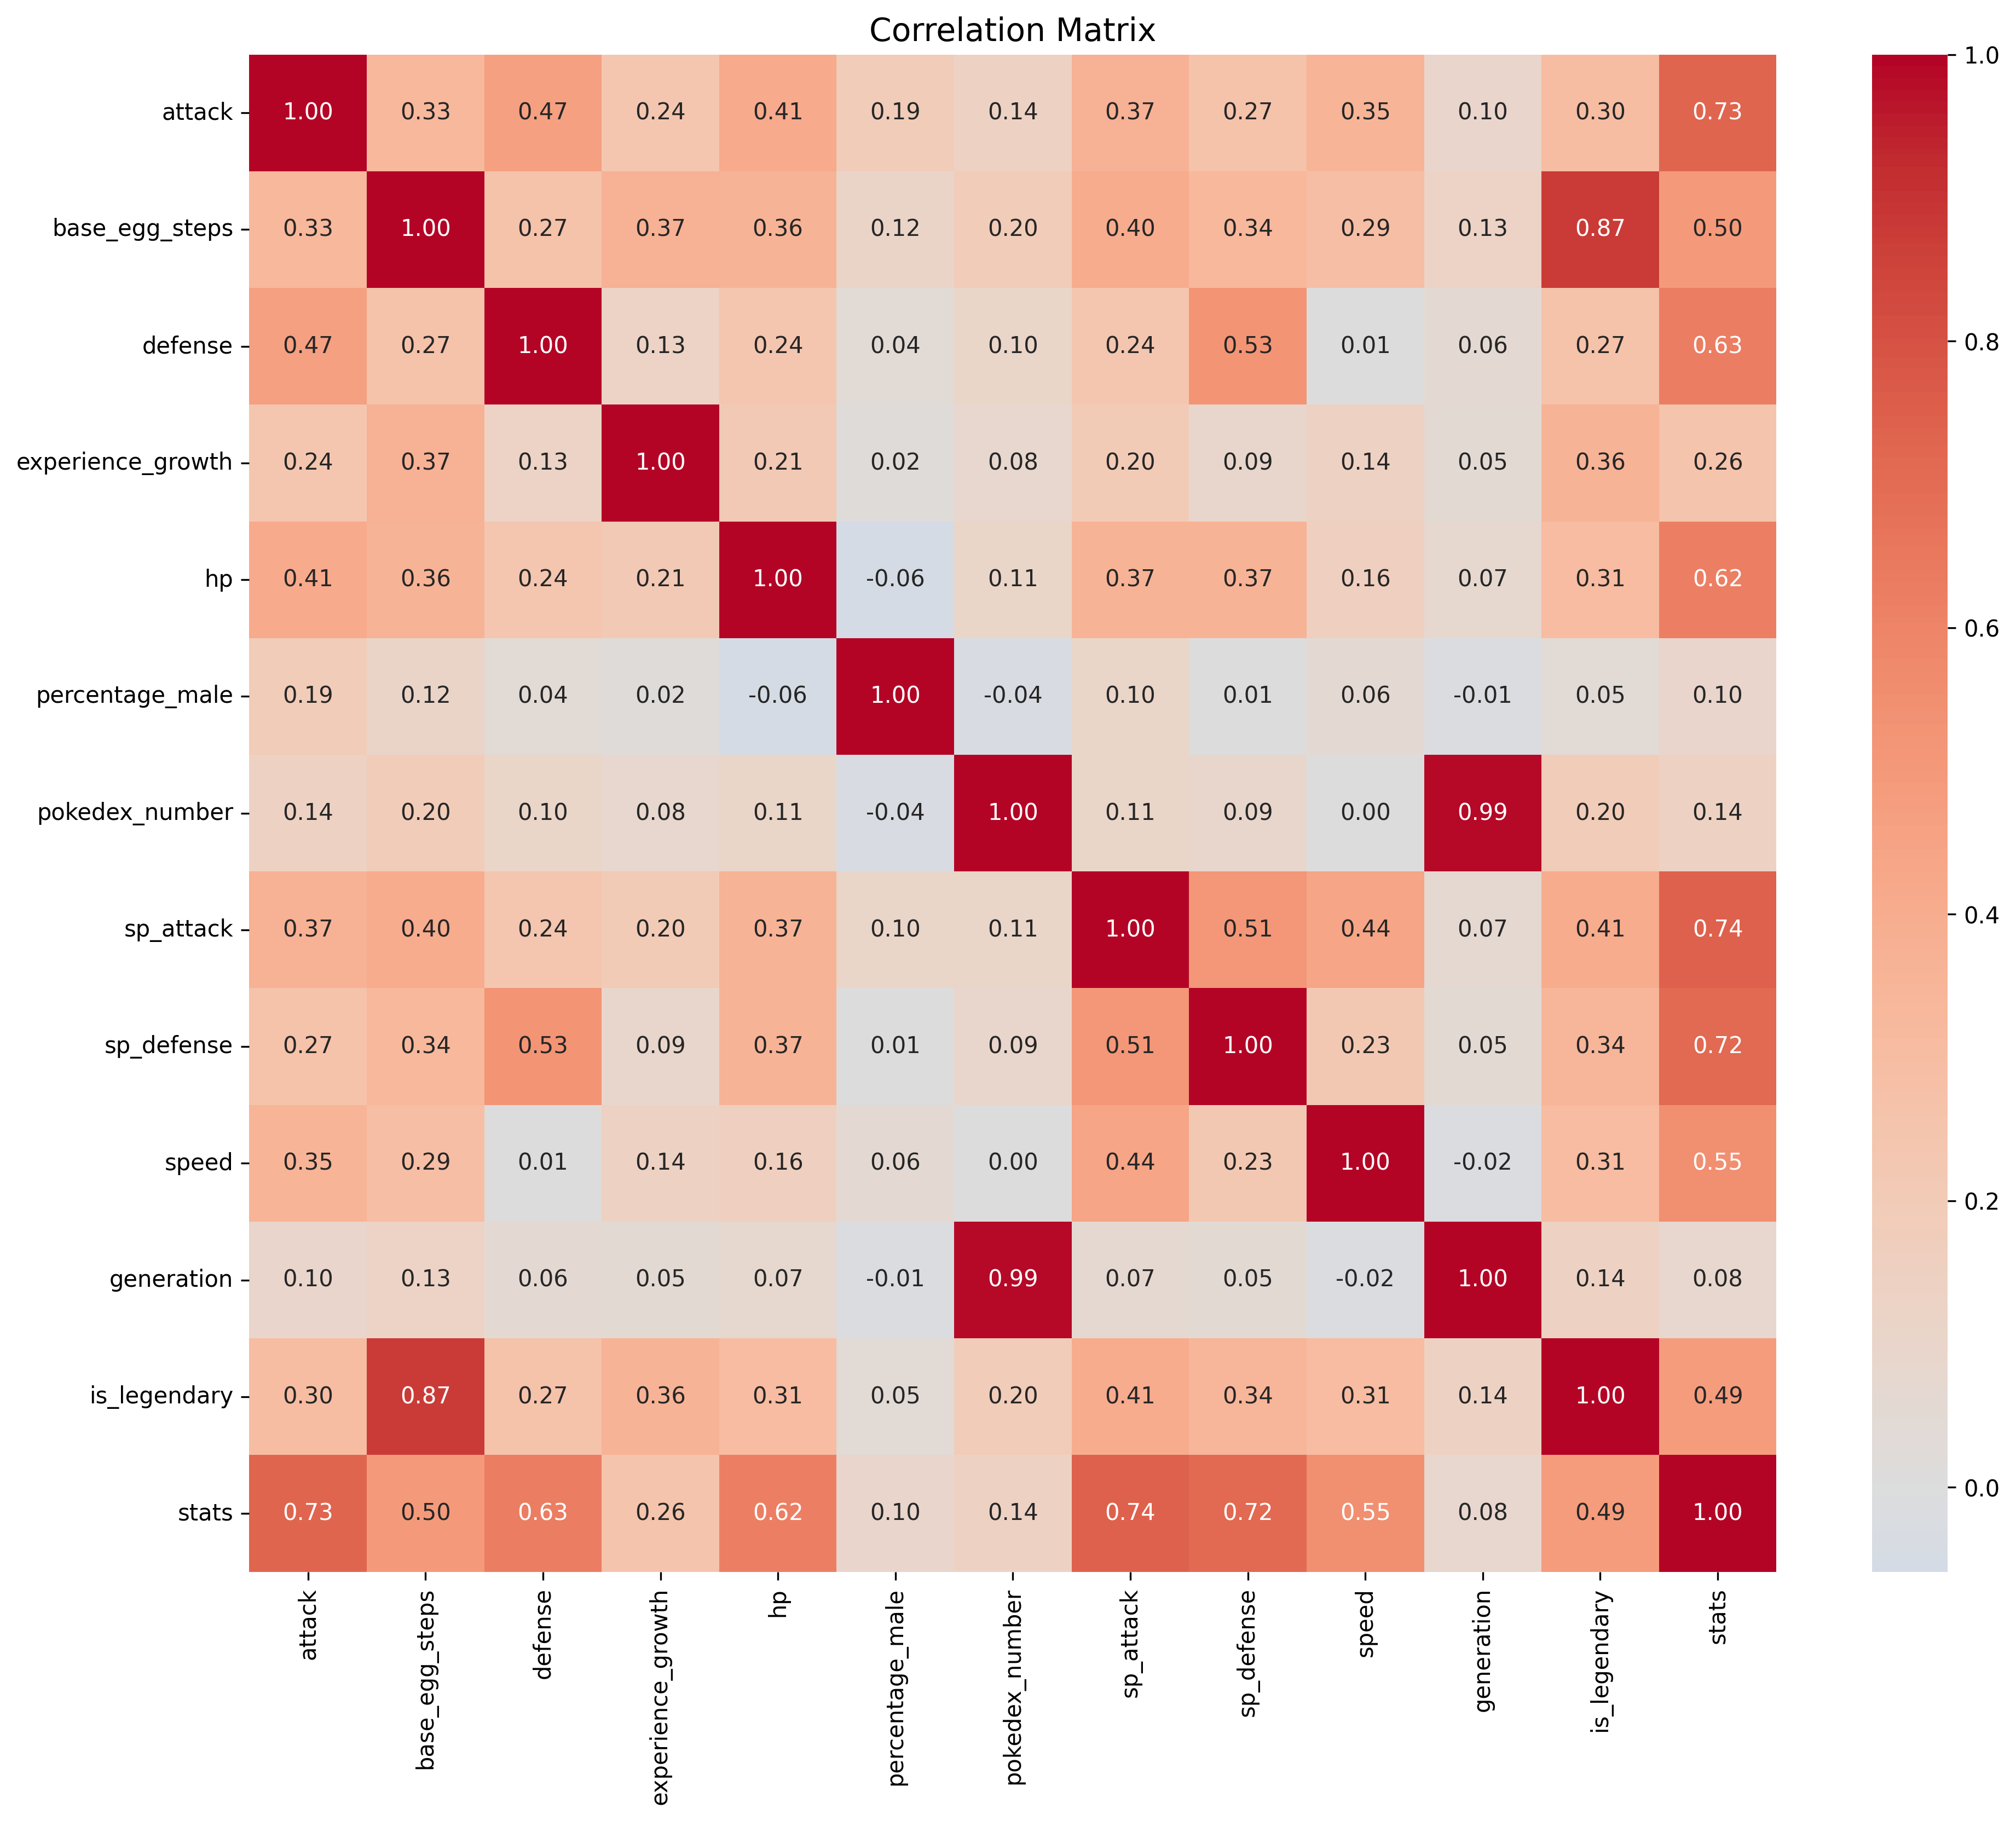

In [221]:
# To fix the error, we need to exclude non-numeric columns from the DataFrame before calculating the correlation matrix.

# Select only numeric columns from the DataFrame
numeric_df = corr_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

*This following prompt was generated using openAI*

Yes — there are several good options depending on how you want to *calculate* and how you want to *visualize* the correlation matrix. Let’s go step by step:

---

## 1. **Calculate correlation matrix**

The standard way is with **pandas**:

```python
import pandas as pd

corr = df.corr()   # by default: Pearson correlation
```

You now have a DataFrame with the pairwise correlations.

---

## 2. **Visualize with Seaborn**

Seaborn doesn’t calculate correlations itself, but it’s *great for plotting* them.
Most common tool: `sns.heatmap`

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix", fontsize=14)
plt.show()
```

* `annot=True` → show values inside the cells.
* `center=0` → colors diverge around zero.
* `cmap="coolwarm"` → blue = negative, red = positive.

---

## 3. **Alternative visualization libraries**

* **`seaborn.clustermap`**
  Automatically clusters correlated variables for structure discovery:

  ```python
  sns.clustermap(corr, annot=True, cmap="coolwarm", center=0)
  ```
* **`matplotlib` (manual)** → use `plt.matshow` or `ax.imshow`.
* **`pingouin`** (a stats library) → has `pingouin.pairwise_corr` for more advanced correlations.
* **`plotly`** → interactive heatmaps if you want hover info:

  ```python
  import plotly.express as px
  fig = px.imshow(corr, text_auto=True, color_continuous_scale="RdBu_r", zmin=-1, zmax=1)
  fig.show()
  ```

---

## ✅ Best practice

* **pandas** for computing (`.corr()`).
* **seaborn.heatmap** for a clean, static plot.
* **plotly** if you need interactive exploration.

---

Good — let’s interpret that number carefully.

A correlation coefficient (usually Pearson’s *r*) ranges from **–1 to +1**:

* **+1** → perfect positive linear relationship (as X goes up, Y goes up in lockstep).
* **0** → no linear relationship.
* **–1** → perfect negative linear relationship (as X goes up, Y goes down in lockstep).

---

### 🔎 Your case: **r = 0.6206**

* **Direction**: Positive → as one variable increases, the other tends to increase.
* **Strength**: 0.62 is generally interpreted as a **moderately strong** correlation.

  * Rough scale (rule of thumb, varies by field):

    * 0.0–0.2 → negligible
    * 0.2–0.4 → weak
    * 0.4–0.7 → moderate
    * 0.7–0.9 → strong
    * 0.9–1.0 → very strong / almost deterministic

So: **a moderately strong positive linear relationship**.

---

### 📊 What it implies

* The two variables share a noticeable trend, but it’s **not perfect**.
* You could use one to *partially* predict the other, but there’s still a lot of variance unexplained.

Formally, the **coefficient of determination** (*r²*) = (0.6206)² ≈ **0.385**.
That means about **38.5% of the variance** in one variable can be explained by a linear relationship with the other. The remaining \~61.5% is noise or other factors.

---

⚠️ **Caution**:

* Correlation ≠ causation.
* Nonlinear relationships might not show up well in Pearson’s *r*.
* Outliers can inflate or deflate the value.

---


> ## **Comentarios sobre la matriz de correlación obtenida**
>
> **Correlación entre vida base y suma total de atributos**
>
> * Es posible observar que la correlación entre la vida base y la suma total de atributos es de 0.62, lo que indica que existe una relación lineal moderada entre estas dos variables.
> * Esto se debe a que los pokémon legendarios tienen una suma total de atributos mayor a los pokémon no legendarios.
> * Por lo tanto, es posible que los pokémon legendarios tengan una vida base mayor a los no legendarios.
>
> **Correlación entre pokedex_number y generación**
>
> * Es posible observar que la correlación entre el pokedex_number y la generación es de 0.99, lo que indica que existe una relación lineal cuasi-perfecta entre estas dos variables.
> * Esto se debe a que los pokémon se ordenan por generación y por número de pokedex, donde los pokémon de la generación 1 corresponden a números de 1 a 151, los de generación 2 de 152 a 251 y así aumentando, por lo que es lógico que exista una relación lineal entre estas dos variables. 
> * No es de exactamente 1.00 porque el número de pokémon es diferente en cada generación.
>
> **Correlación entre is_legendary y stats**
>
> * Se observa que la correlación entre estas variables es de 0.49, lo que indica que existe una relación lineal de 0.25 i.e., 25% de tendencia lineal entre estas dos variables.
> * Este bajo porcentaje no proporciona información de la tendencia de encontrar pokémon legendarios con altas estadísticas (como si lo hace el plot de densidad), sino que la correlación entre las variables no es estrictamente lineal.
> * Para realizar un estudio específico entre la tendencia de encontrar pokémon legendarios con altas estadísticas se debe realizar un análisis de regresión lineal o bien un análisis de regresión logística.
>
> **Correlación entre is_legendary y base_egg_steps**
>
> * Se observa una correlación sorprendentemente alta entre las variables base_egg_steps e is_legendary. 
> * Para entenderla, debemos saber que base_egg_steps esta relacionado con la crianza que el jugador puede hacer en los juegos de pokémon, donde recibes huevos de los cuales nacerán estos. Entonces la correlación alta implica que se requiere de una mayor cantidad de pasos para que eclosionen los huevos lo que mantiene el status de pokémon legendarios.
>
> **Correlación de percentage_male**
>
> * Gracias a la matriz de correlación podemos fijarnos en que valores pueden afectar a la probabilidad de que un pokémon sea macho o hembra. Notemos que en realidad, no hay ningún dato que se correlacione directamente con esta probabilidad. La única que sobresale un poco es la relación entre attack y percentage_male, lo que podría llegar a decir que los pokémon más ofensivos suelen ser machos, pero no la correlación no es lo suficientemente fuerte como para concluir algo relevante.
>
> **Correlación de defense y sp_defense**
>
> * En general podemos atribuir una relación entre estas dos variables, lo que podría llegar a decir que los pokémon que tienen una defensa física alta suelen tener una defensa especial alta i.e., son buenos defensores en general.
> * Esto podría llegar a ser relevante para un futuro modelo de machine learning.
>
> **Correlación entre attack y sp_attack**
>
> * A diferencia de la defensa, no se puede concluir o relacionar linealmente el ataque físico con el ataque especial. No es esperable que si un pokémon tenga un ataque físico alto, tenga a su vez un ataque especial alto.
> * Esto podría llegar a ser relevante para un futuro modelo de machine learning.
>
> **Correlación entre características de ataque y defensa en relación a los stats totales**
>
> * En general observamos una tendencia trivial respecto a la linealidad entre los parámetros que componen los stats y los stats totales. Esto es esperable, ya que los stats totales son la suma de los parámetros que los componen.

*The following english cells were generated using openAI*

---

## 📊 1. Linear Regression

* **Goal**: predict a **continuous value**.
  Example: predicting **height** in cm from age, or the **price of a house** from its square meters.
* **Equation**:

  $$
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \varepsilon
  $$

  where $y$ is a continuous variable (real numbers).
* **Assumptions**:

  * Linear relationship between predictors and the dependent variable.
  * Residuals are normally distributed with constant variance (homoscedasticity).
* **Output**: a real number (can be negative, fractional, etc.).

---

## 🎯 2. Logistic Regression

* **Goal**: predict a **probability** of belonging to a class, usually binary (0 or 1).
  Example: Will a student pass (yes/no)? Is an email spam (yes/no)?
* **Equation** (uses the sigmoid function to constrain values between 0–1):

  $$
  P(y=1 \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots)}}
  $$
* **Assumptions**:

  * The dependent variable is categorical (often binary).
  * Predictors have a linear relationship with the logit (log-odds).
* **Output**:

  * A **probability between 0 and 1**.
  * If you apply a threshold (e.g., 0.5), it becomes a classification (0 or 1).

---

## ⚖️ Key Differences

| Aspect             | Linear Regression                        | Logistic Regression               |
| ------------------ | ---------------------------------------- | --------------------------------- |
| Dependent variable | Continuous                               | Categorical (binary, multinomial) |
| Output             | Real number                              | Probability (0–1)                 |
| Model function     | Linear (straight line)                   | Sigmoid / logit                   |
| Estimation method  | Least squares (MSE)                      | Maximum likelihood                |
| Typical use        | Predicting values (prices, measurements) | Classification (yes/no, 0/1)      |

---

👉 Short version:

* If your **Y is continuous numeric** → use **linear regression**.
* If your **Y is categorical (0/1)** → use **logistic regression**.

---

> * Por otro lado, es suficiente realizar un gráfico de densidad de probabilidad para visualizar la distribución de los datos y la relación entre las variables tal y como se mostró anteriormente.

> ## Conclusiones

*This code was generated using openAI*

>**Reason**: Esta parte del código fue mejorada utilizando ChatGPT-5 debido a la mejora de visualización de los parámetros importantes y relevantes escritos de manera ordenada y clara.

---

Durante este análisis exploratorio de datos (EDA) del set de datos de Pokémon, se realizaron diversas tareas para comprender mejor las características y patrones presentes en los datos. A continuación, se resumen los hallazgos más relevantes:

---

## 1. **Descripción y limpieza de datos**

* El dataset contiene **801 entradas y 41 columnas**, incluyendo estadísticas base, tipos de Pokémon y características demográficas.
* Se identificaron valores faltantes en las columnas `height_m`, `weight_kg`, `percentage_male` y `type2`.

  * Los valores faltantes en `height_m` y `weight_kg` fueron reemplazados por la **mediana**.
  * Los de `percentage_male` y `type2` no fueron modificados debido a su naturaleza inherente.
* No se encontraron filas duplicadas en el dataset.

---

## 2. **Análisis de variables categóricas**

* La mayoría de los Pokémon **no son legendarios** (731 normales vs. 70 legendarios).
* Los tipos más comunes son `water`, `normal` y `grass`, mientras que el tipo `flying` es más frecuente como tipo secundario (`type2`).
* La distribución de género mostró que la mayoría de los Pokémon no tienen predilección de género, aunque algunos son predominantemente machos o hembras.

---

## 3. **Análisis de variables numéricas**

* Las estadísticas base (`hp`, `attack`, `defense`, `sp_attack`, `sp_defense`, `speed`) presentan **distribuciones similares**, con *outliers* en los valores altos.
* Se utilizó la **desviación estándar** para clasificar las estadísticas como "buenas", "regulares" o "malas".
* Un **ajuste Gaussiano** confirmó que las distribuciones de las estadísticas son aproximadamente normales.

---

## 4. **Análisis de correlación**

* Se encontró una correlación **moderada (0.62)** entre la vida base (`hp`) y la suma total de estadísticas (`stats`).
* La correlación entre el número de Pokédex y la generación es **casi perfecta (0.99)**, lo cual es esperable debido al orden en que se introducen los Pokémon.
* Los Pokémon legendarios tienden a tener **estadísticas totales más altas**, pero la correlación entre `is_legendary` y `stats` es **moderada (0.49)**, indicando que no todos los Pokémon con estadísticas altas son legendarios.
* Se observó una **correlación alta** entre `base_egg_steps` e `is_legendary`, lo que sugiere que los Pokémon legendarios requieren más pasos para eclosionar.

---

## 5. **Visualización de datos**

* Se utilizaron gráficos de densidad, diagramas de caja y bigote, gráficos de barras y mapas de calor para visualizar las distribuciones y relaciones entre las variables.
* Los gráficos de densidad mostraron claramente la tendencia de los Pokémon legendarios a tener estadísticas más altas.

---

## 6. **Conclusiones generales**

* El dataset está bien estructurado y permite identificar patrones claros, como la relación entre las estadísticas y el estatus legendario.
* Las **estadísticas base y los tipos de Pokémon** son factores clave para futuros modelos de machine learning.
* La limpieza de datos y el análisis exploratorio proporcionaron una base sólida para aplicaciones futuras, como la **predicción de si un Pokémon es legendario** o la **clasificación de Pokémon según sus estadísticas**.

---

## **Comentarios acerca del ajuste Gaussiano**

* El **ajuste Gaussiano** es una herramienta útil para determinar la distribución de los datos y poder comparar las diferencias que existen con la estimación inicial propuesta: utilizar la desviación estándar de la muestra para determinar qué regiones de la población pueden ser consideradas como "buenas", "malas" o "regulares".
* En este caso, el ajuste Gaussiano **no presenta diferencias significativas** con la estimación inicial, por lo que se puede concluir que la distribución de los datos es aproximadamente normal y que la discriminación tabulada es válida.
* Este modelo ayuda a **determinar la desviación estándar de la población**, lo que es útil para identificar la región de "buenos" Pokémon, así como para futuros modelos de machine learning aplicados a las próximas generaciones de Pokémon.

---



> # Apéndice
>
> ## **Comentarios**
> * Cabe mencionar que aquellos cuadros de texto (Markdown) que están subrayados como este en particular, son comentarios que se han realizado de carácter personal y humano para el desarrollo del código y de esta tarea.
> * Aquellos Markdown que no presenten el subrayado son los que se han generado mediante el uso de openAI.
> * A su vez, aquellas celdas o textos escritos en inglés son generados con o por openAI.
>
> Como, por ejemplo:
>
 * The comments of openAI are in separate cells to facilitate reading and understanding of the code.